In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Changing the names of the Column names in the dataset to make it easier to understand
column_mapping = {
    # Location and Reference Information
    'MapRefNo': 'mapping_reference_number',
    'GeoRefNo': 'geographic_reference_number',
    'Tier': 'tier_number',
    'Range': 'range_number',
    'Prop_Addr': 'property_address',
    
    # Zoning I\nformation
    'ZngCdPr': 'zoning_code_primary',
    'ZngCdSc': 'zoning_code_secondary',
    'ZngOLPr': 'zoning_overlay_primary',
    'ZngOLSc': 'zoning_overlay_secondary',
    'MSZoning': 'zoning_classification',
    
    # Classification and Legal
    'ClassPr_S': 'property_class_primary',
    'ClassSc_S': 'property_class_secondary',
    'Legal_Pr': 'legal_description_primary',
    'SchD_S': 'school_district',
    'TxD_S': 'tax_district',
    
    # Owner Information
    'MA_Ownr1': 'owner_name_1',
    'MA_Ownr2': 'owner_name_2',
    'MA_Line1': 'mailing_address_line1',
    'MA_City': 'mailing_city',
    'MA_State': 'mailing_state',
    'MA_Zip1': 'mailing_zip',
    'MA_Zip2': 'mailing_zip_plus4',
    
    # Record Information
    'Rcrd_Yr': 'record_year',
    'Rcrd_Mo': 'record_month',
    'Inst1_No': 'instrument_number',
    'Inst1_Yr': 'instrument_year',
    'Inst1_Mo': 'instrument_month',
    'Inst1TPr': 'instrument_type_primary',
    
    # Land Information
    'LndAc_S': 'land_acres',
    'ImpAc_S': 'improved_acres',
    'OthAc_S': 'other_acres',
    'TtlVal_AsrYr': 'total_value_assessor_year',
    'ValType': 'valuation_type',
    'X1TPr_D': 'tax_primary_dollars',
    'X1TSc_D': 'tax_secondary_dollars',
    'X1TPr_S': 'tax_primary_status',
    'X1TSc_S': 'tax_secondary_status',
    'LndAcX1S': 'land_acres_tax_1',
    'ImpAcX1S': 'improved_acres_tax_1',
    'ImpAcX2S': 'improved_acres_tax_2',
    'HSTtl_D': 'homestead_total_dollars',
    'MilVal_D': 'military_value_dollars',
    'HSTtl_S': 'homestead_total_status',
    'MilVal_S': 'military_value_status',
    'AcreX_S1': 'acres_extra_status_1',
    'AcreGr': 'acres_gross',
    'AcreNt_S': 'acres_net_status',
    'LotArea': 'lot_area_sqft',
    'LotFrontage': 'lot_frontage_feet',
    'ParType': 'parcel_type',
    
    # Building Information
    'BldgNo_S': 'building_number',
    'DwlgNo_S': 'dwelling_number',
    'BldgType': 'building_type',
    'YrBuilt': 'year_built',
    'YearBuilt': 'year_built_verified',
    'YearRemodAdd': 'year_remodeled',
    'HouseStyle': 'house_style',
    'MSSubClass': 'building_class',
    
    # Structure Features
    'Foundation': 'foundation_type',
    'RoofStyle': 'roof_style',
    'RoofMatl': 'roof_material',
    'Exterior1st': 'exterior_material_primary',
    'Exterior2nd': 'exterior_material_secondary',
    'MasVnrType': 'masonry_veneer_type',
    'MasVnrArea': 'masonry_veneer_area',
    
    # Utilities and Systems
    'Street': 'street_type',
    'Alley': 'alley_access',
    'Utilities': 'utility_type',
    'Heating': 'heating_type',
    'HeatingQC': 'heating_quality',
    'CentralAir': 'has_central_air',
    'Electrical': 'electrical_system',
    
    # Living Area Information
    'GLA': 'gross_living_area',
    'GrLivArea': 'gross_living_area_verified',
    '1stFlrSF': 'first_floor_sqft',
    '2ndFlrSF': 'second_floor_sqft',
    'LowQualFinSF': 'low_quality_finished_sqft',
    'TtlBsmtSF': 'total_basement_sqft',
    'TotalBsmtSF': 'total_basement_sqft_verified',
    
    # Room Counts
    'TotRmsAbvGrd': 'total_rooms_above_ground',
    'BedroomAbvGr': 'bedrooms_above_ground',
    'KitchenAbvGr': 'kitchens_above_ground',
    
    # Bathroom Counts
    'BsmtFullBath': 'basement_full_bathrooms',
    'BsmtHalfBath': 'basement_half_bathrooms',
    'FullBath': 'full_bathrooms',
    'HalfBath': 'half_bathrooms',
    
    # Quality Ratings
    'OverallQual': 'overall_quality_rating',
    'OverallCond': 'overall_condition_rating',
    'ExterQual': 'exterior_quality',
    'ExterCond': 'exterior_condition',
    'BsmtQual': 'basement_quality',
    'BsmtCond': 'basement_condition',
    'KitchenQual': 'kitchen_quality',
    
    # Basement Details
    'BsmtExposure': 'basement_exposure',
    'BsmtFinType1': 'basement_finish_type_1',
    'BsmtFinType2': 'basement_finish_type_2',
    'BsmtFinSF1': 'basement_finished_sqft_1',
    'BsmtFinSF2': 'basement_finished_sqft_2',
    'BsmtUnfSF': 'basement_unfinished_sqft',
    
    # Garage Information
    'GarageType': 'garage_type',
    'GarageYrBlt': 'garage_year_built',
    'GarYrBlt': 'garage_year_built_alt',
    'GarageFinish': 'garage_interior_finish',
    'GarageCars': 'garage_car_capacity',
    'Cars': 'garage_car_capacity_alt',
    'GarageArea': 'garage_area_sqft',
    'GarageQual': 'garage_quality',
    'GarageCond': 'garage_condition',
    
    # Additional Features
    'Fireplaces': 'number_of_fireplaces',
    'FireplaceQu': 'fireplace_quality',
    'PoolArea': 'pool_area_sqft',
    'Fence': 'fence_quality',
    'MiscFeature': 'miscellaneous_feature',
    'MiscVal': 'miscellaneous_value',
    'WoodDeckSF': 'wood_deck_sqft',
    'OpenPorchSF': 'open_porch_sqft',
    'EnclosedPorch': 'enclosed_porch_sqft',
    '3SsnPorch': 'three_season_porch_sqft',
    'ScreenPorch': 'screen_porch_sqft',
    'PavedDrive': 'paved_driveway',
    
    # Property and Lot Details
    'LotShape': 'lot_shape',
    'LandContour': 'land_contour',
    'LotConfig': 'lot_configuration',
    'LandSlope': 'land_slope',
    'Neighborhood': 'neighborhood_name',
    'Condition1': 'proximity_condition_1',
    'Condition2': 'proximity_condition_2',
    'Functional': 'home_functionality',
    
    # Sale Information
    'YrSold_YYYY': 'year_sold',
    'MoSold_MM': 'month_sold',
    'YrSold': 'year_sold_verified',
    'MoSold': 'month_sold_verified',
    'SalePrice': 'sale_price',
    'SaleType': 'sale_type',
    'SaleCond': 'sale_condition',
    'SaleCondition': 'sale_condition_verified',
    
    # Additional Identifiers
    'ParclRel': 'parcel_relationship',
    'PA-Nmbr': 'property_address_number',
    'PA-PreD': 'property_address_pre_direction',
    'PA-Strt': 'property_address_street',
    'PA-StSfx': 'property_address_street_suffix',
    'PA-UnTyp': 'property_address_unit_type',
    'PA-UntNo': 'property_address_unit_number',
    'Date': 'record_date',
    'Source': 'data_source',
    'NmbrBRs': 'number_bedrooms',
    'PID': 'parcel_identification_number'
}

/var/folders/m8/2_nz4r1s3r1_ghgs6pxgk9880000gn/T/ipykernel_61108/3396461290.py:14: DtypeWarning: Columns (6,8,76,81,90,93,94,95,96,97,98,99,100,101,102,103,104,109,110,111,112,113,115,116,117,118,119,120,121,123,127,128,129,130,140,142,144,145,147,150,151,152,159,160,164,165) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


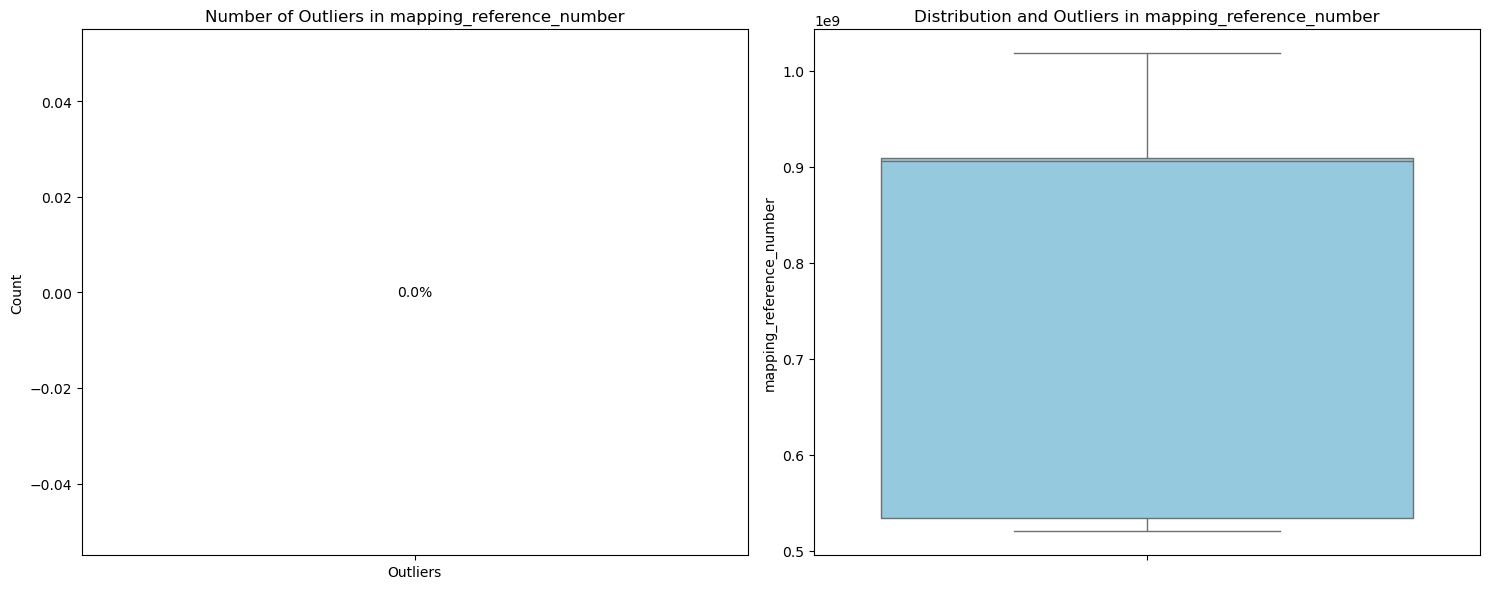


Summary for mapping_reference_number:
Total outliers: 0
Percentage of outliers: 0.00%
Total valid samples: 22213
IQR multiplier used: 1.5
--------------------------------------------------


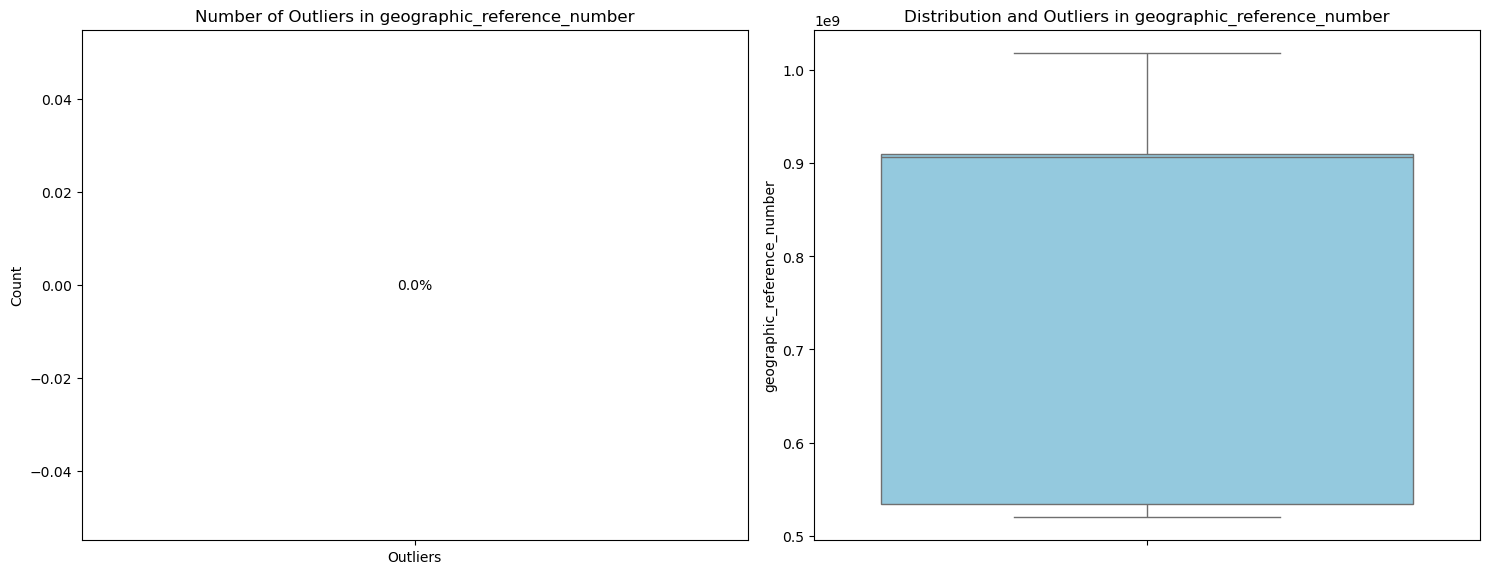


Summary for geographic_reference_number:
Total outliers: 0
Percentage of outliers: 0.00%
Total valid samples: 22213
IQR multiplier used: 1.5
--------------------------------------------------


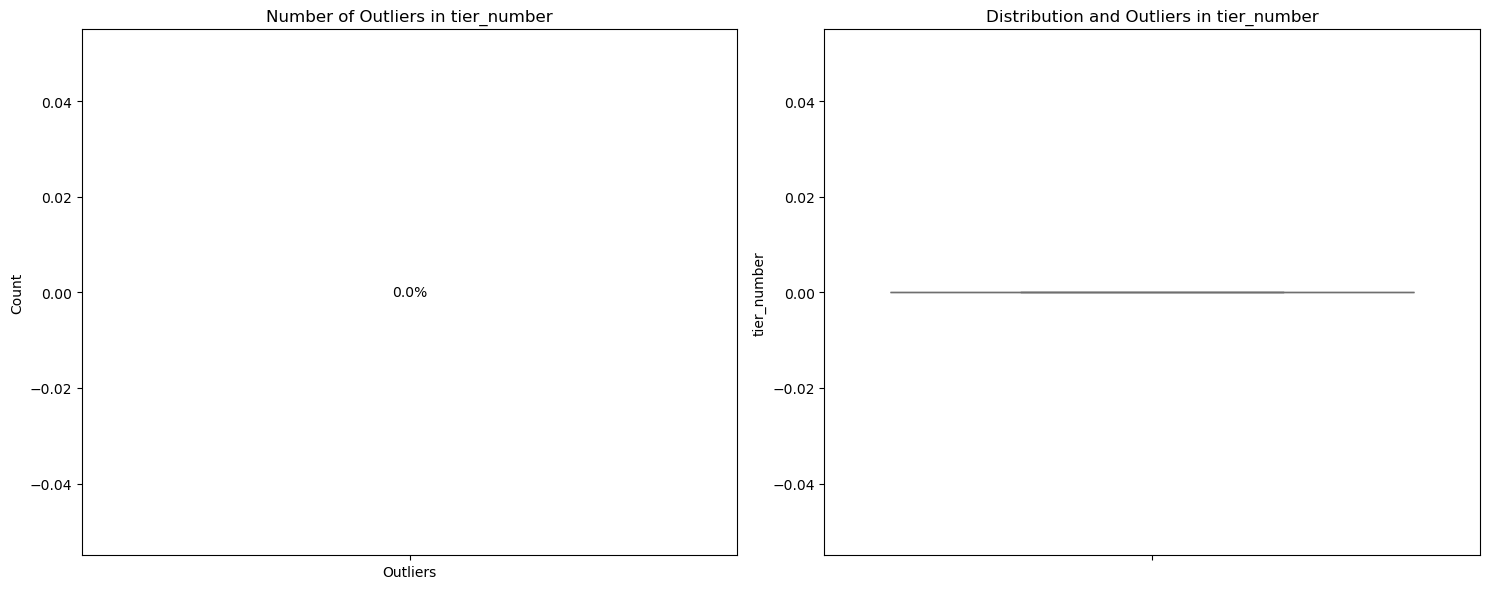


Summary for tier_number:
Total outliers: 0
Percentage of outliers: 0.00%
Total valid samples: 22213
IQR multiplier used: 1.5
--------------------------------------------------


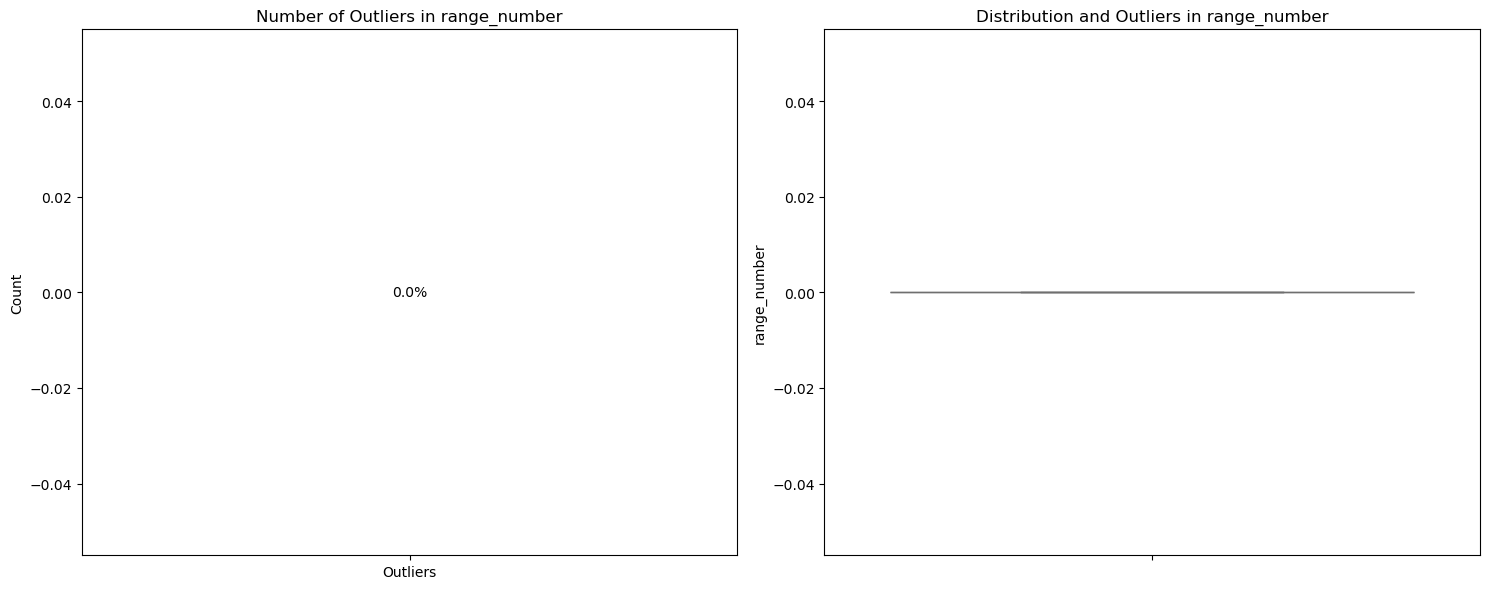


Summary for range_number:
Total outliers: 0
Percentage of outliers: 0.00%
Total valid samples: 22213
IQR multiplier used: 1.5
--------------------------------------------------


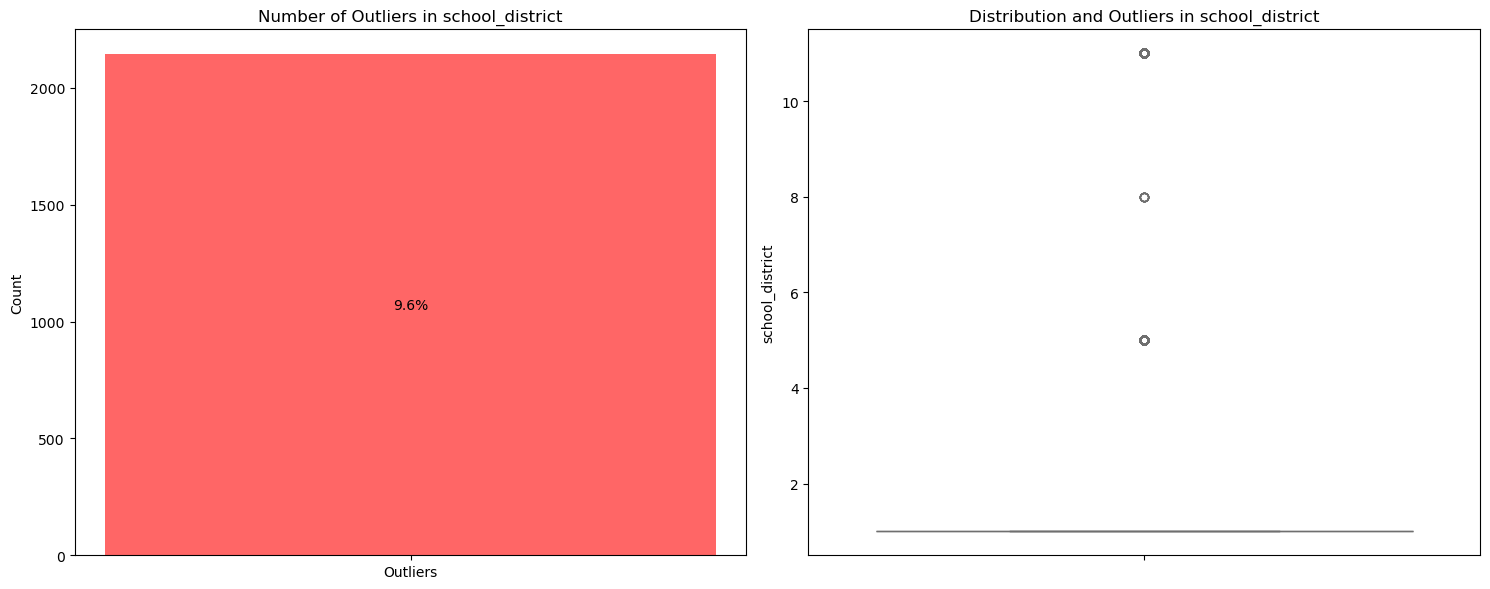


Summary for school_district:
Total outliers: 2143
Percentage of outliers: 9.65%
Total valid samples: 22213
IQR multiplier used: 1.5
--------------------------------------------------


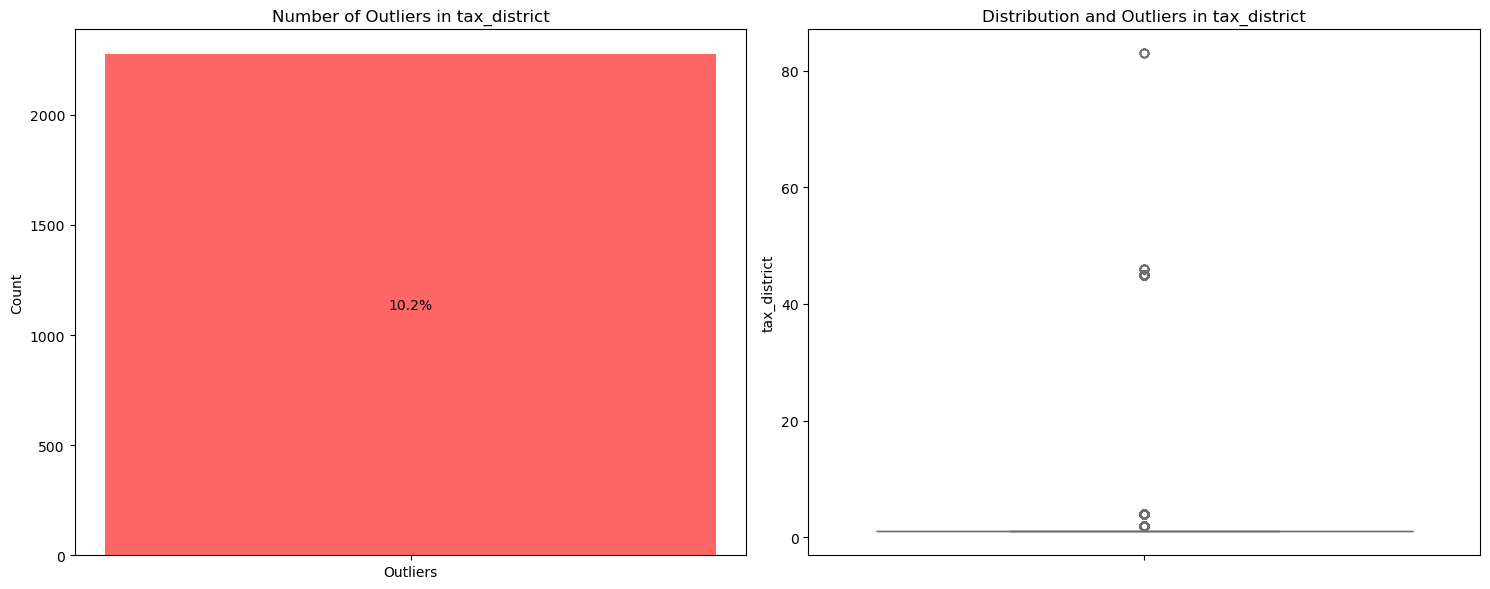


Summary for tax_district:
Total outliers: 2274
Percentage of outliers: 10.24%
Total valid samples: 22213
IQR multiplier used: 1.5
--------------------------------------------------


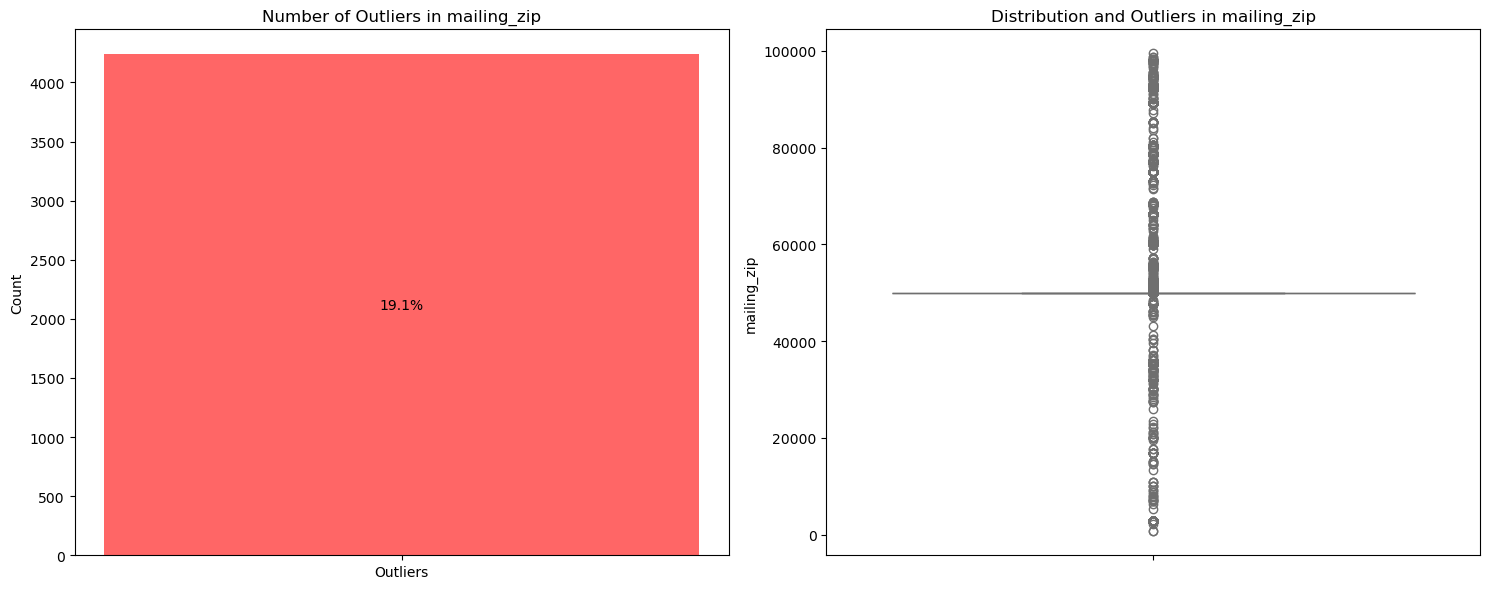


Summary for mailing_zip:
Total outliers: 4237
Percentage of outliers: 19.09%
Total valid samples: 22199
IQR multiplier used: 1.5
--------------------------------------------------


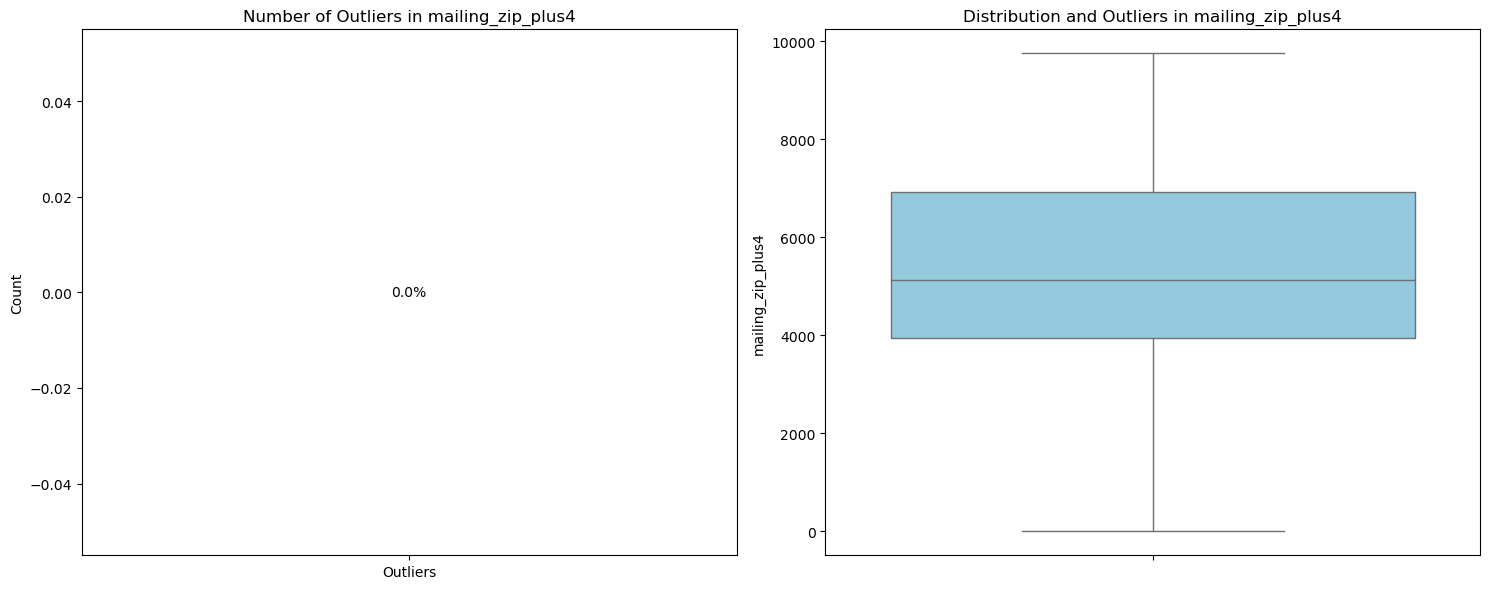


Summary for mailing_zip_plus4:
Total outliers: 0
Percentage of outliers: 0.00%
Total valid samples: 13323
IQR multiplier used: 1.5
--------------------------------------------------


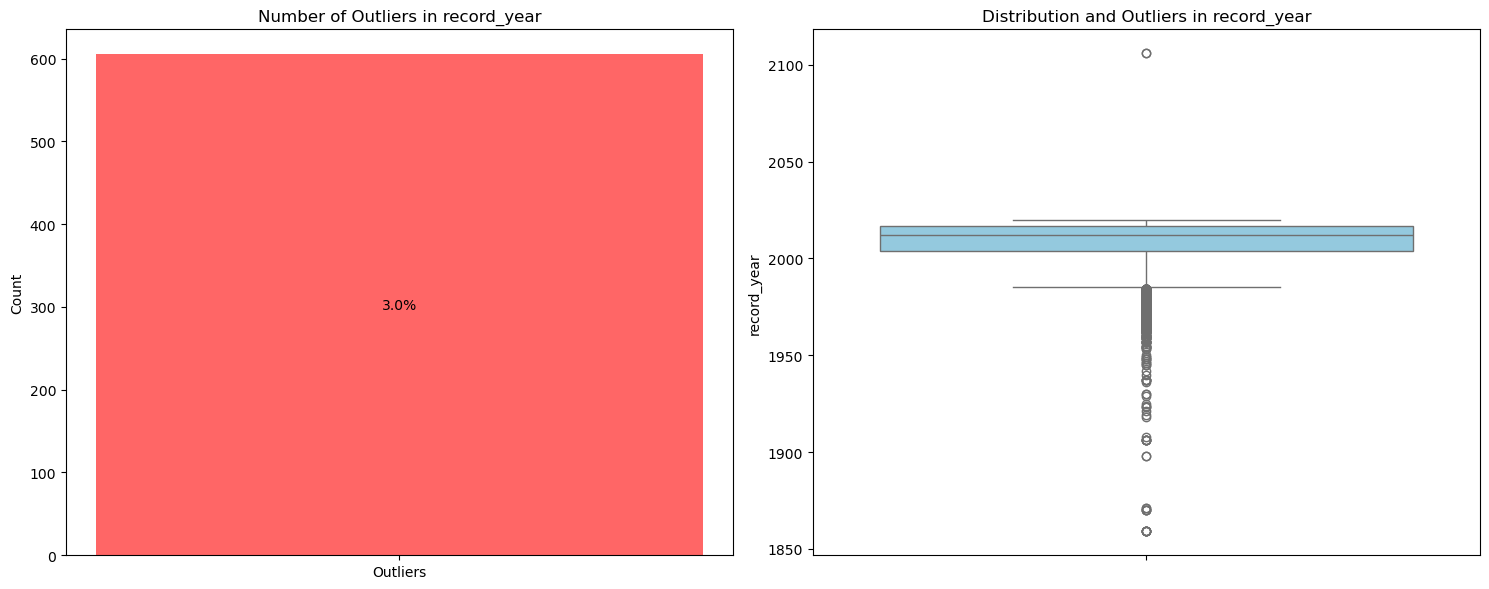


Summary for record_year:
Total outliers: 605
Percentage of outliers: 2.98%
Total valid samples: 20306
IQR multiplier used: 1.5
--------------------------------------------------


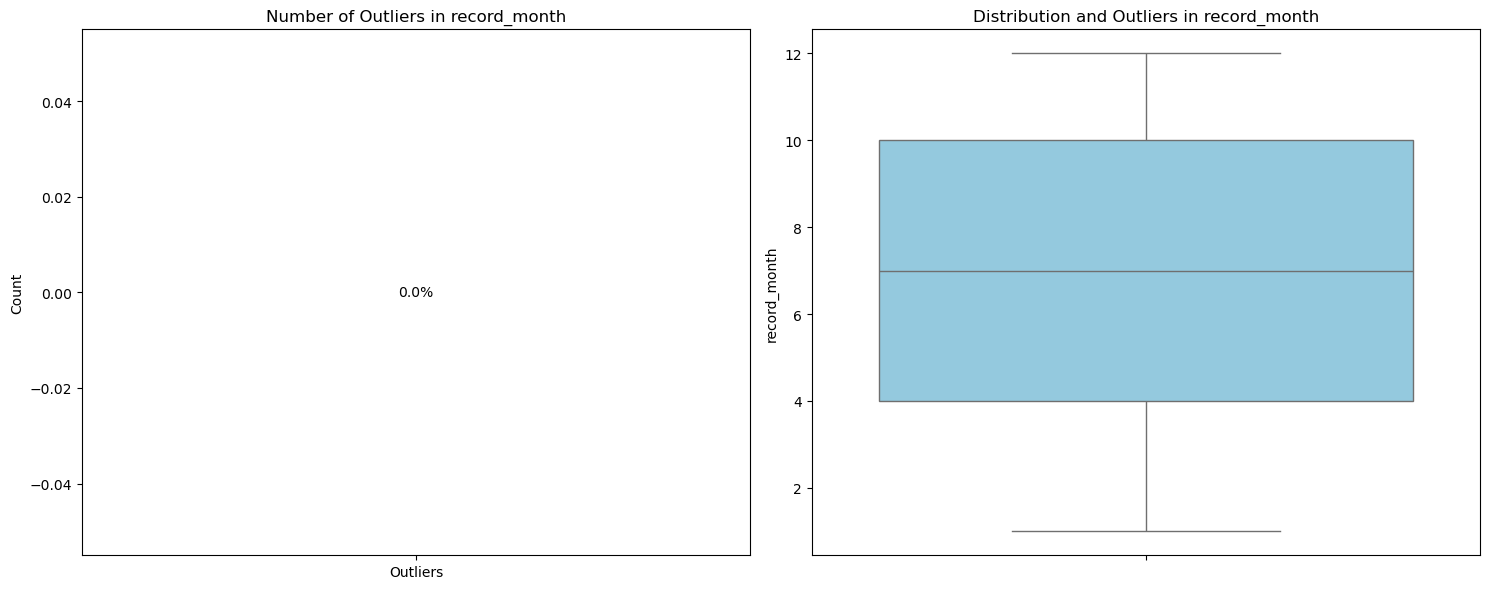


Summary for record_month:
Total outliers: 0
Percentage of outliers: 0.00%
Total valid samples: 20306
IQR multiplier used: 1.5
--------------------------------------------------


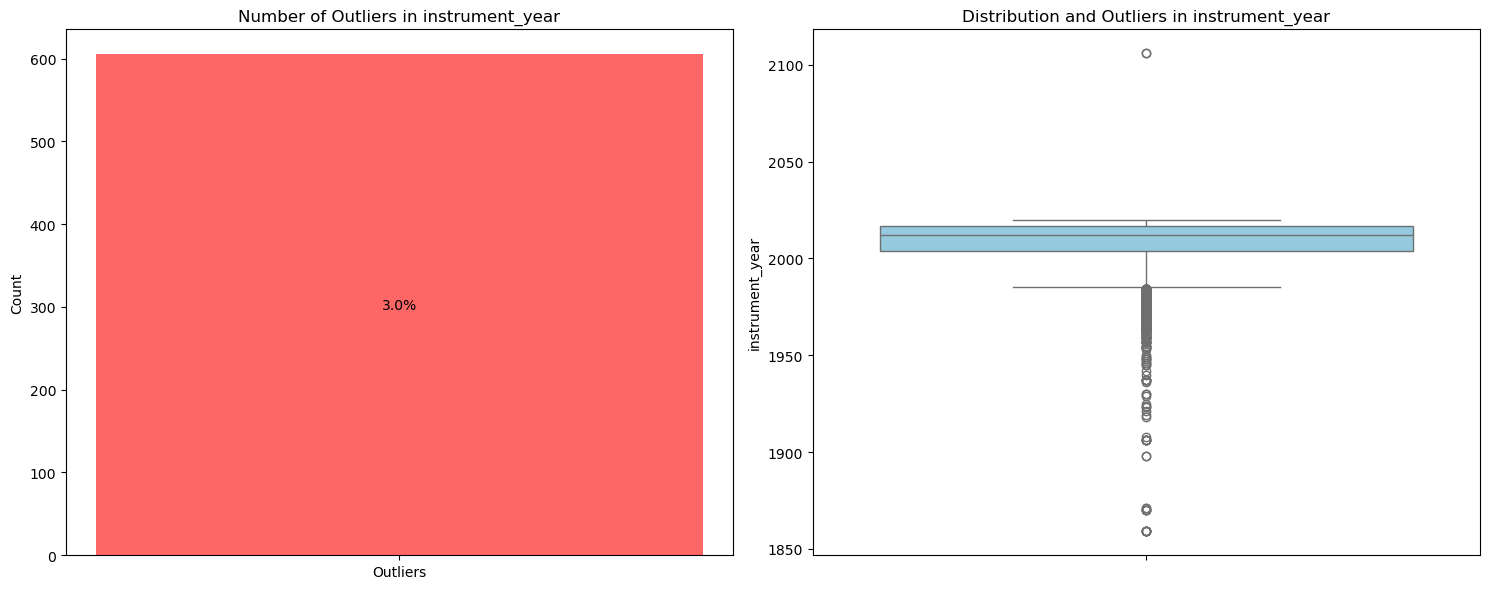


Summary for instrument_year:
Total outliers: 605
Percentage of outliers: 2.98%
Total valid samples: 20306
IQR multiplier used: 1.5
--------------------------------------------------


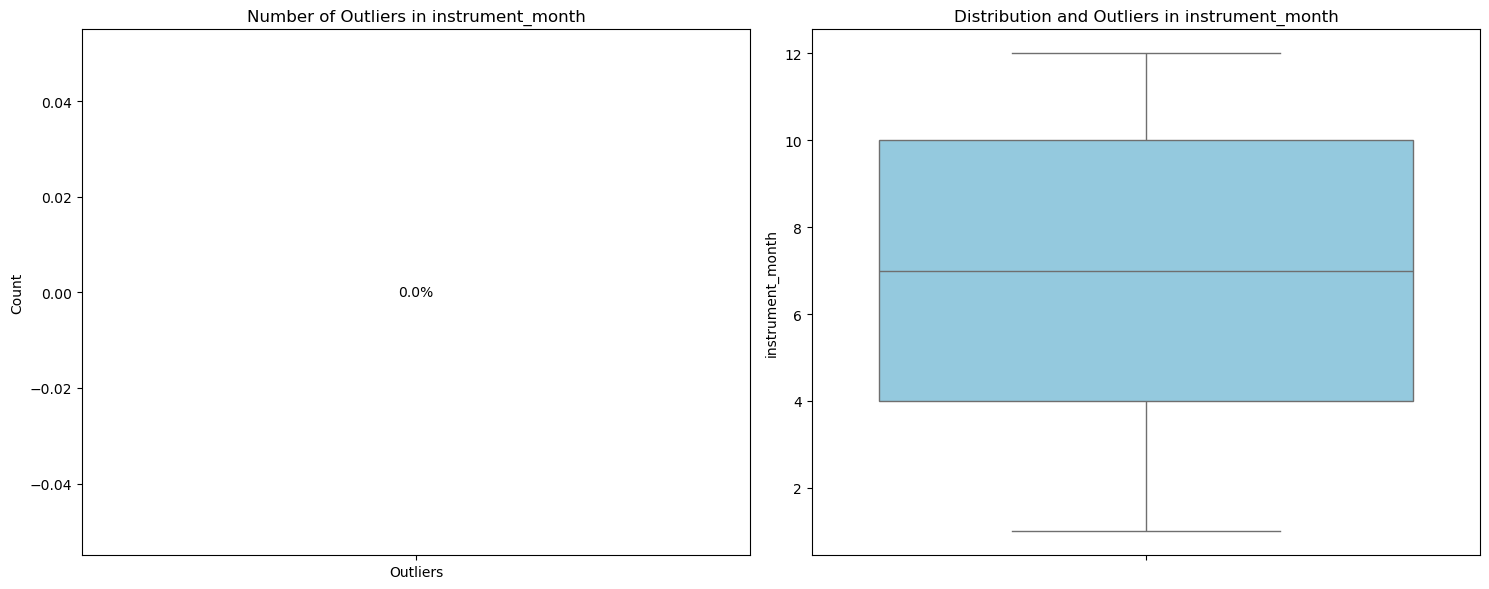


Summary for instrument_month:
Total outliers: 0
Percentage of outliers: 0.00%
Total valid samples: 20306
IQR multiplier used: 1.5
--------------------------------------------------


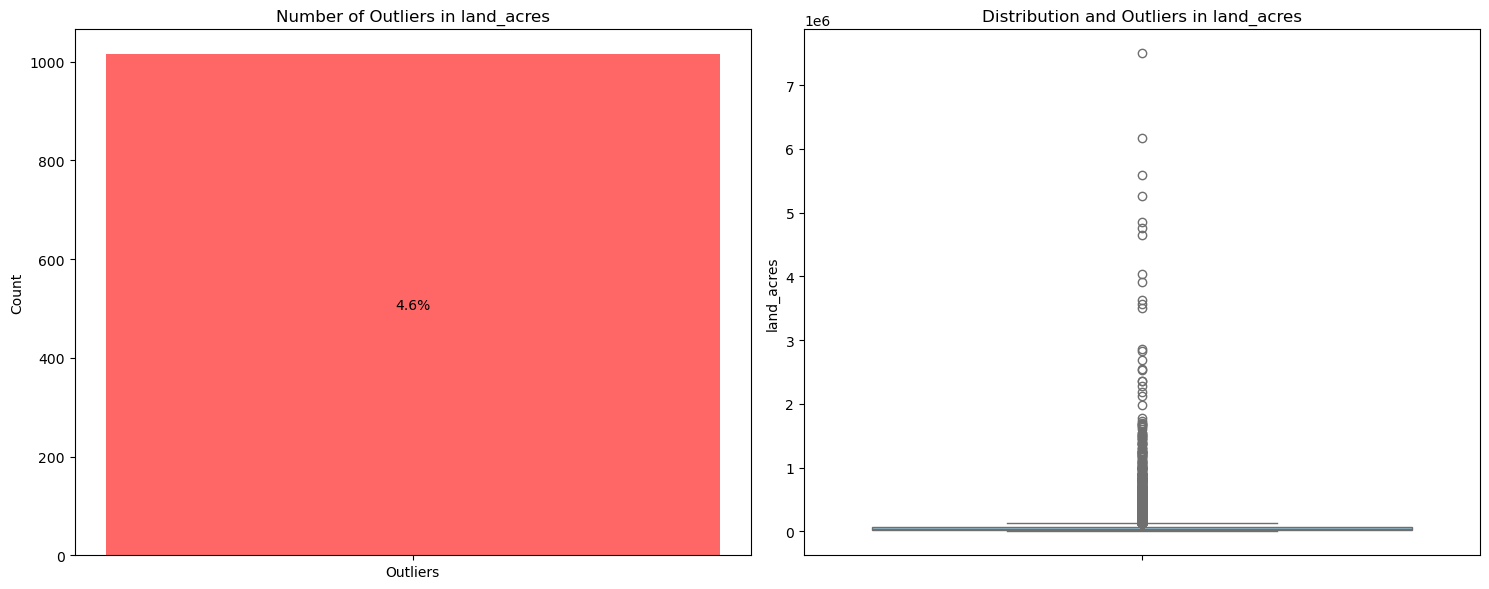


Summary for land_acres:
Total outliers: 1015
Percentage of outliers: 4.57%
Total valid samples: 22213
IQR multiplier used: 1.5
--------------------------------------------------


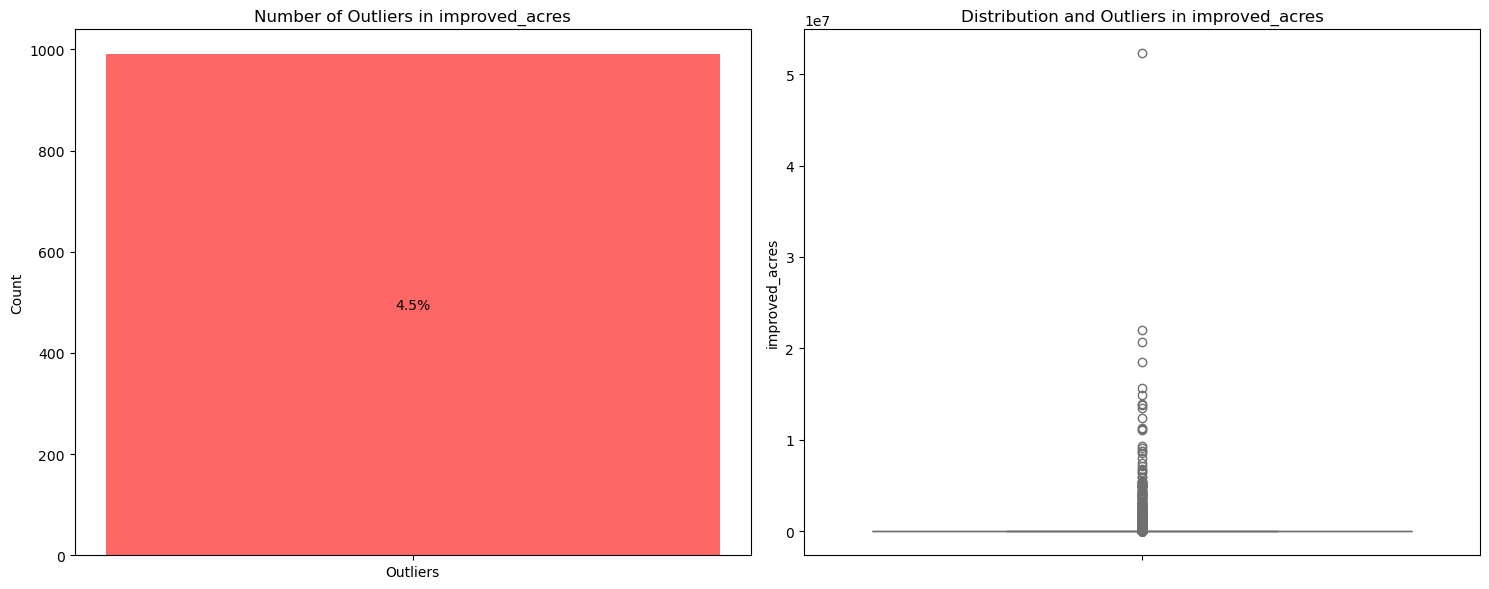


Summary for improved_acres:
Total outliers: 990
Percentage of outliers: 4.46%
Total valid samples: 22213
IQR multiplier used: 1.5
--------------------------------------------------


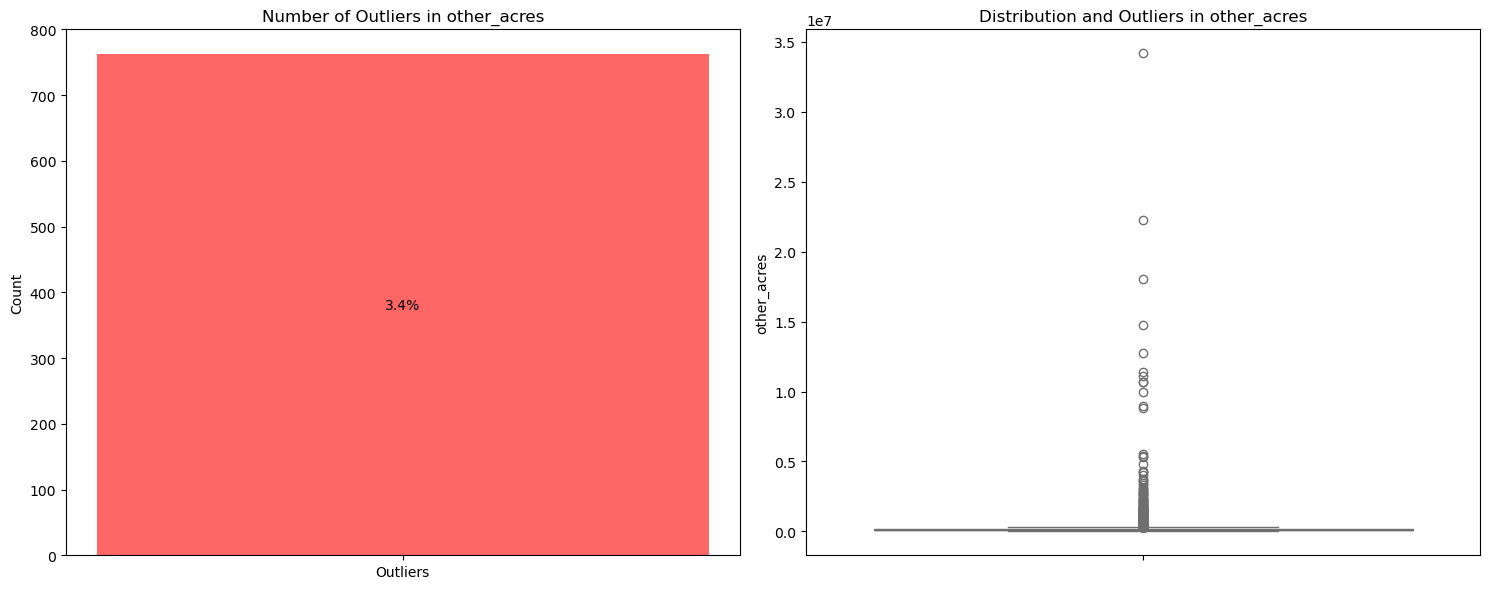


Summary for other_acres:
Total outliers: 762
Percentage of outliers: 3.43%
Total valid samples: 22213
IQR multiplier used: 1.5
--------------------------------------------------


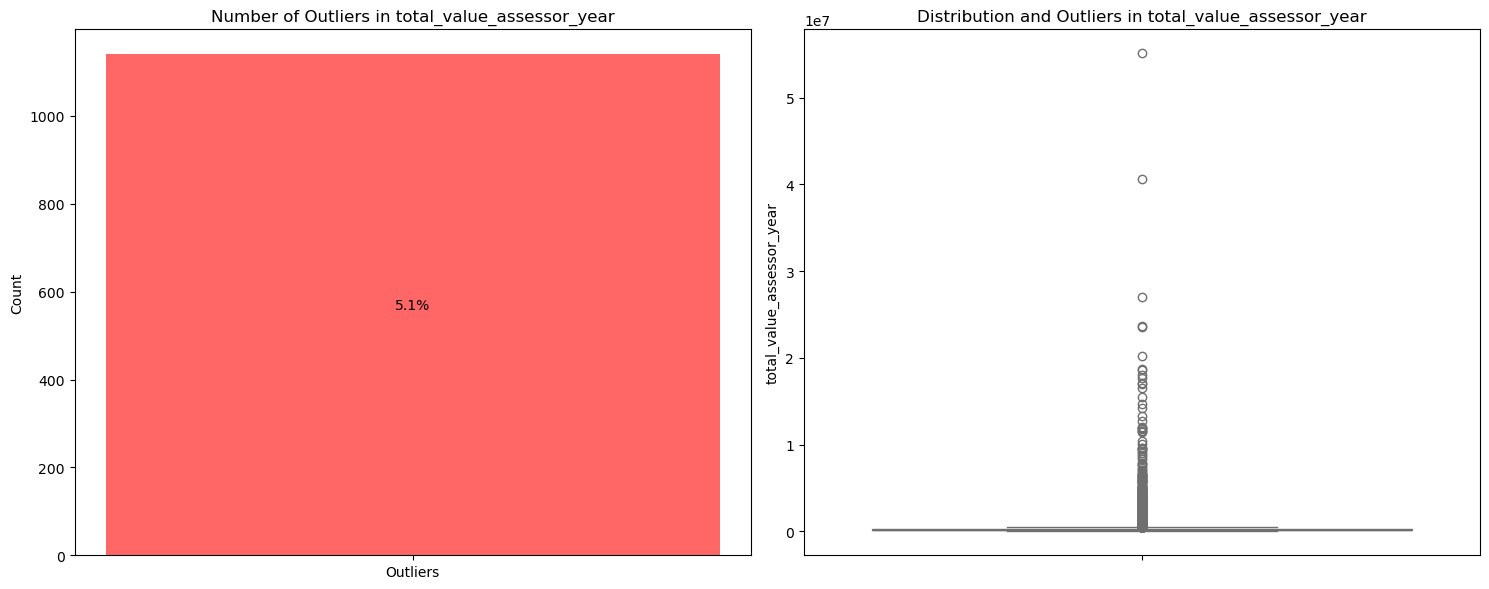


Summary for total_value_assessor_year:
Total outliers: 1140
Percentage of outliers: 5.13%
Total valid samples: 22213
IQR multiplier used: 1.5
--------------------------------------------------


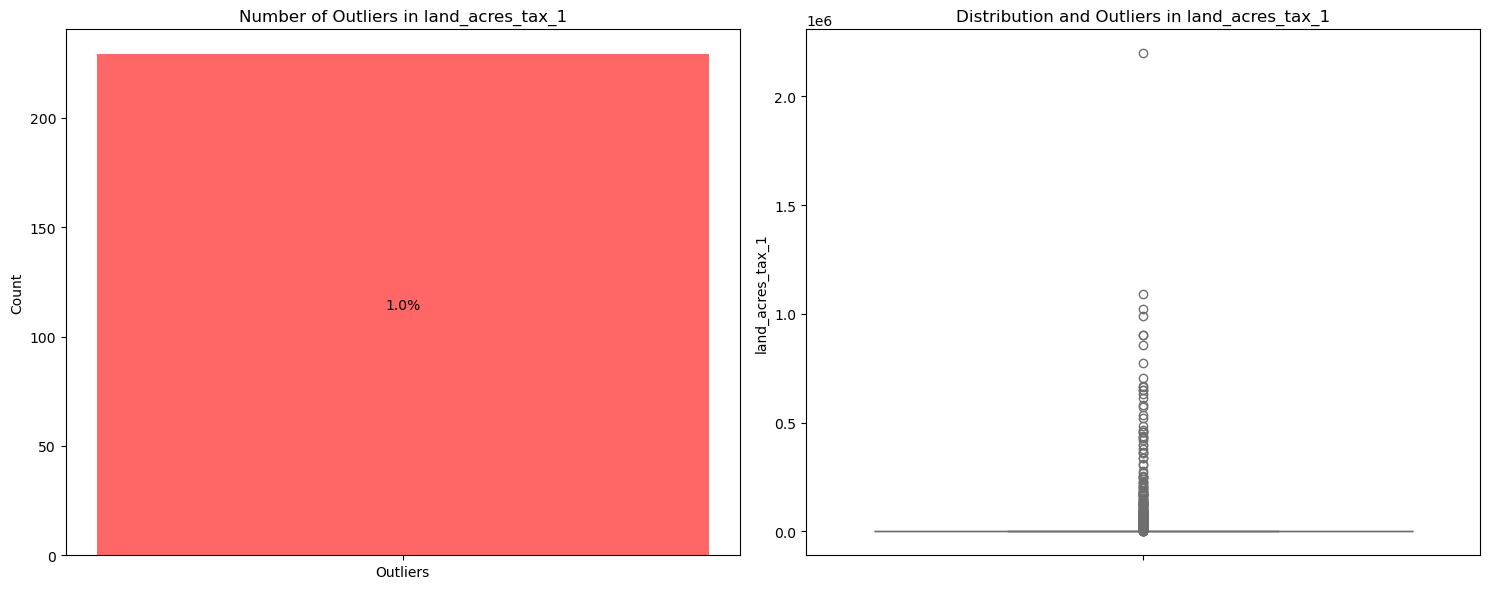


Summary for land_acres_tax_1:
Total outliers: 229
Percentage of outliers: 1.03%
Total valid samples: 22213
IQR multiplier used: 1.5
--------------------------------------------------


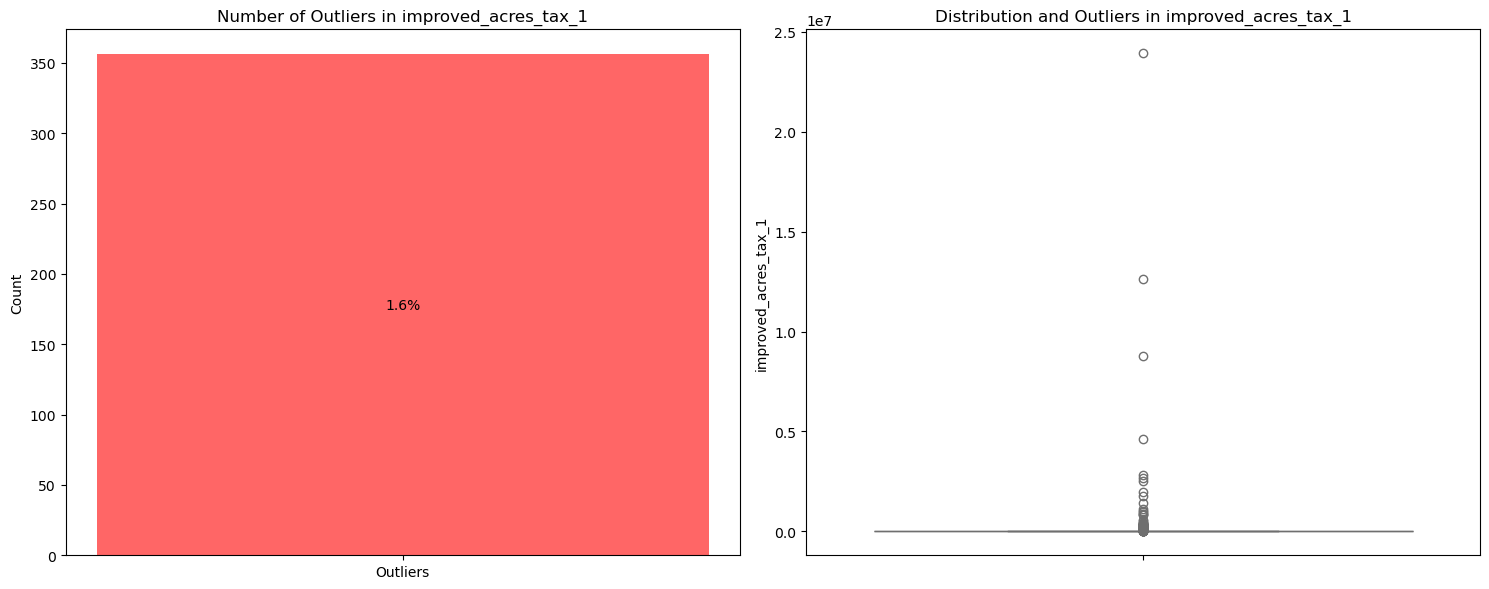


Summary for improved_acres_tax_1:
Total outliers: 356
Percentage of outliers: 1.60%
Total valid samples: 22213
IQR multiplier used: 1.5
--------------------------------------------------


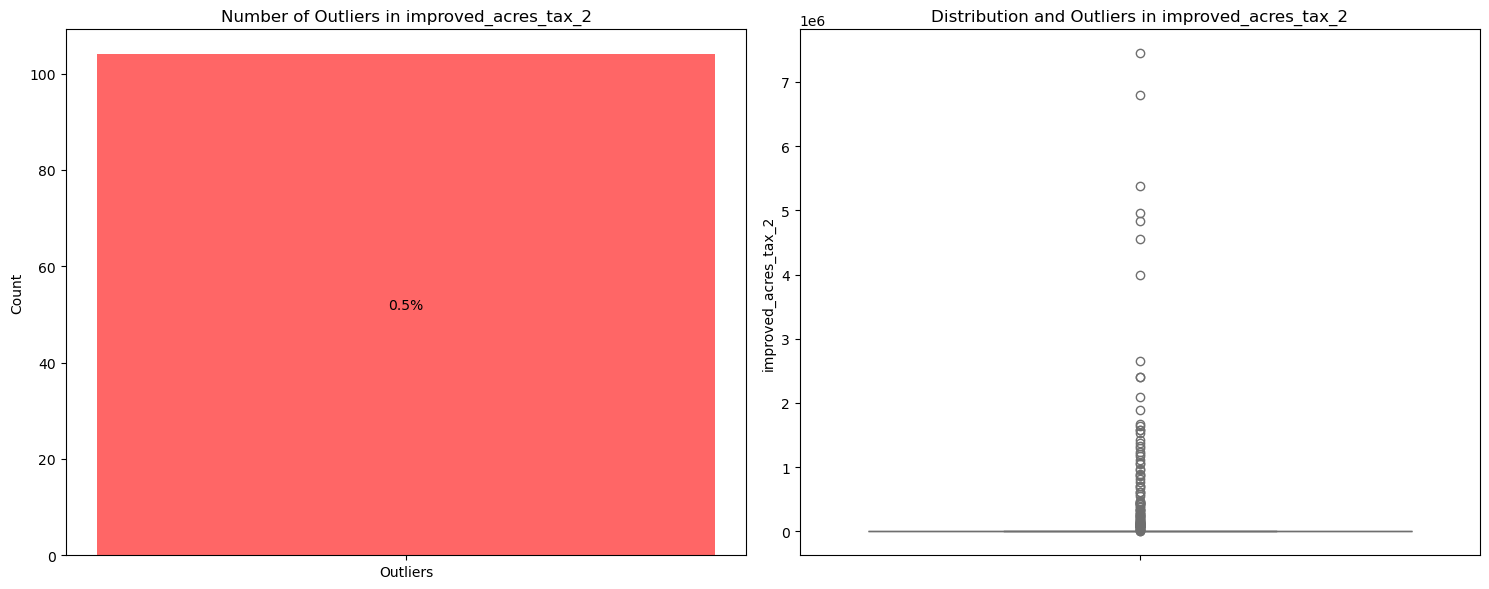


Summary for improved_acres_tax_2:
Total outliers: 104
Percentage of outliers: 0.47%
Total valid samples: 22213
IQR multiplier used: 1.5
--------------------------------------------------


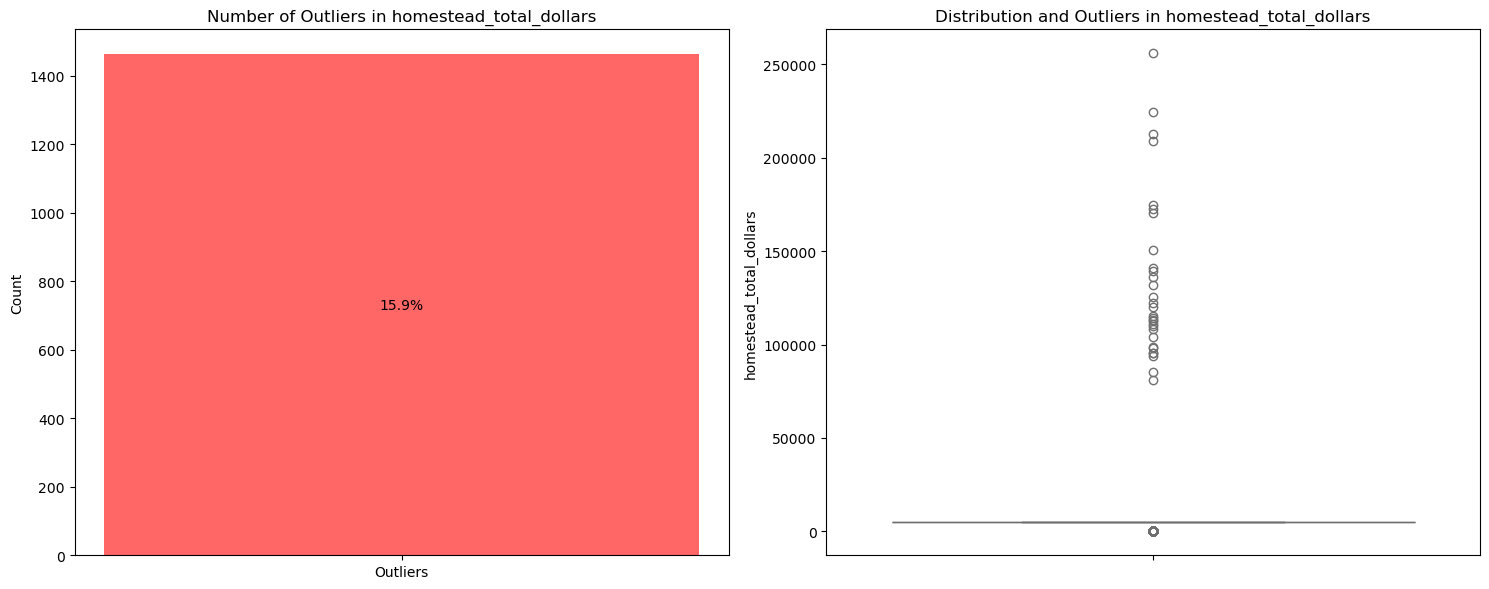


Summary for homestead_total_dollars:
Total outliers: 1462
Percentage of outliers: 15.91%
Total valid samples: 9189
IQR multiplier used: 1.5
--------------------------------------------------


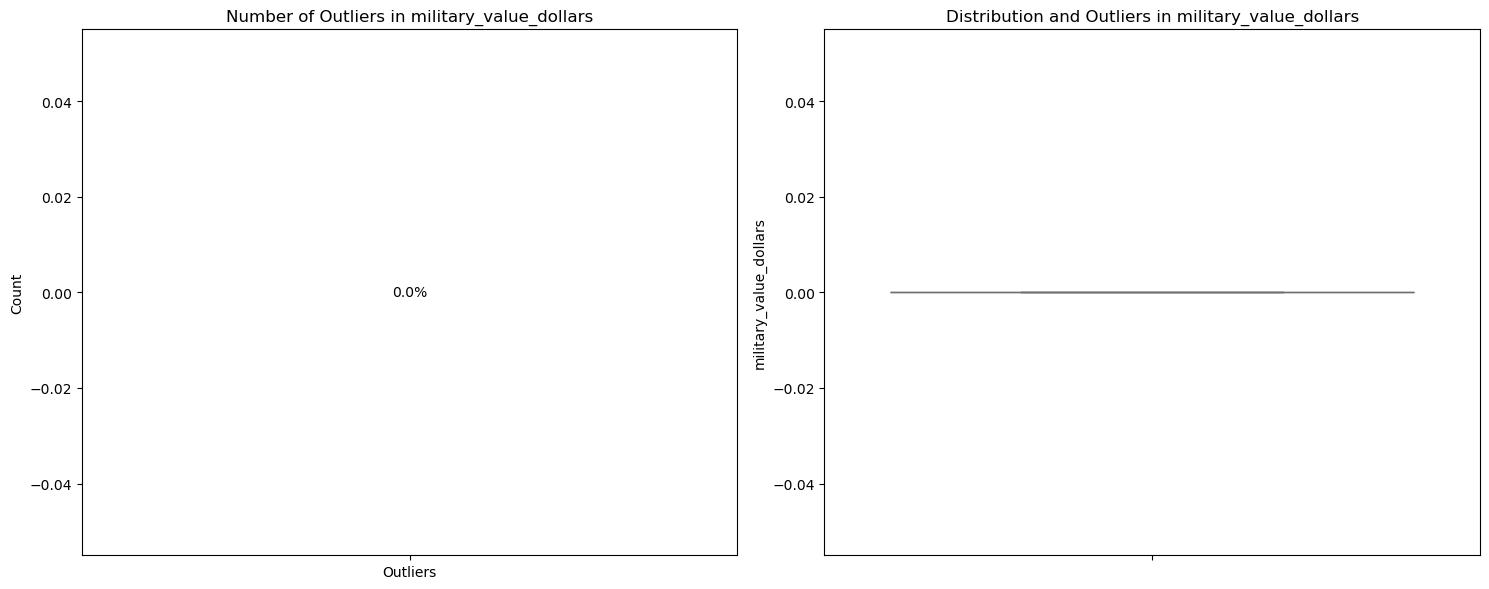


Summary for military_value_dollars:
Total outliers: 0
Percentage of outliers: 0.00%
Total valid samples: 9189
IQR multiplier used: 1.5
--------------------------------------------------


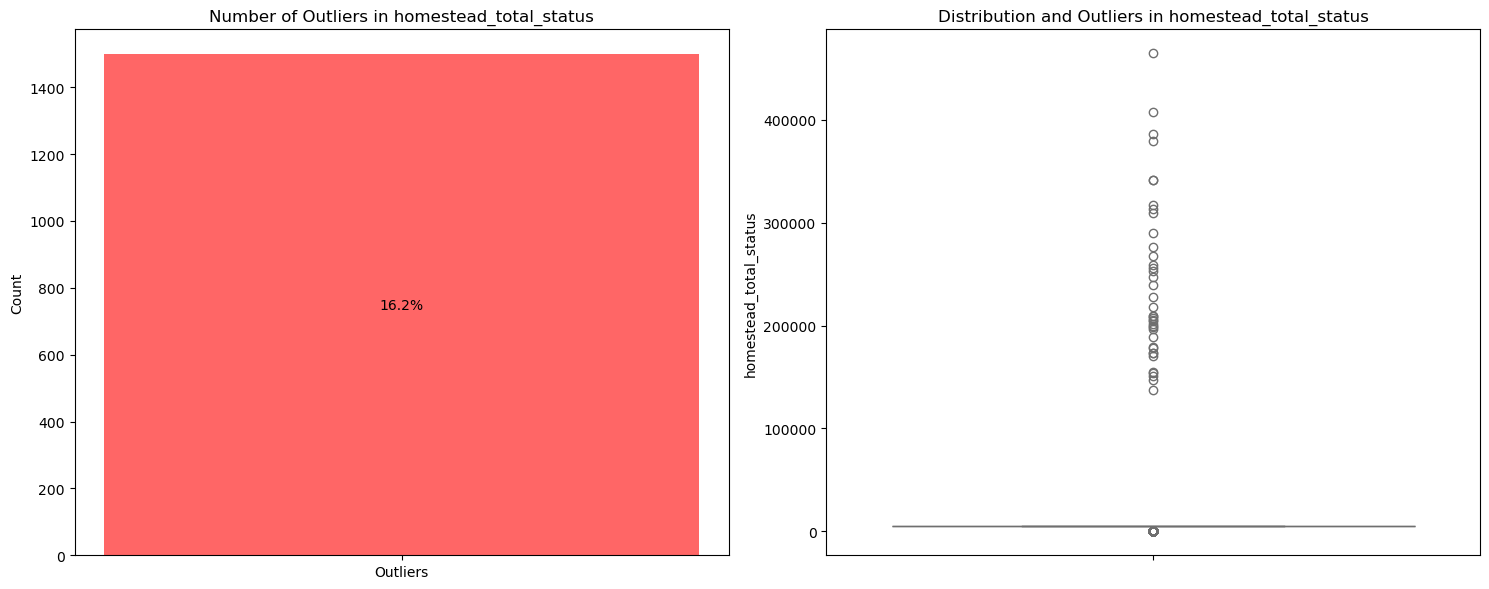


Summary for homestead_total_status:
Total outliers: 1498
Percentage of outliers: 16.20%
Total valid samples: 9247
IQR multiplier used: 1.5
--------------------------------------------------


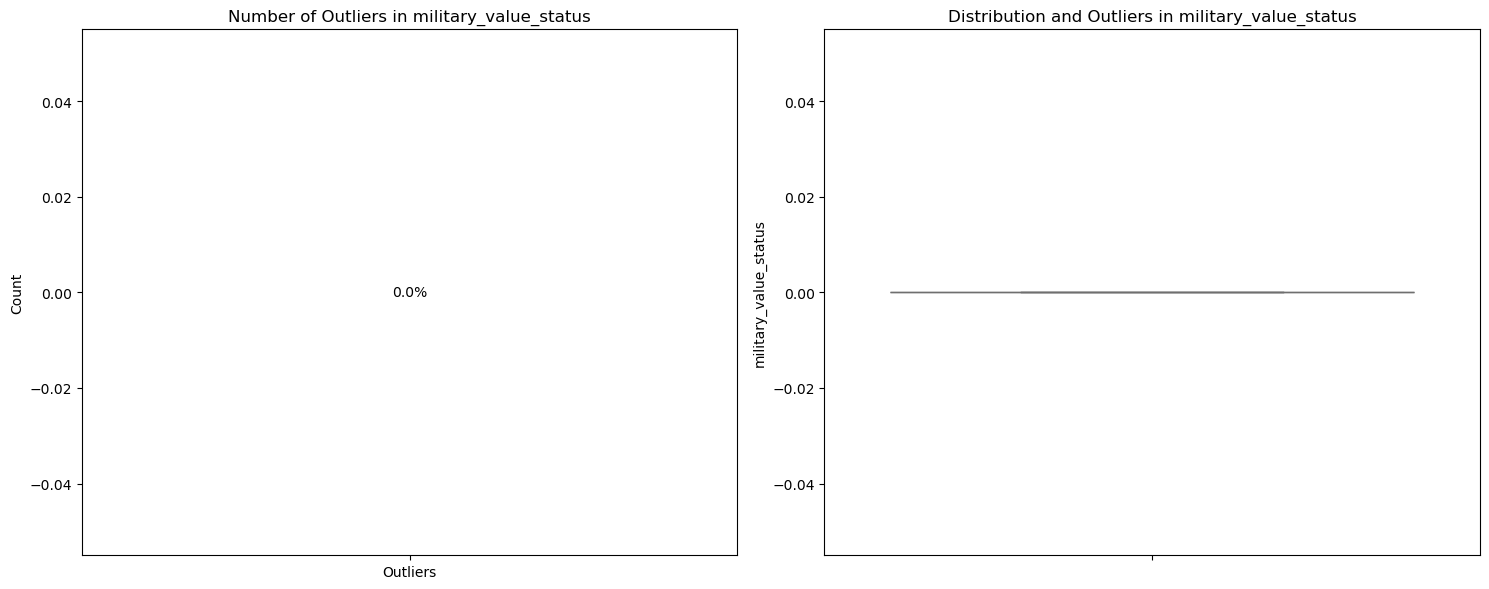


Summary for military_value_status:
Total outliers: 0
Percentage of outliers: 0.00%
Total valid samples: 9247
IQR multiplier used: 1.5
--------------------------------------------------


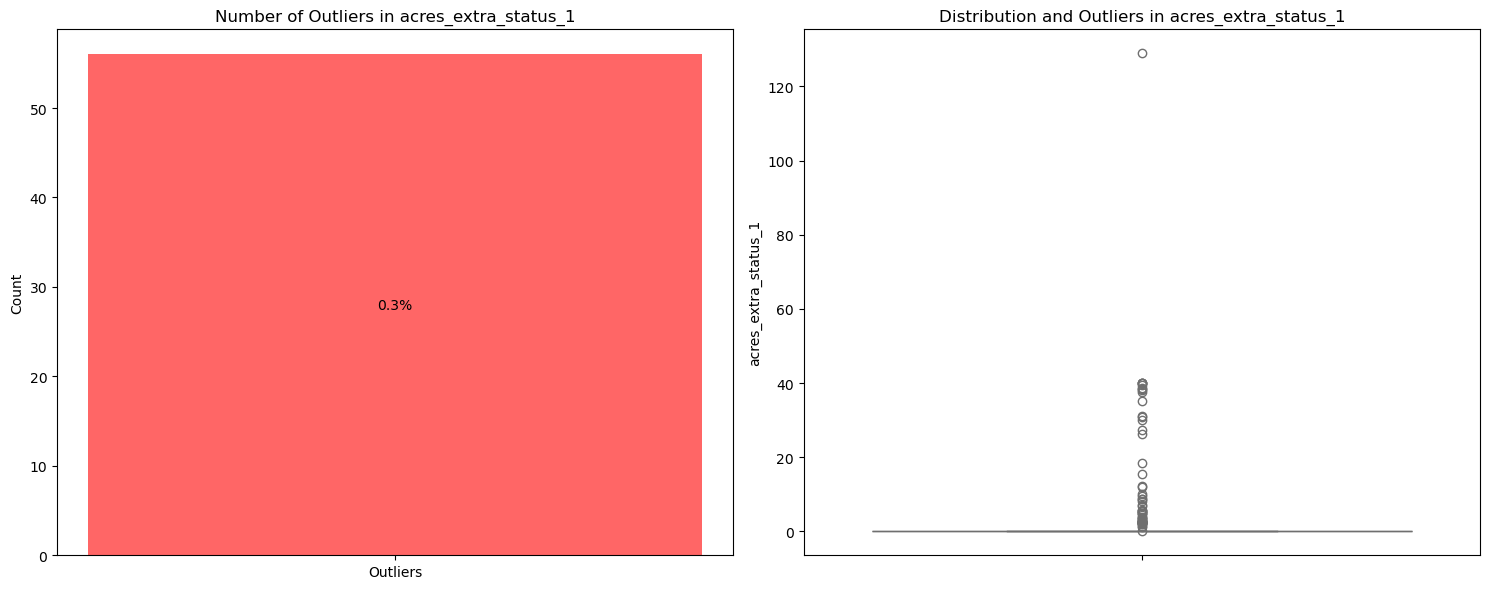


Summary for acres_extra_status_1:
Total outliers: 56
Percentage of outliers: 0.25%
Total valid samples: 22213
IQR multiplier used: 1.5
--------------------------------------------------


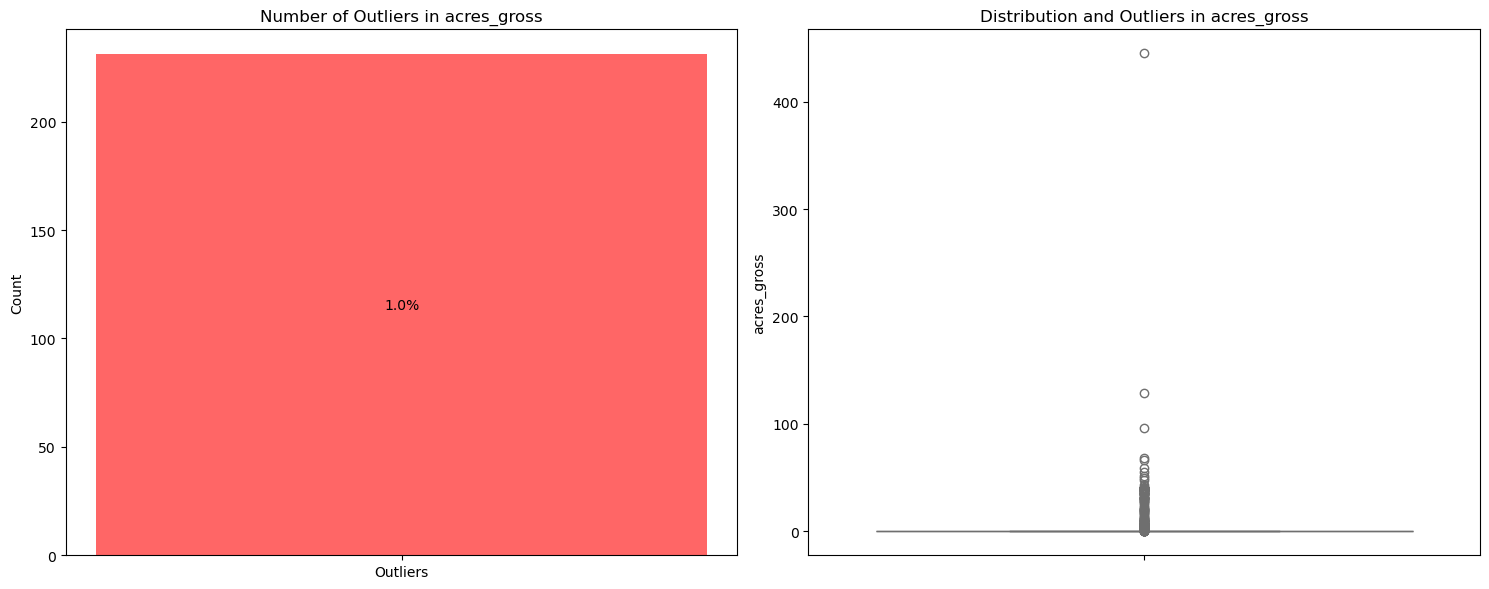


Summary for acres_gross:
Total outliers: 231
Percentage of outliers: 1.04%
Total valid samples: 22213
IQR multiplier used: 1.5
--------------------------------------------------


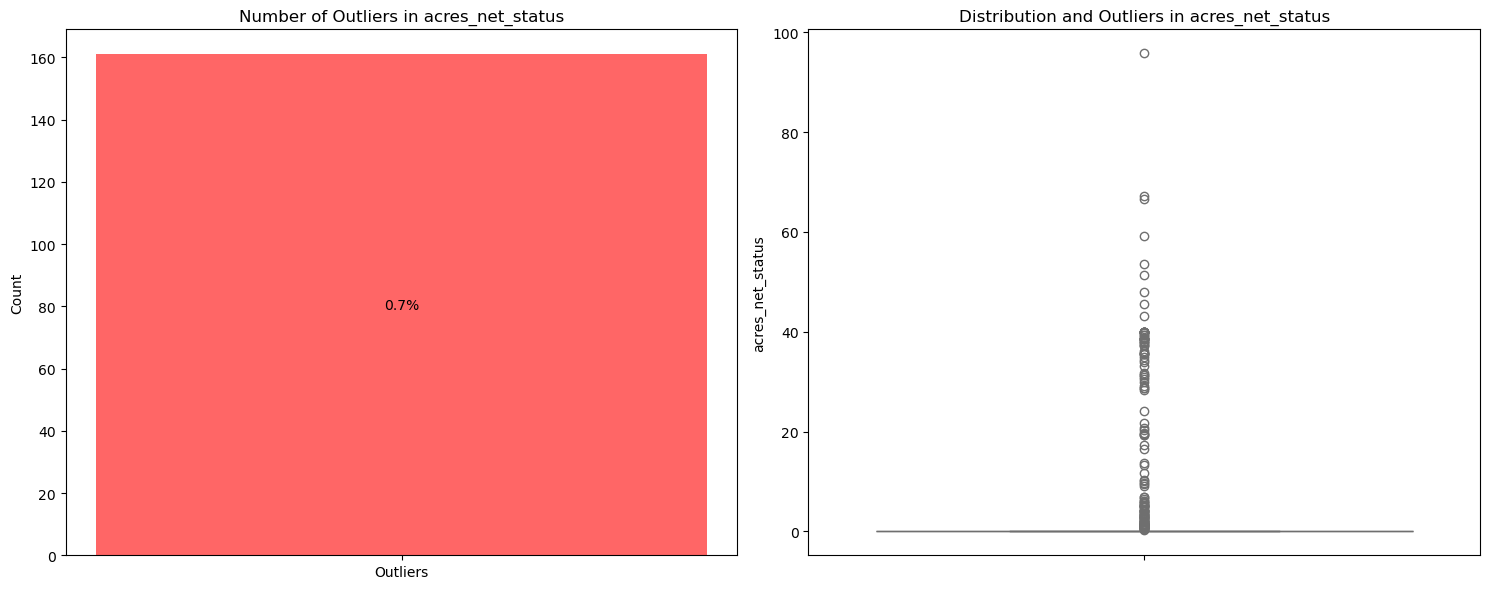


Summary for acres_net_status:
Total outliers: 161
Percentage of outliers: 0.72%
Total valid samples: 22213
IQR multiplier used: 1.5
--------------------------------------------------


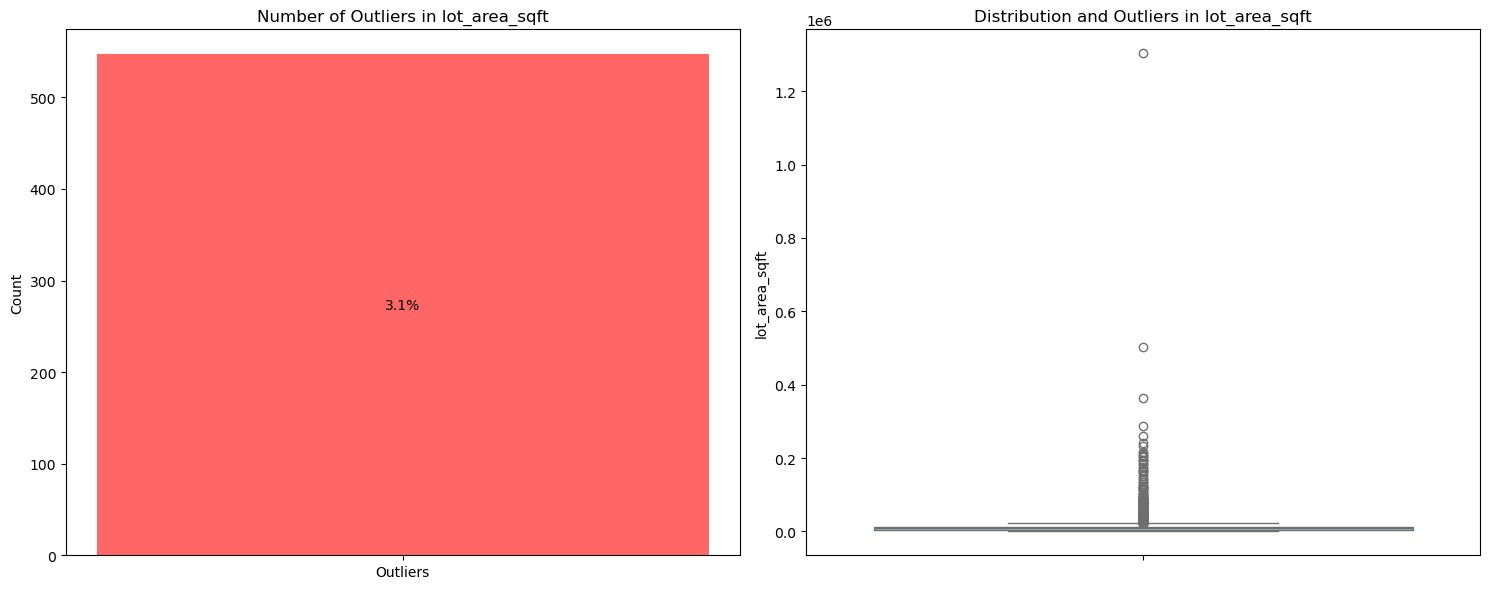


Summary for lot_area_sqft:
Total outliers: 547
Percentage of outliers: 3.06%
Total valid samples: 17905
IQR multiplier used: 1.5
--------------------------------------------------


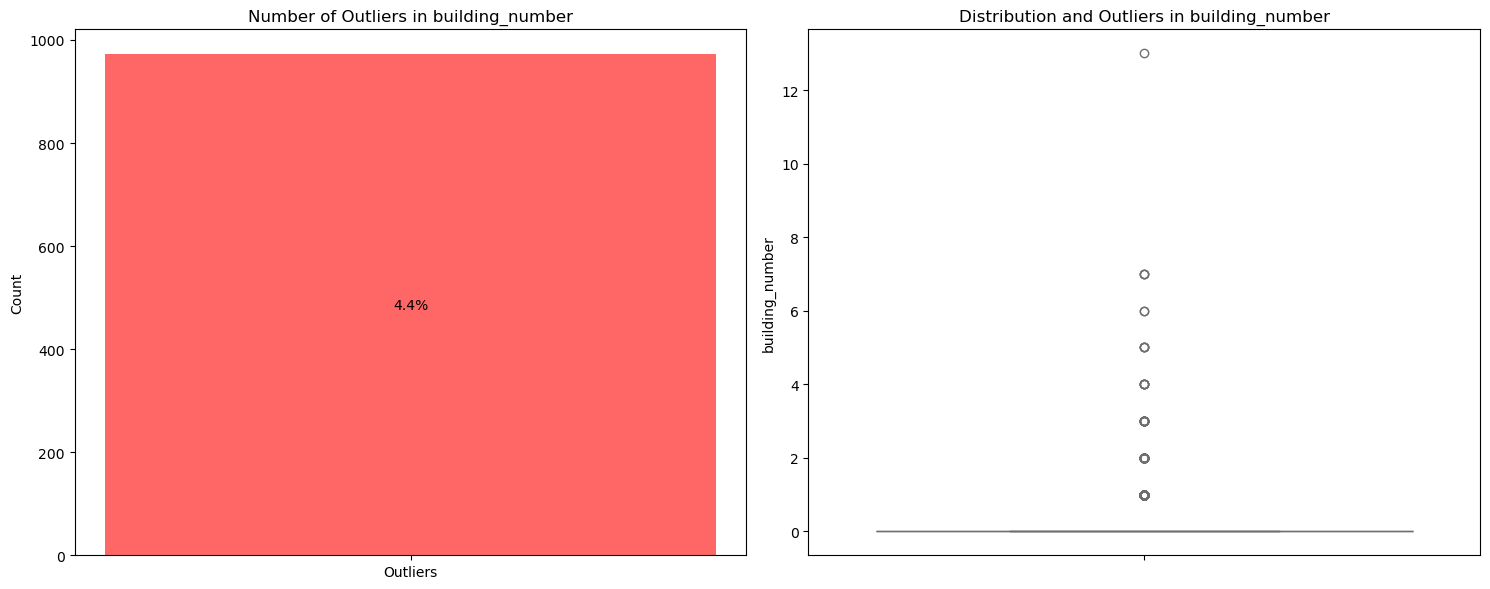


Summary for building_number:
Total outliers: 972
Percentage of outliers: 4.38%
Total valid samples: 22213
IQR multiplier used: 1.5
--------------------------------------------------


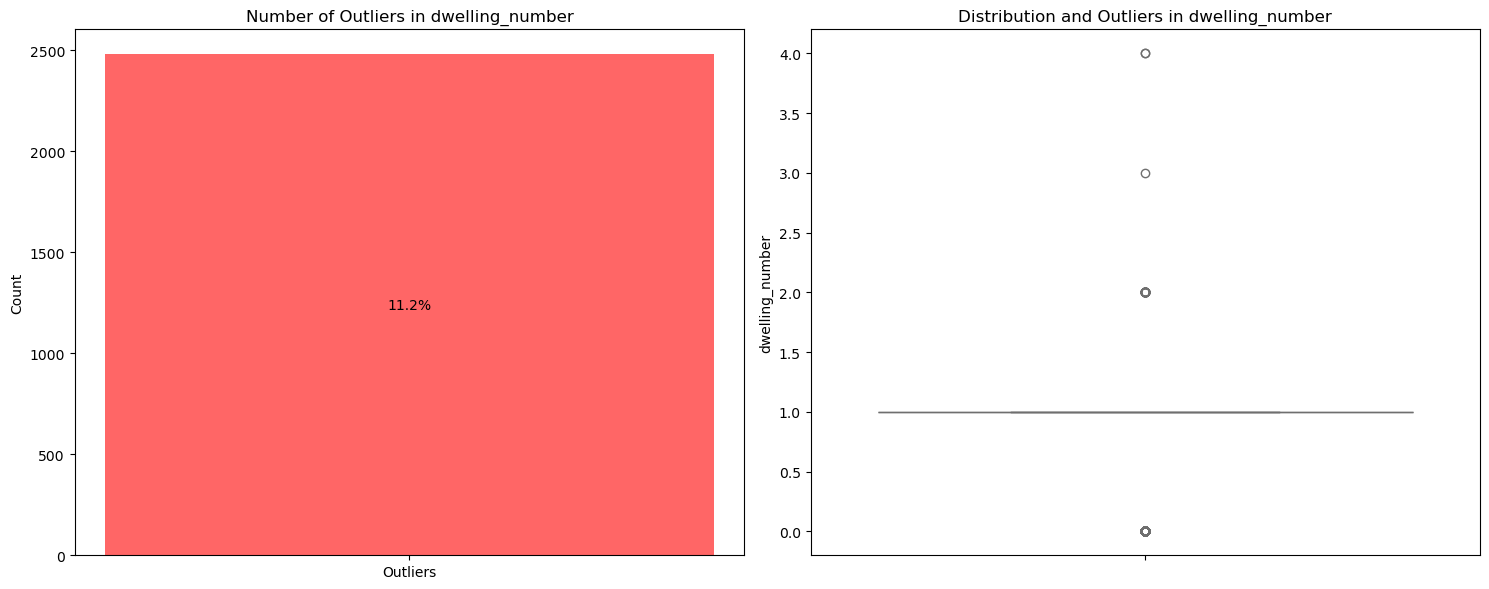


Summary for dwelling_number:
Total outliers: 2479
Percentage of outliers: 11.16%
Total valid samples: 22213
IQR multiplier used: 1.5
--------------------------------------------------


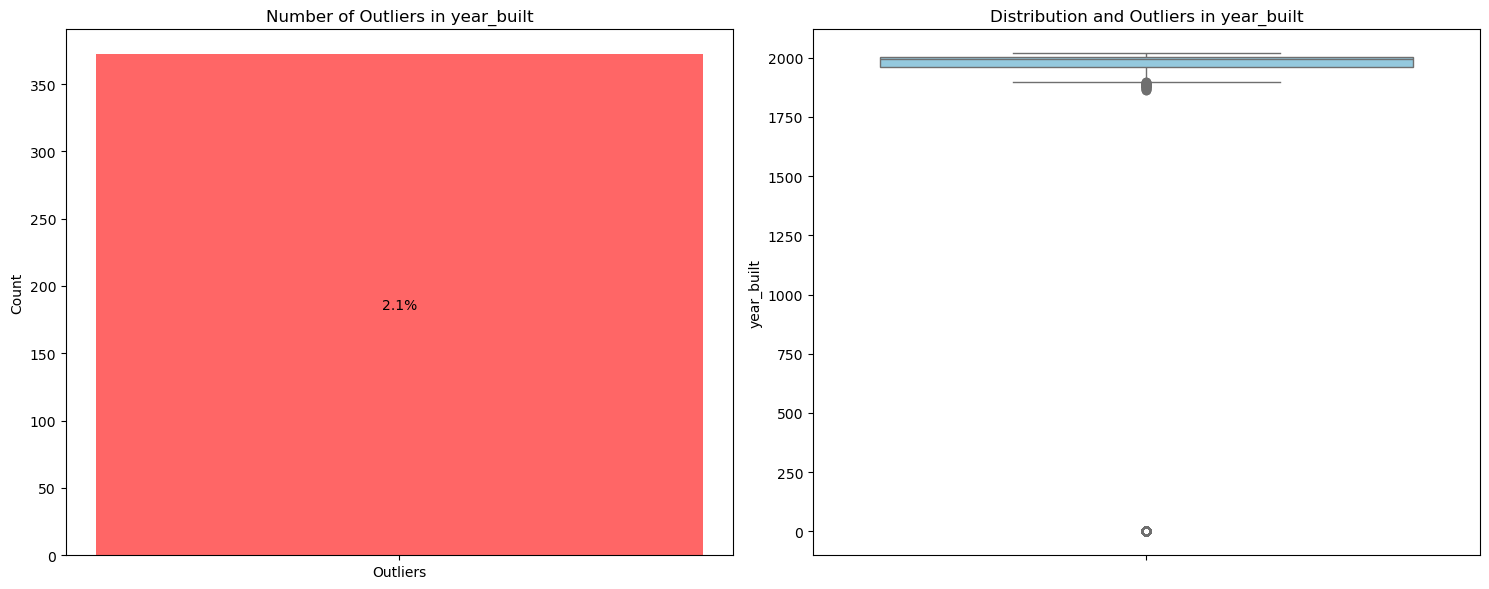


Summary for year_built:
Total outliers: 372
Percentage of outliers: 2.08%
Total valid samples: 17905
IQR multiplier used: 1.5
--------------------------------------------------


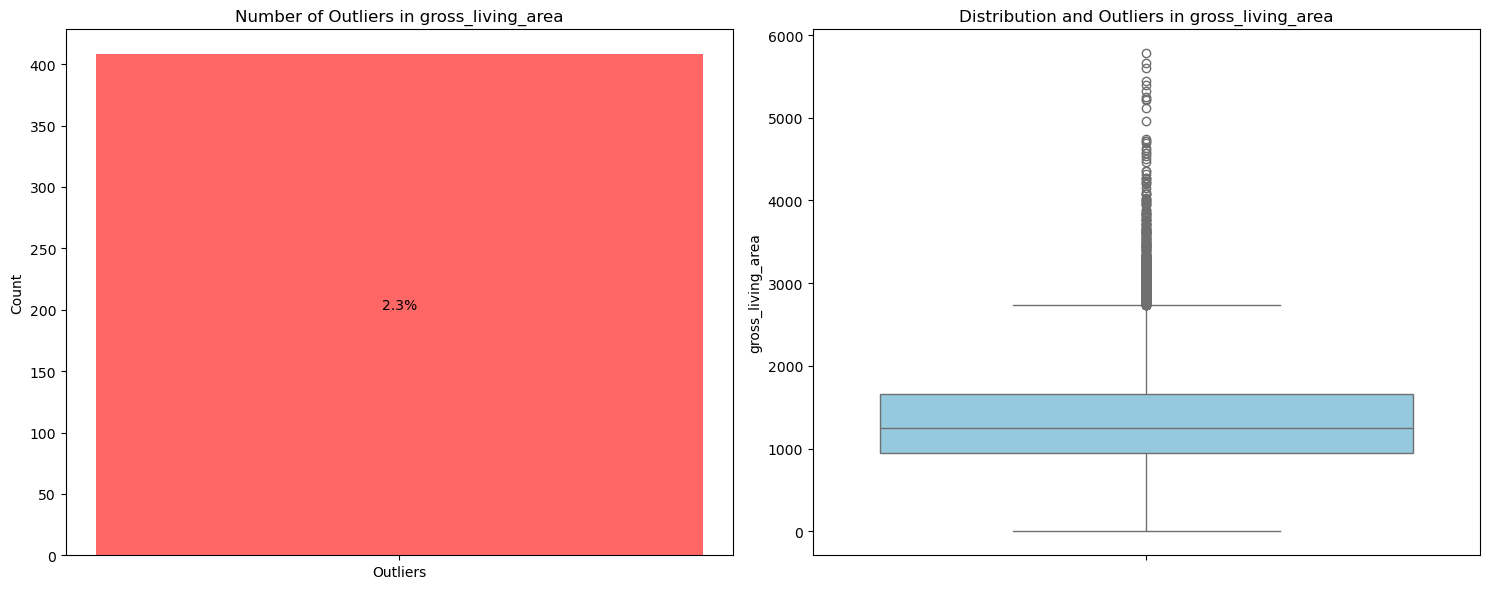


Summary for gross_living_area:
Total outliers: 408
Percentage of outliers: 2.28%
Total valid samples: 17905
IQR multiplier used: 1.5
--------------------------------------------------


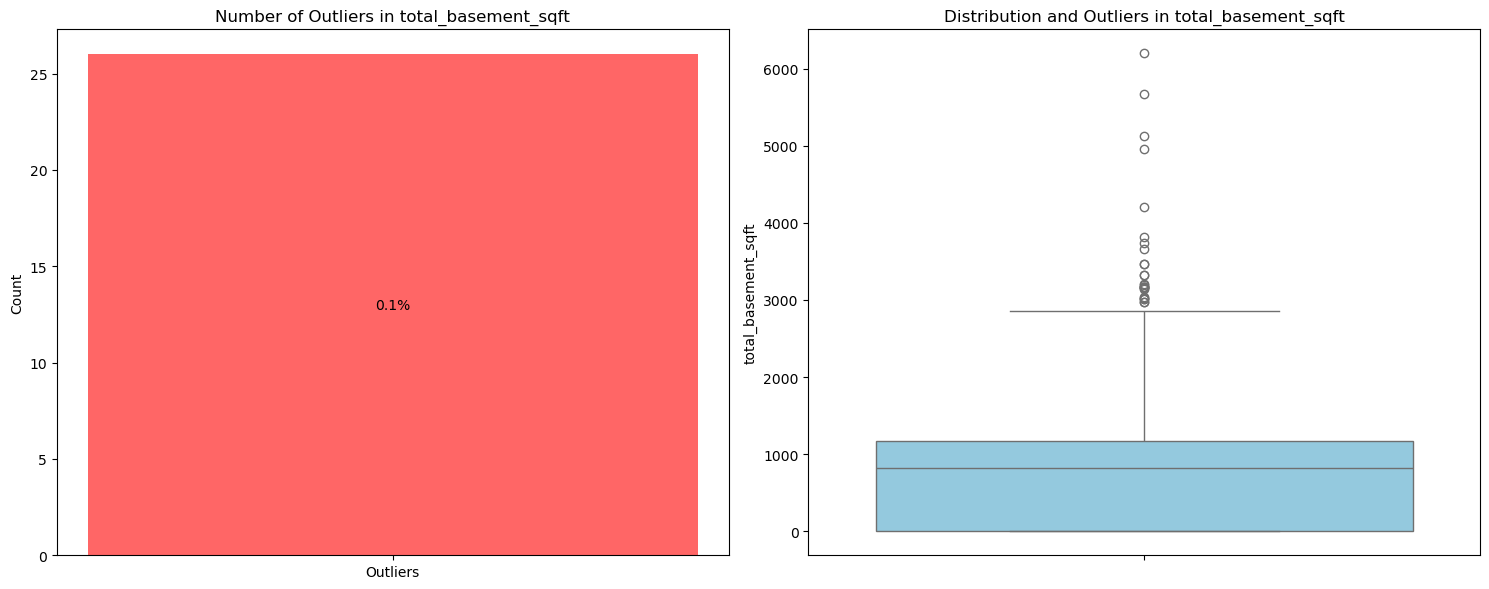


Summary for total_basement_sqft:
Total outliers: 26
Percentage of outliers: 0.15%
Total valid samples: 17905
IQR multiplier used: 1.5
--------------------------------------------------


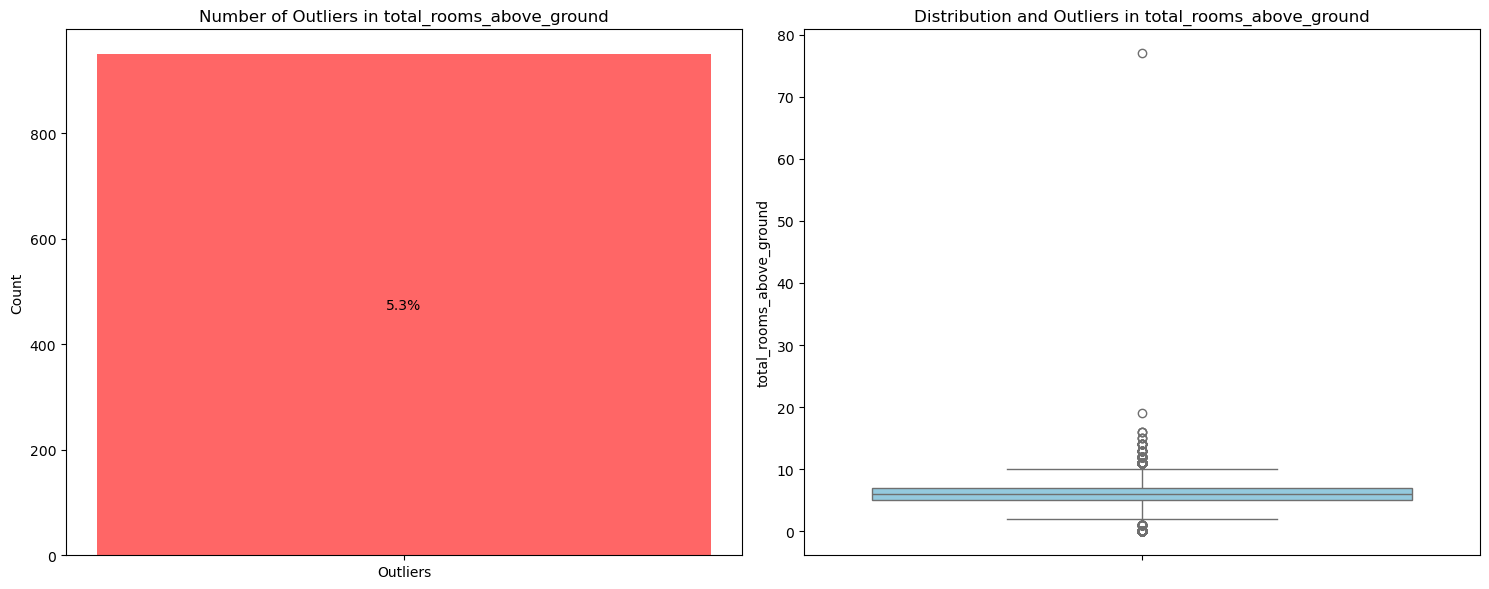


Summary for total_rooms_above_ground:
Total outliers: 949
Percentage of outliers: 5.30%
Total valid samples: 17905
IQR multiplier used: 1.5
--------------------------------------------------


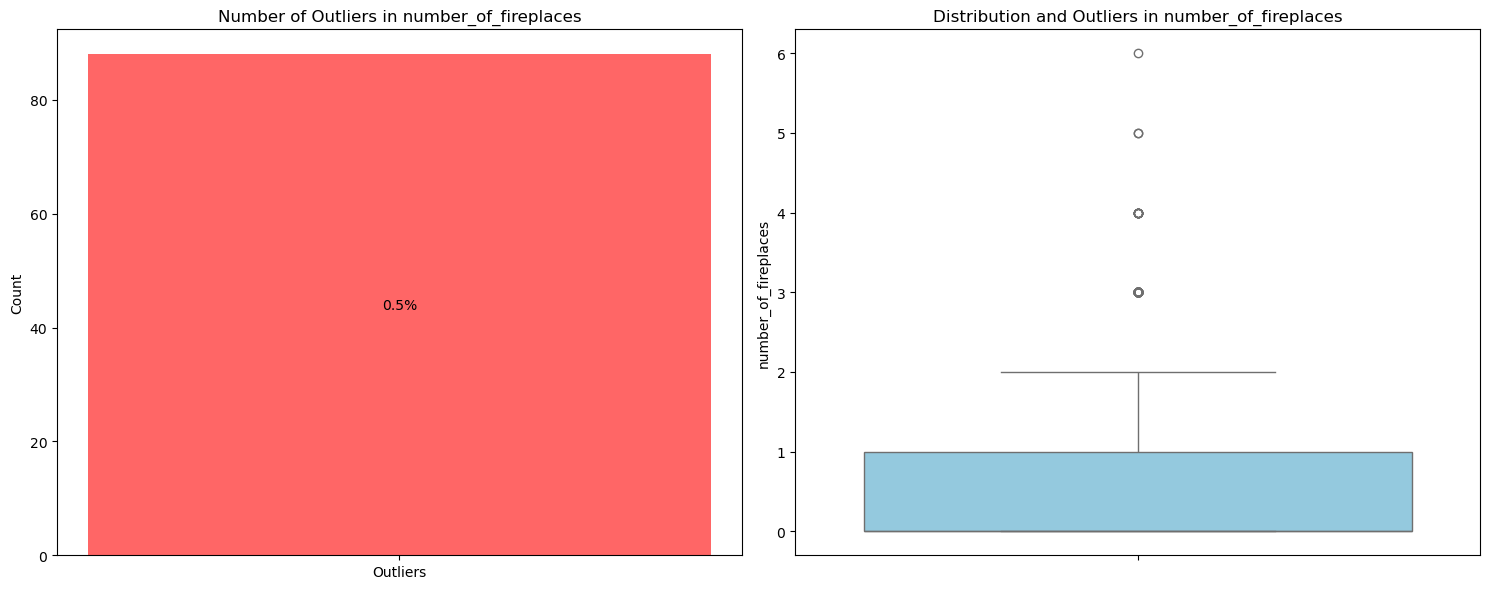


Summary for number_of_fireplaces:
Total outliers: 88
Percentage of outliers: 0.49%
Total valid samples: 17905
IQR multiplier used: 1.5
--------------------------------------------------


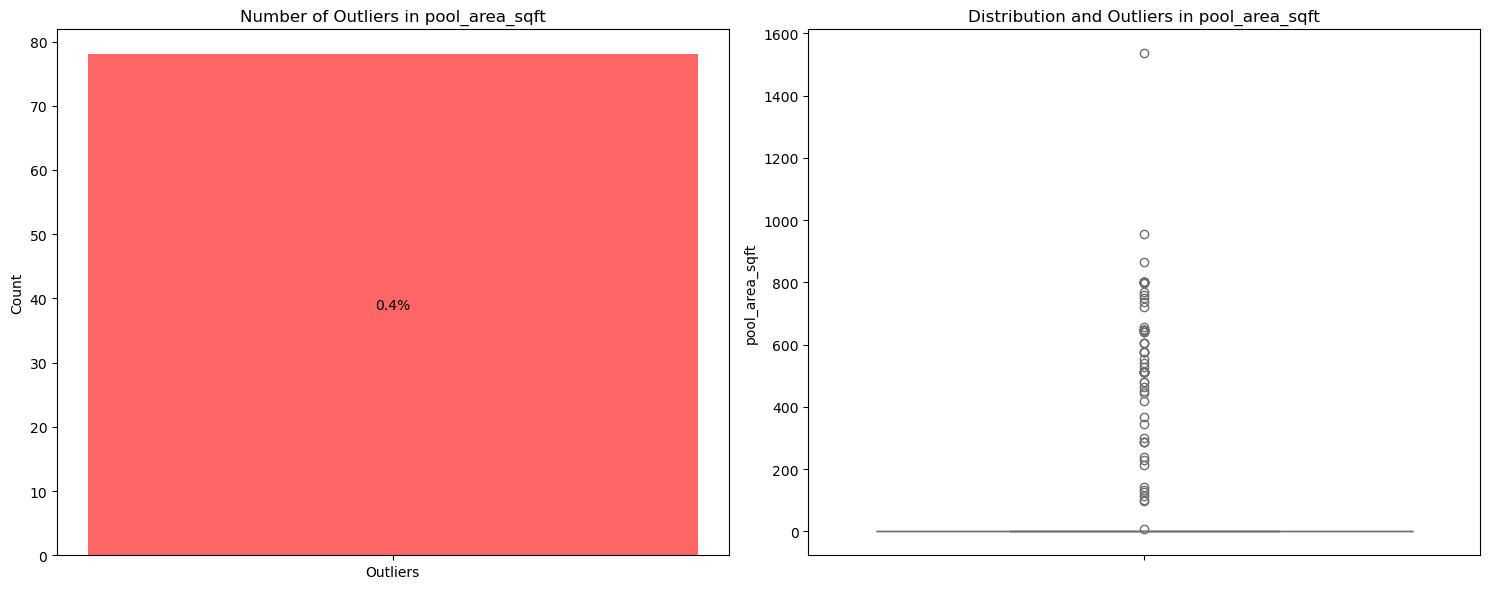


Summary for pool_area_sqft:
Total outliers: 78
Percentage of outliers: 0.44%
Total valid samples: 17905
IQR multiplier used: 1.5
--------------------------------------------------


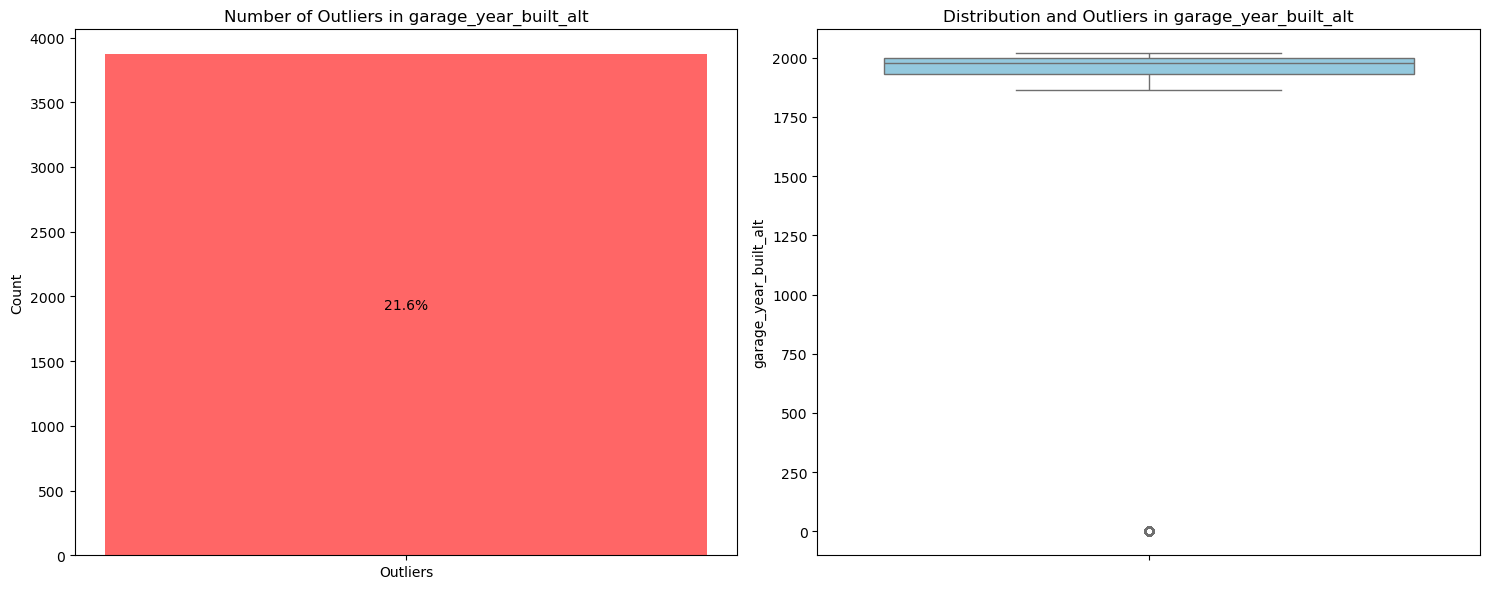


Summary for garage_year_built_alt:
Total outliers: 3870
Percentage of outliers: 21.61%
Total valid samples: 17905
IQR multiplier used: 1.5
--------------------------------------------------


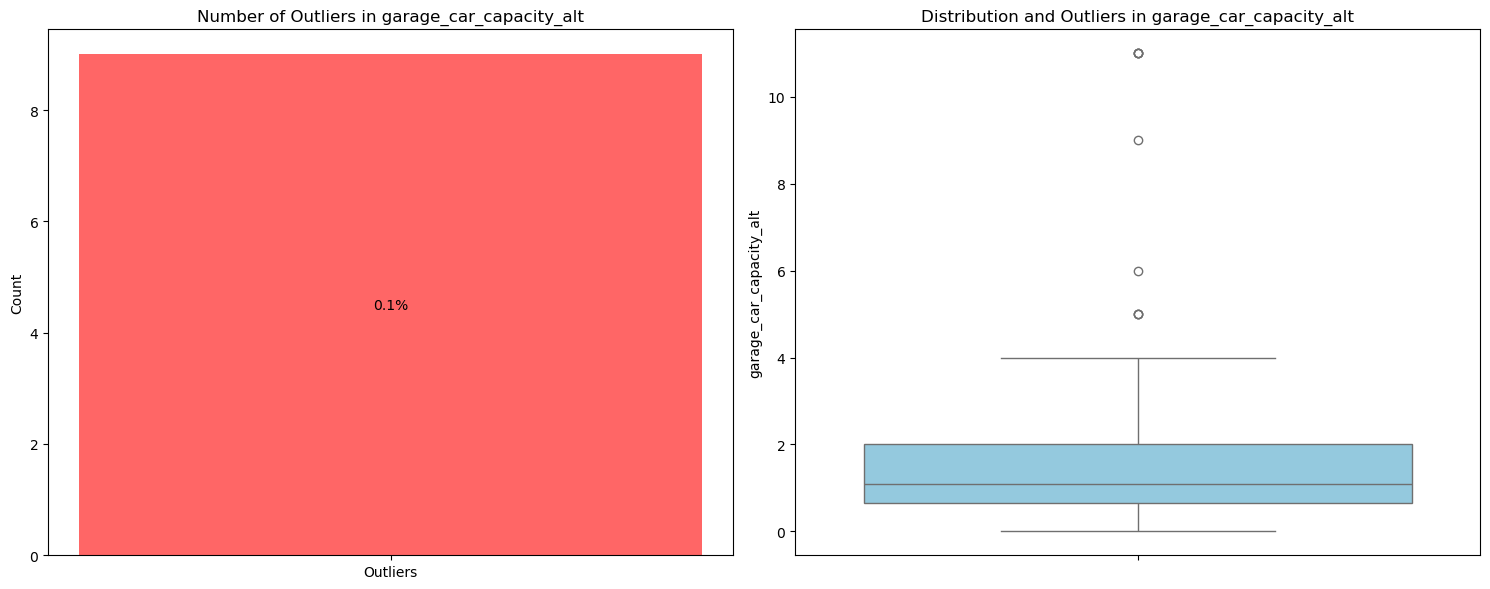


Summary for garage_car_capacity_alt:
Total outliers: 9
Percentage of outliers: 0.05%
Total valid samples: 17905
IQR multiplier used: 1.5
--------------------------------------------------


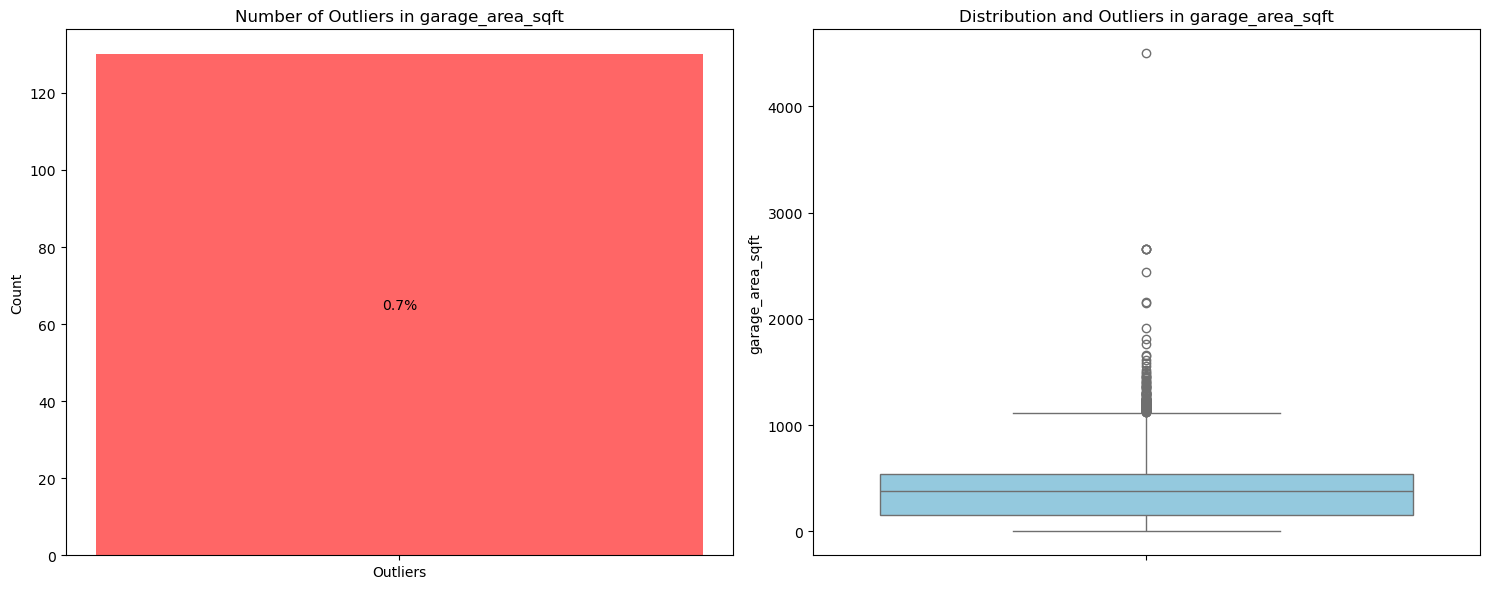


Summary for garage_area_sqft:
Total outliers: 130
Percentage of outliers: 0.73%
Total valid samples: 17905
IQR multiplier used: 1.5
--------------------------------------------------


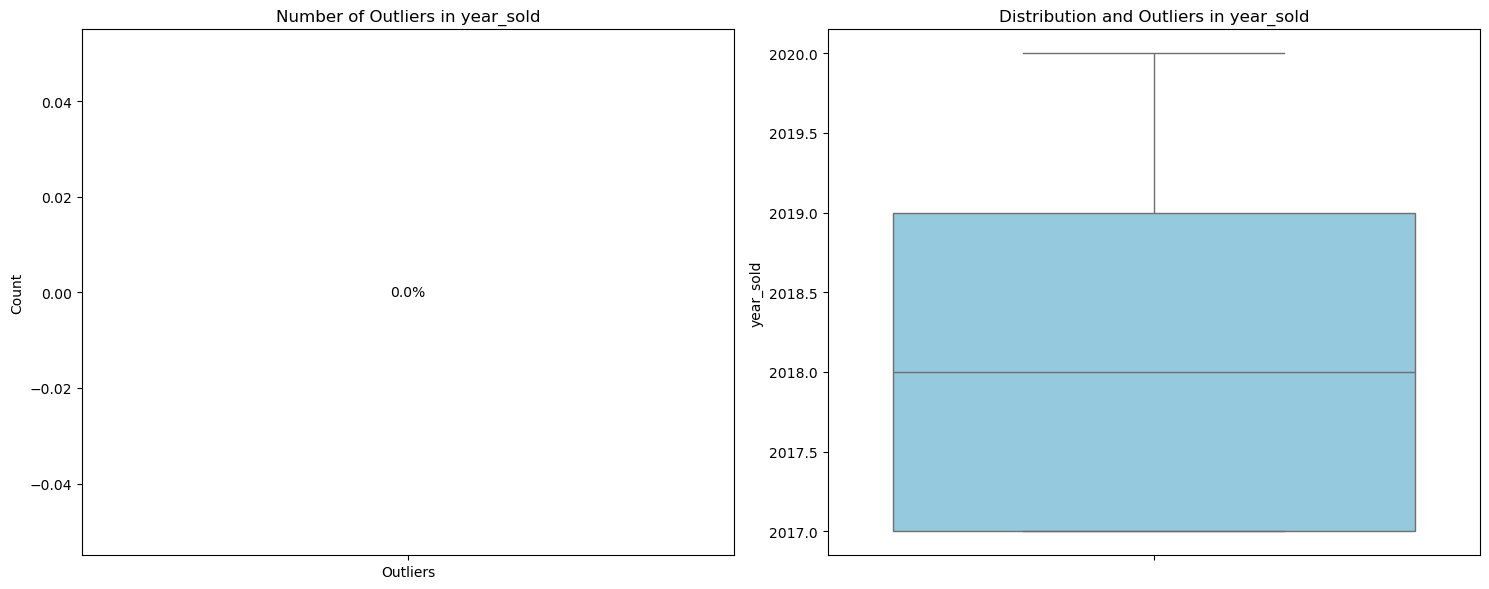


Summary for year_sold:
Total outliers: 0
Percentage of outliers: 0.00%
Total valid samples: 2966
IQR multiplier used: 1.5
--------------------------------------------------


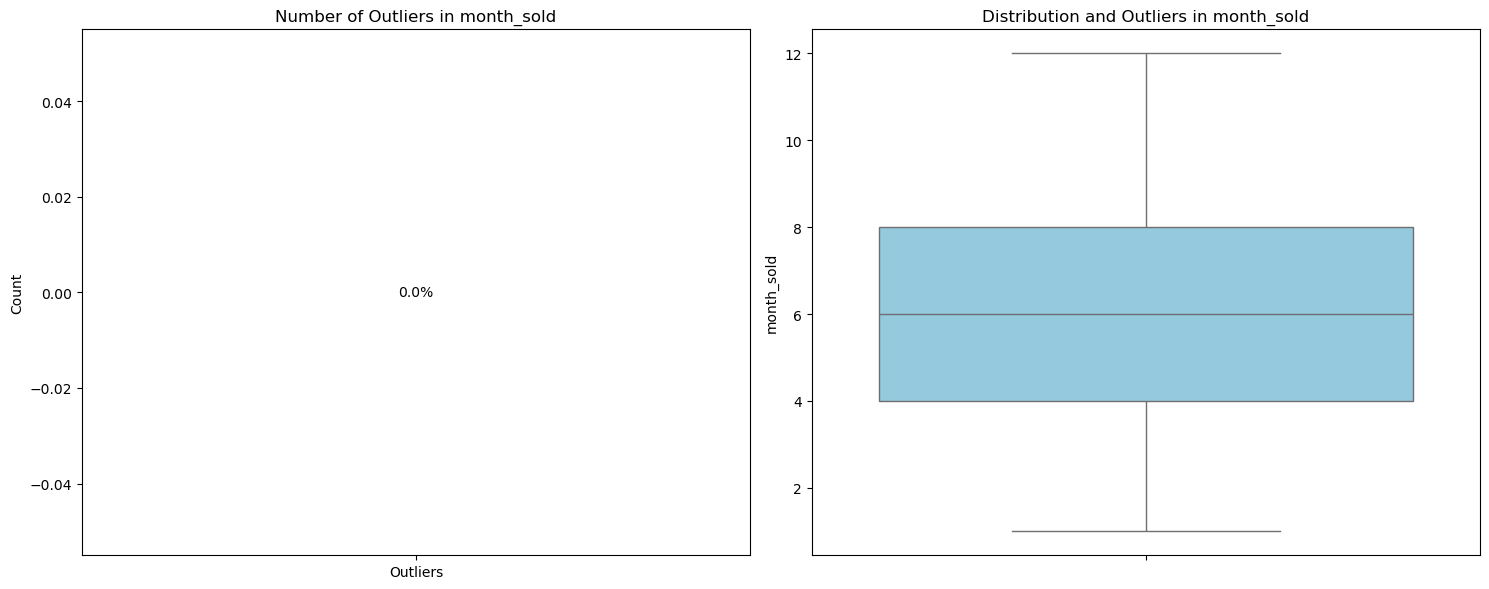


Summary for month_sold:
Total outliers: 0
Percentage of outliers: 0.00%
Total valid samples: 2966
IQR multiplier used: 1.5
--------------------------------------------------


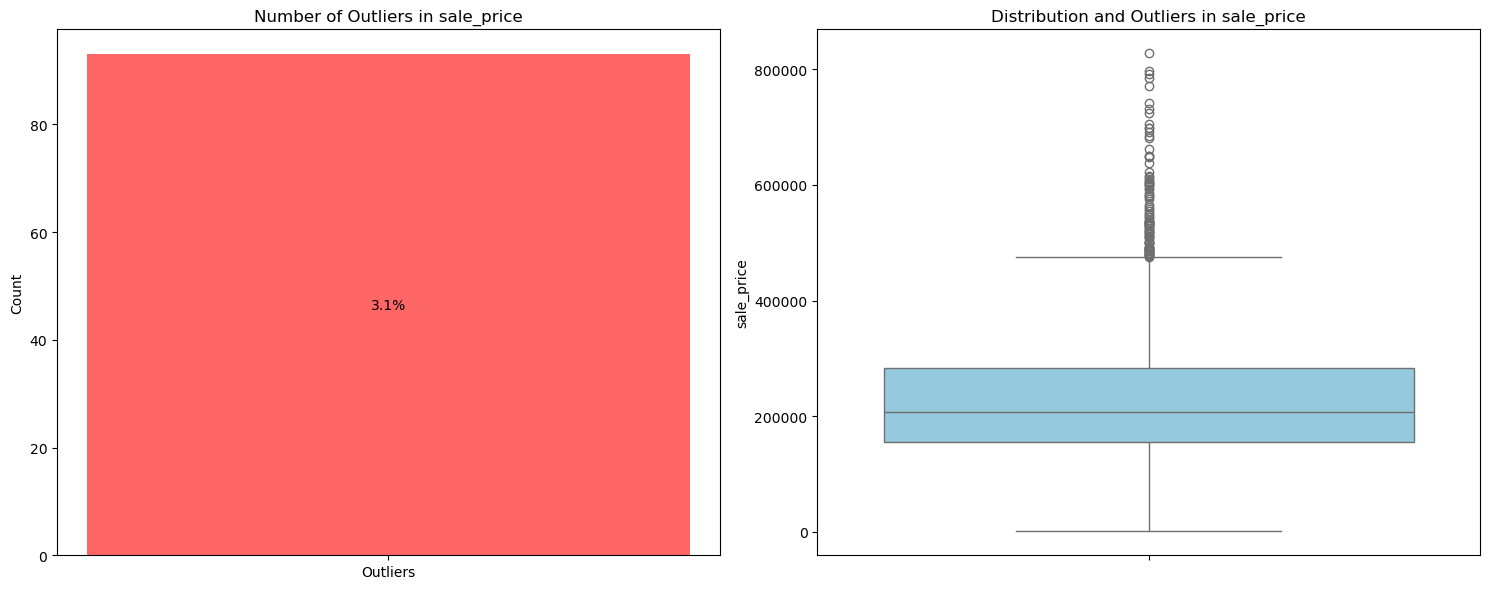


Summary for sale_price:
Total outliers: 93
Percentage of outliers: 3.14%
Total valid samples: 2966
IQR multiplier used: 1.5
--------------------------------------------------


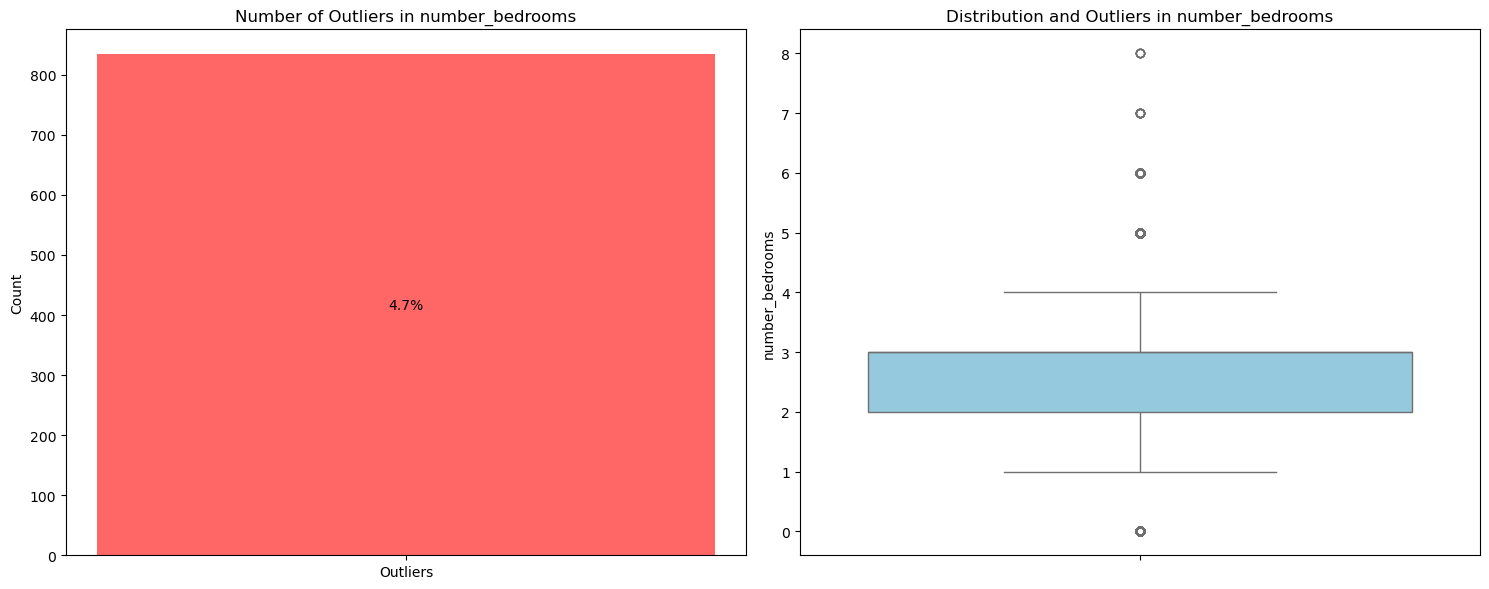


Summary for number_bedrooms:
Total outliers: 834
Percentage of outliers: 4.66%
Total valid samples: 17905
IQR multiplier used: 1.5
--------------------------------------------------


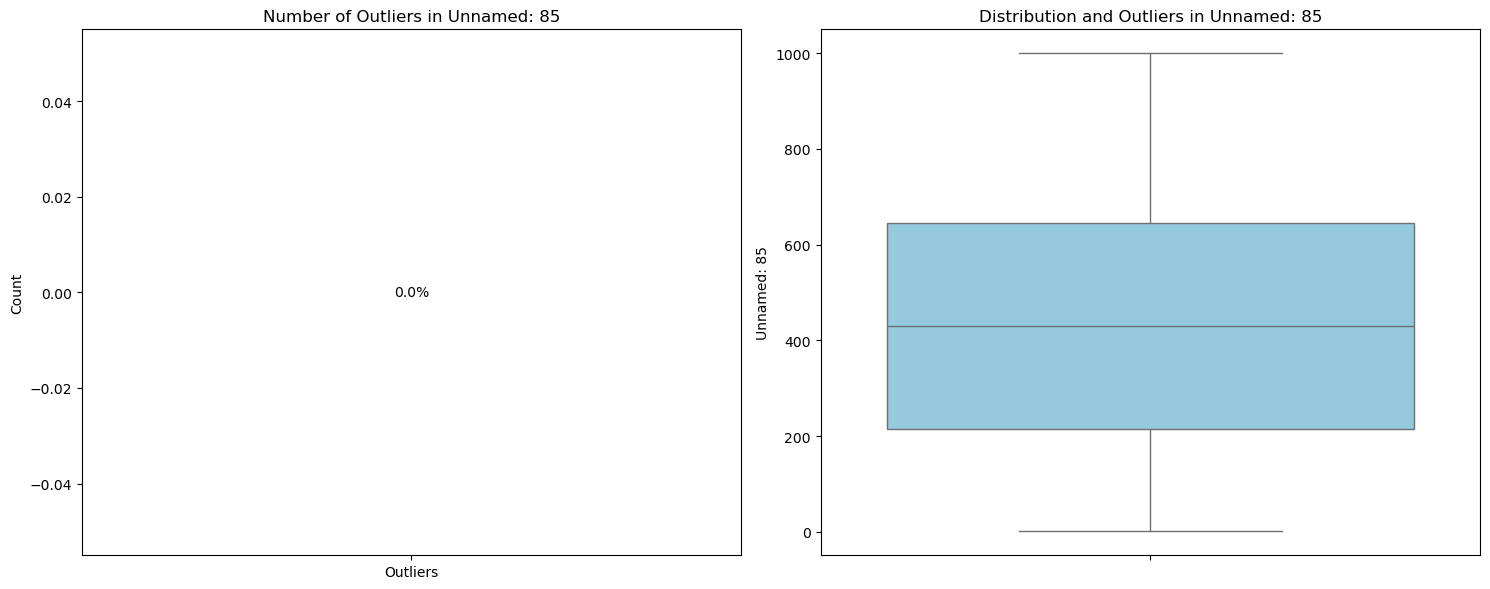


Summary for Unnamed: 85:
Total outliers: 0
Percentage of outliers: 0.00%
Total valid samples: 2580
IQR multiplier used: 1.5
--------------------------------------------------


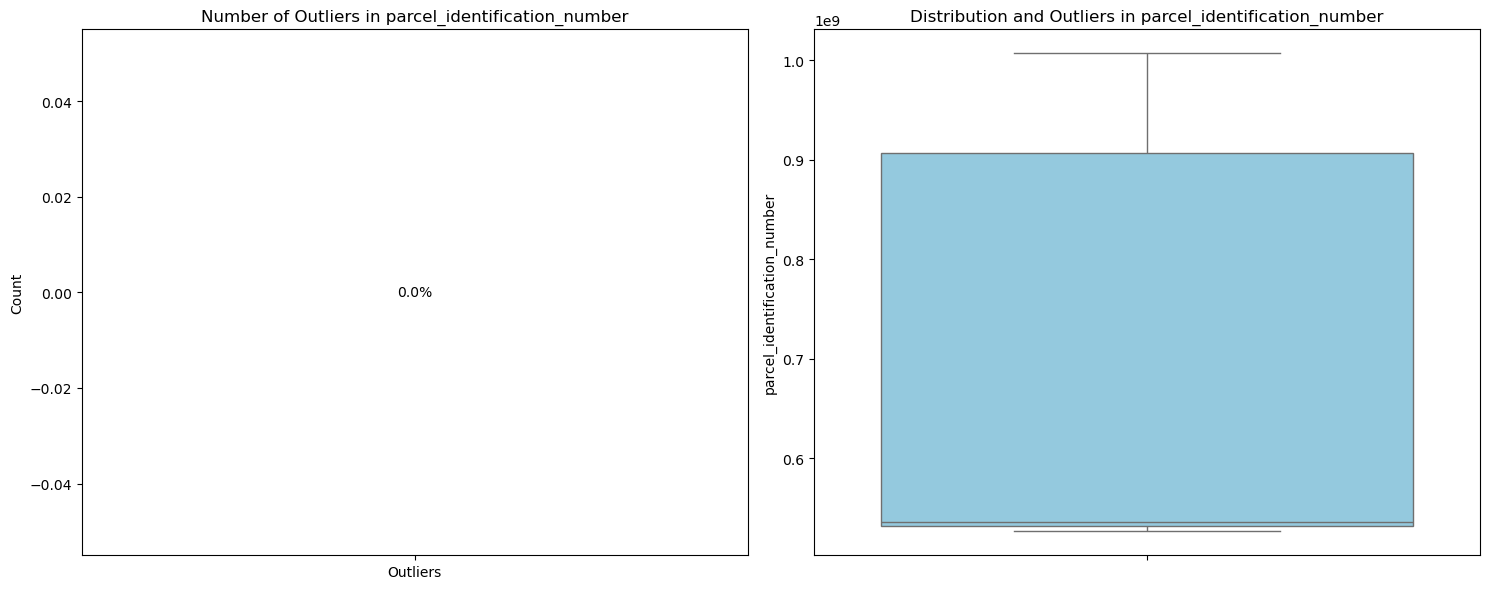


Summary for parcel_identification_number:
Total outliers: 0
Percentage of outliers: 0.00%
Total valid samples: 2580
IQR multiplier used: 1.5
--------------------------------------------------


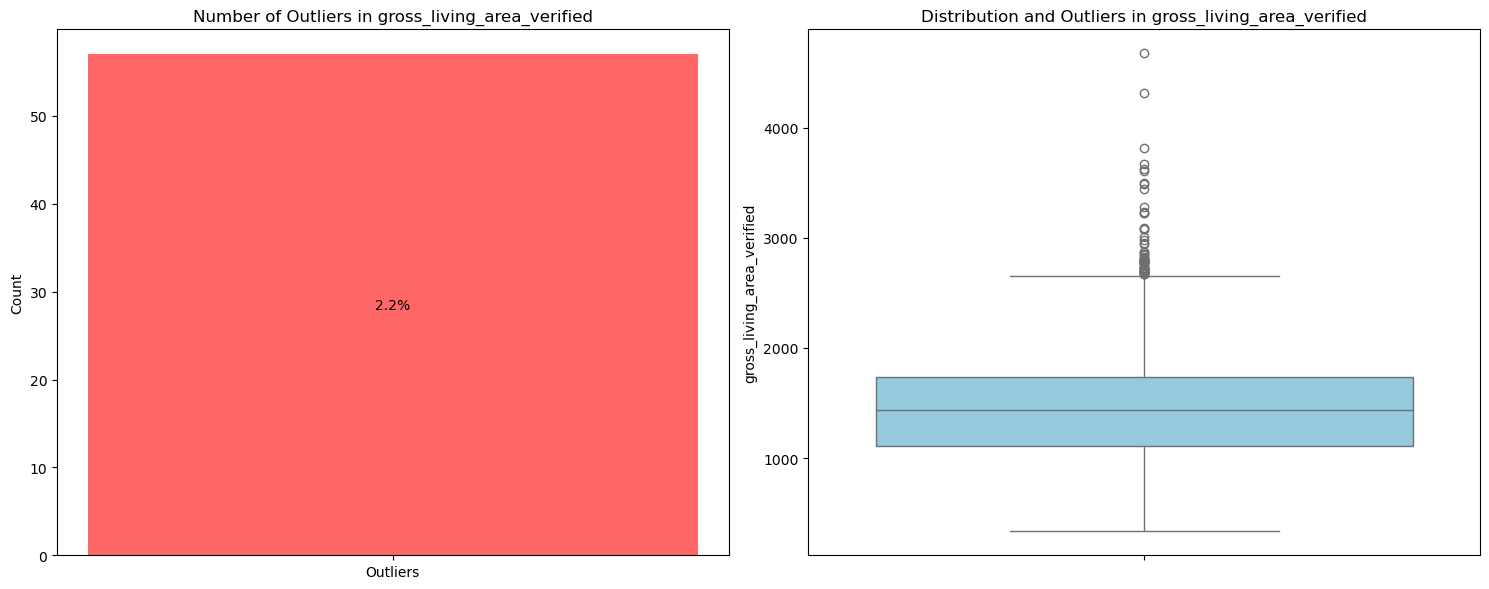


Summary for gross_living_area_verified:
Total outliers: 57
Percentage of outliers: 2.21%
Total valid samples: 2580
IQR multiplier used: 1.5
--------------------------------------------------


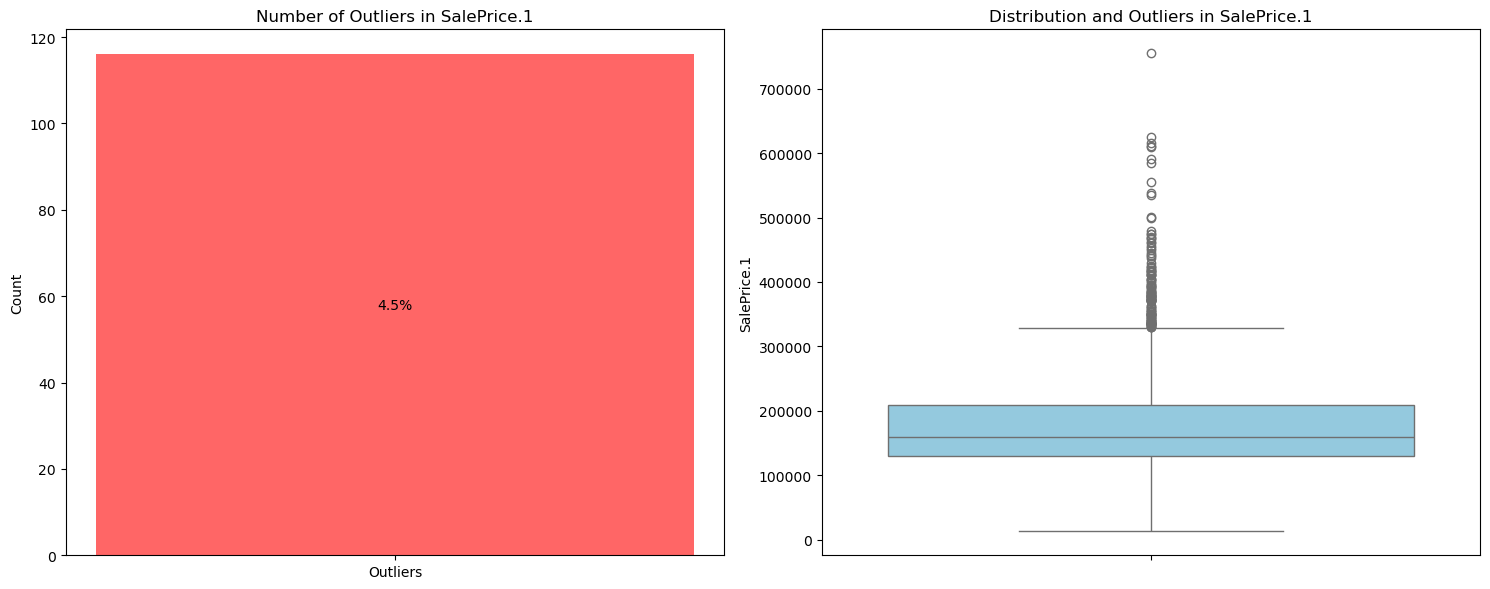


Summary for SalePrice.1:
Total outliers: 116
Percentage of outliers: 4.50%
Total valid samples: 2580
IQR multiplier used: 1.5
--------------------------------------------------


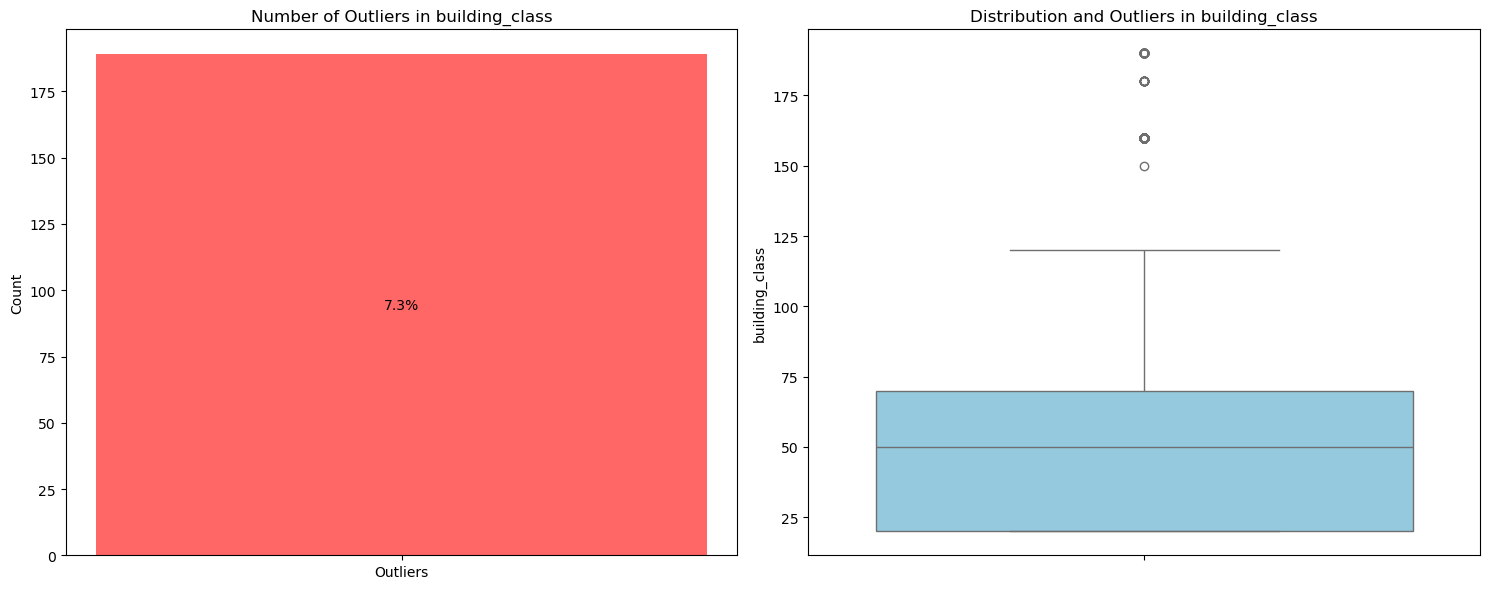


Summary for building_class:
Total outliers: 189
Percentage of outliers: 7.33%
Total valid samples: 2580
IQR multiplier used: 1.5
--------------------------------------------------


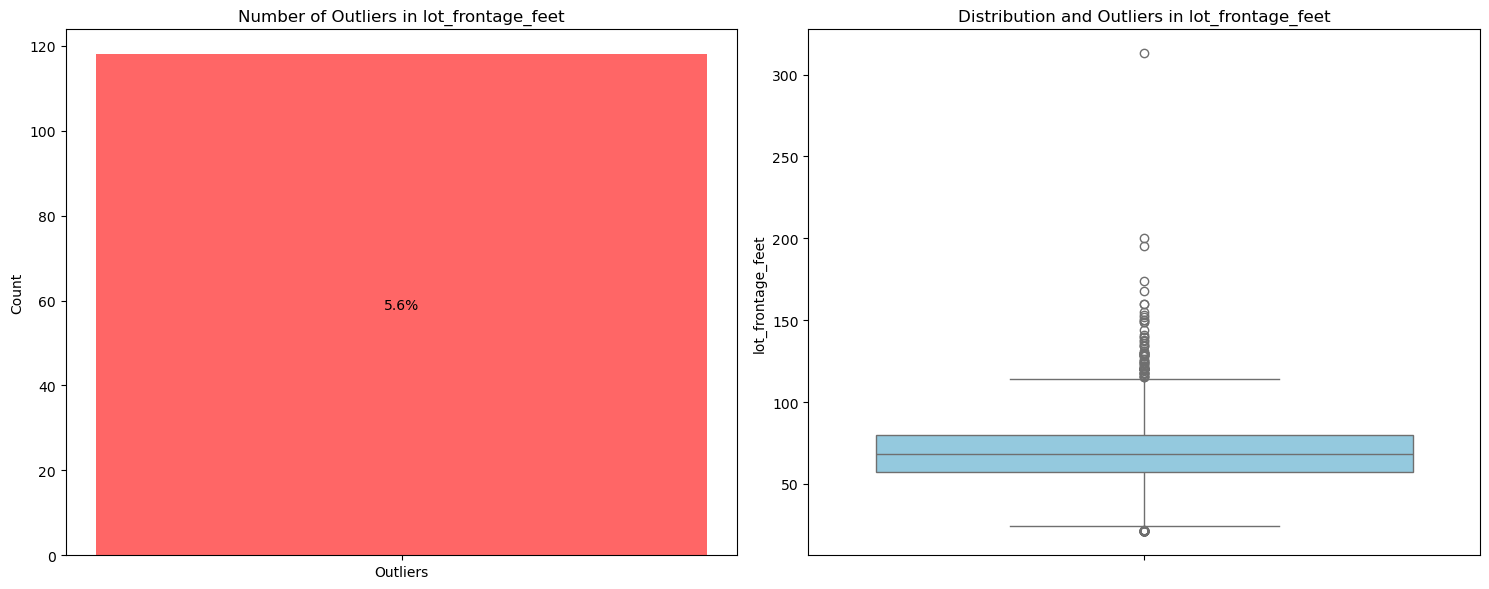


Summary for lot_frontage_feet:
Total outliers: 118
Percentage of outliers: 5.57%
Total valid samples: 2118
IQR multiplier used: 1.5
--------------------------------------------------


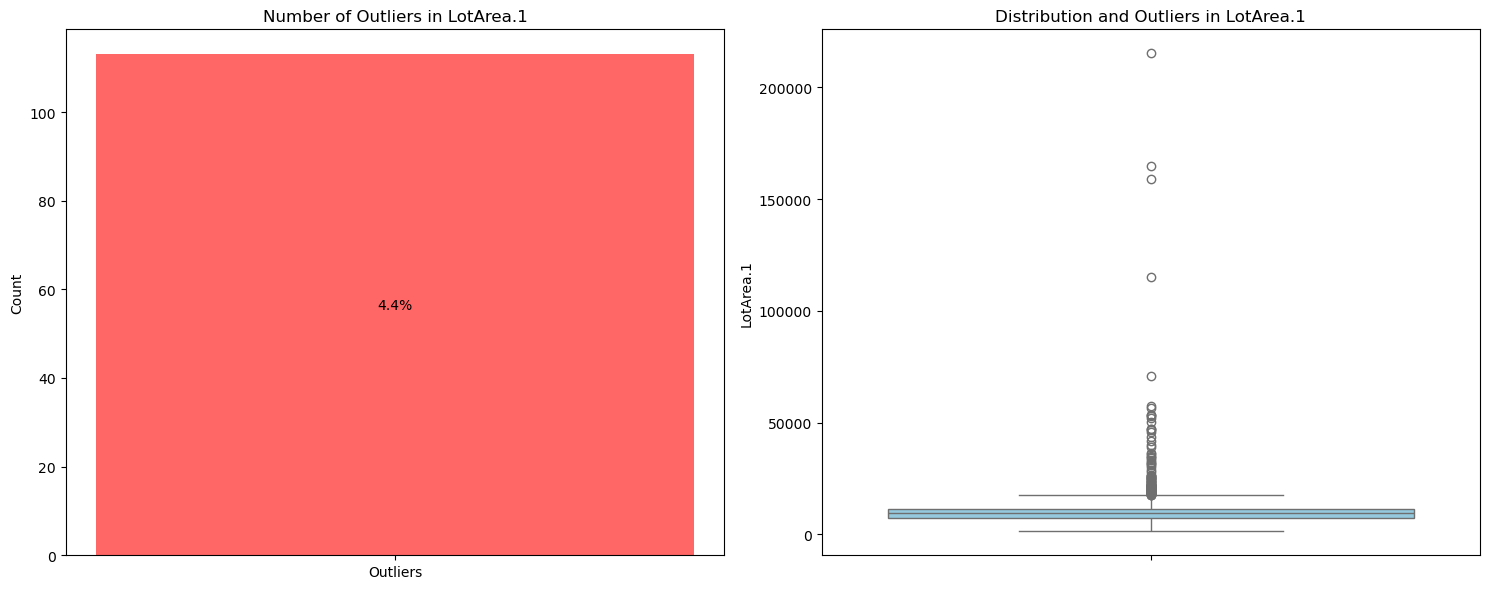


Summary for LotArea.1:
Total outliers: 113
Percentage of outliers: 4.38%
Total valid samples: 2580
IQR multiplier used: 1.5
--------------------------------------------------


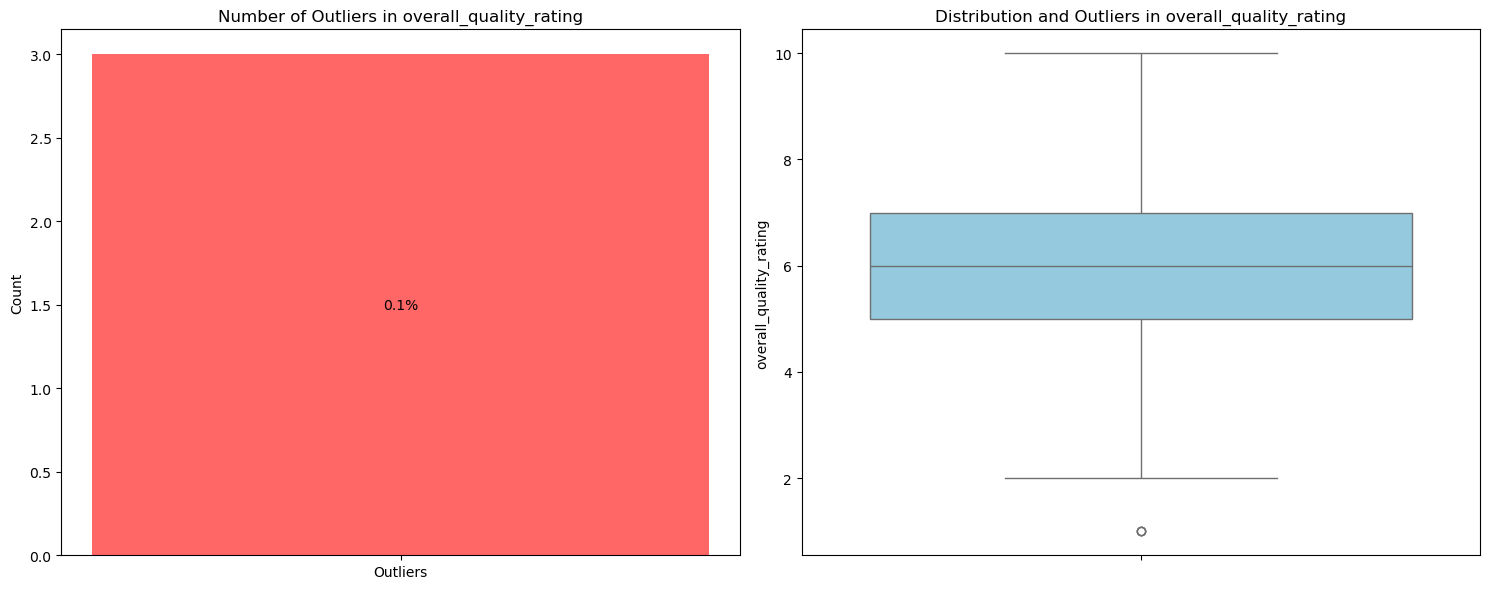


Summary for overall_quality_rating:
Total outliers: 3
Percentage of outliers: 0.12%
Total valid samples: 2580
IQR multiplier used: 1.5
--------------------------------------------------


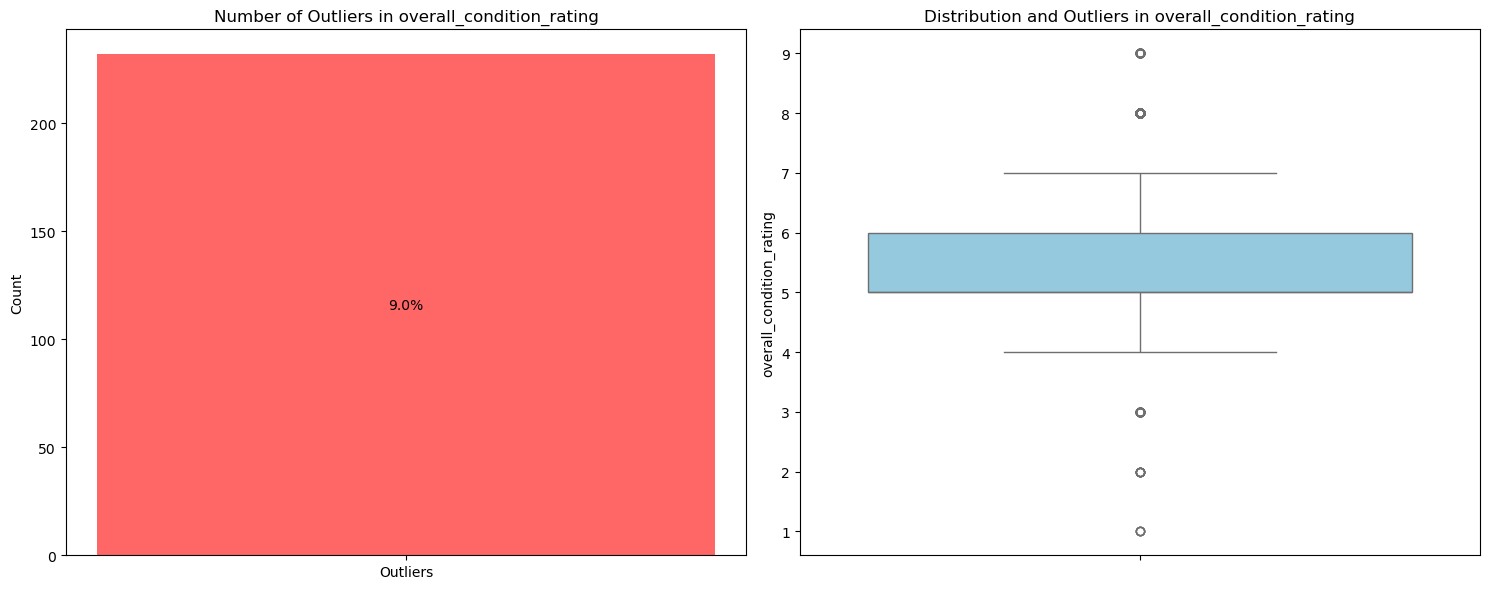


Summary for overall_condition_rating:
Total outliers: 232
Percentage of outliers: 8.99%
Total valid samples: 2580
IQR multiplier used: 1.5
--------------------------------------------------


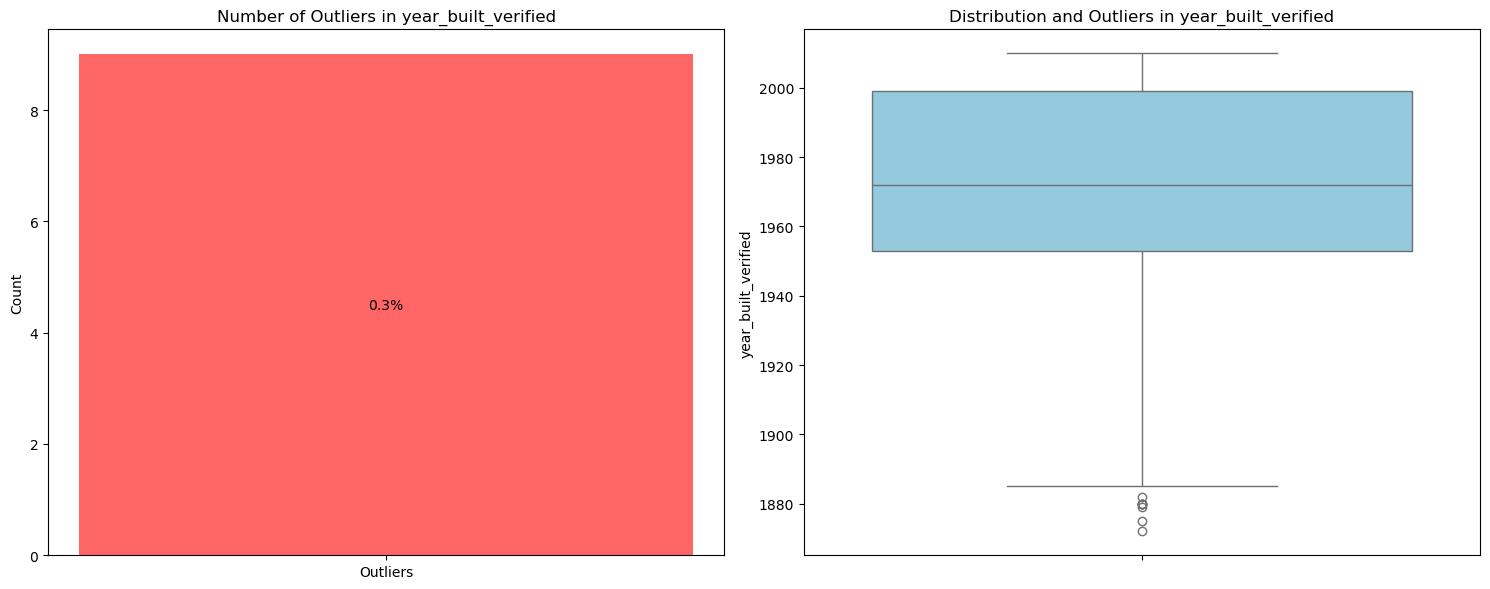


Summary for year_built_verified:
Total outliers: 9
Percentage of outliers: 0.35%
Total valid samples: 2580
IQR multiplier used: 1.5
--------------------------------------------------


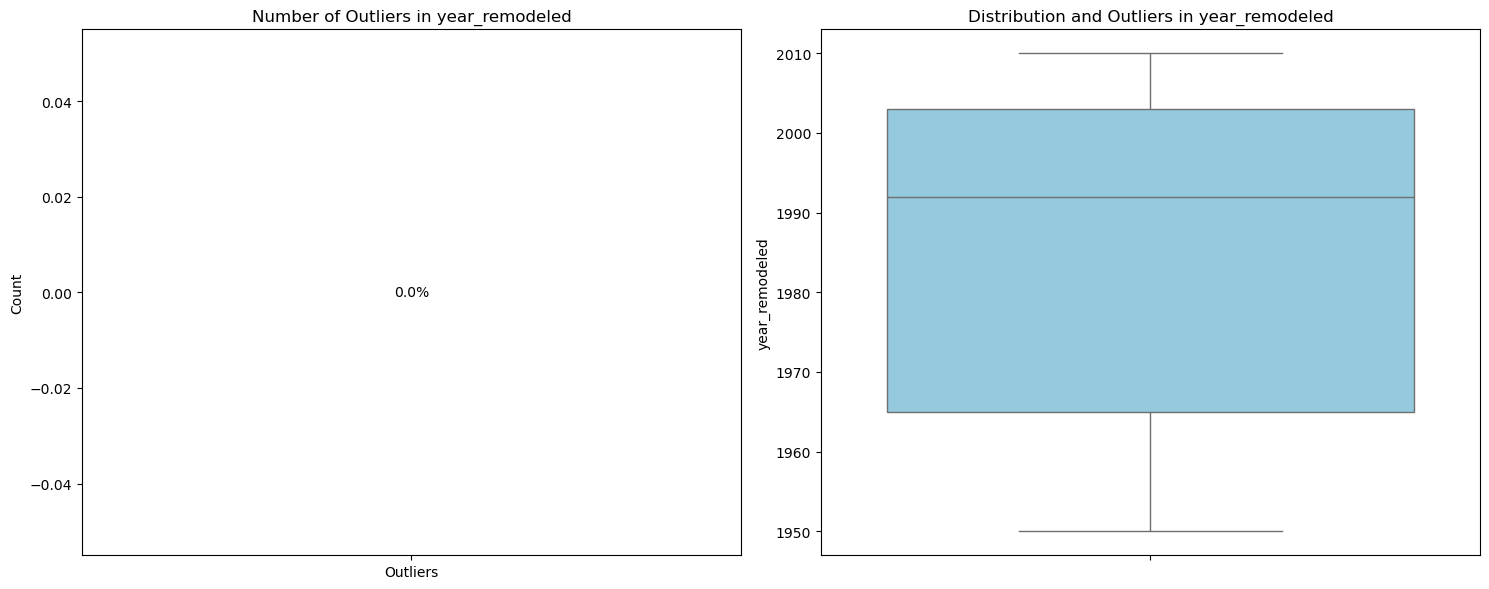


Summary for year_remodeled:
Total outliers: 0
Percentage of outliers: 0.00%
Total valid samples: 2580
IQR multiplier used: 1.5
--------------------------------------------------


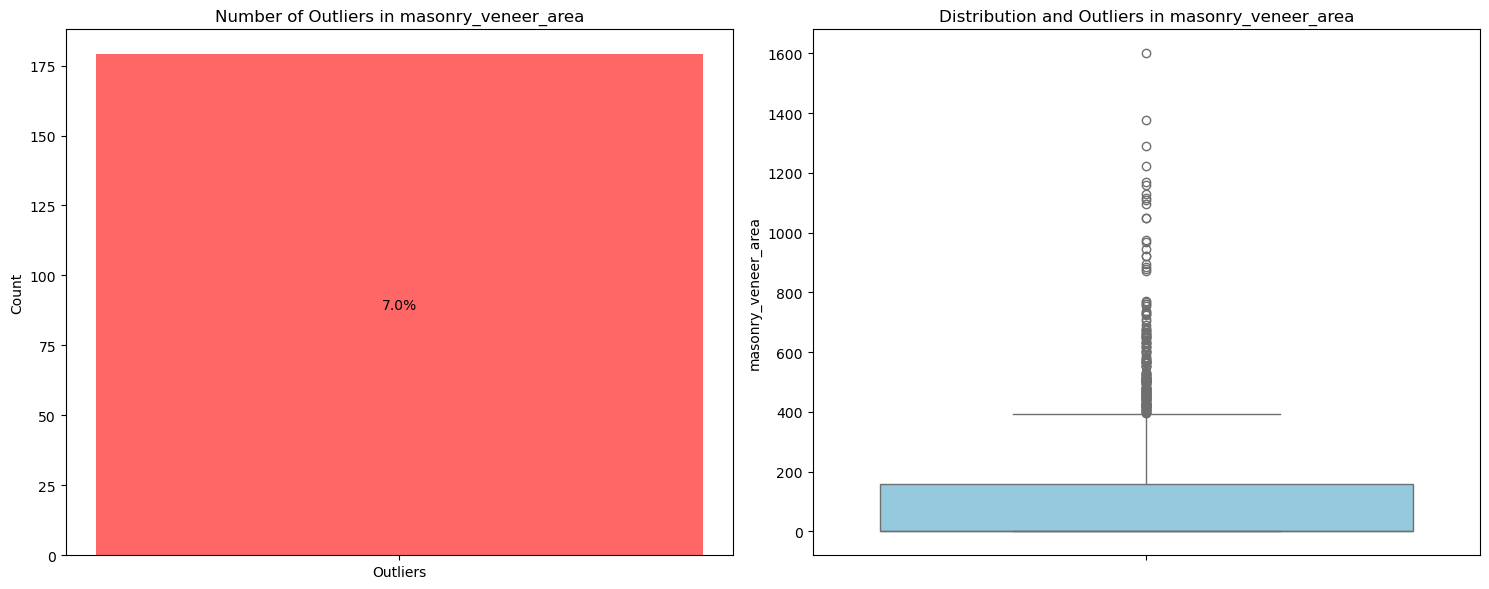


Summary for masonry_veneer_area:
Total outliers: 179
Percentage of outliers: 6.98%
Total valid samples: 2566
IQR multiplier used: 1.5
--------------------------------------------------


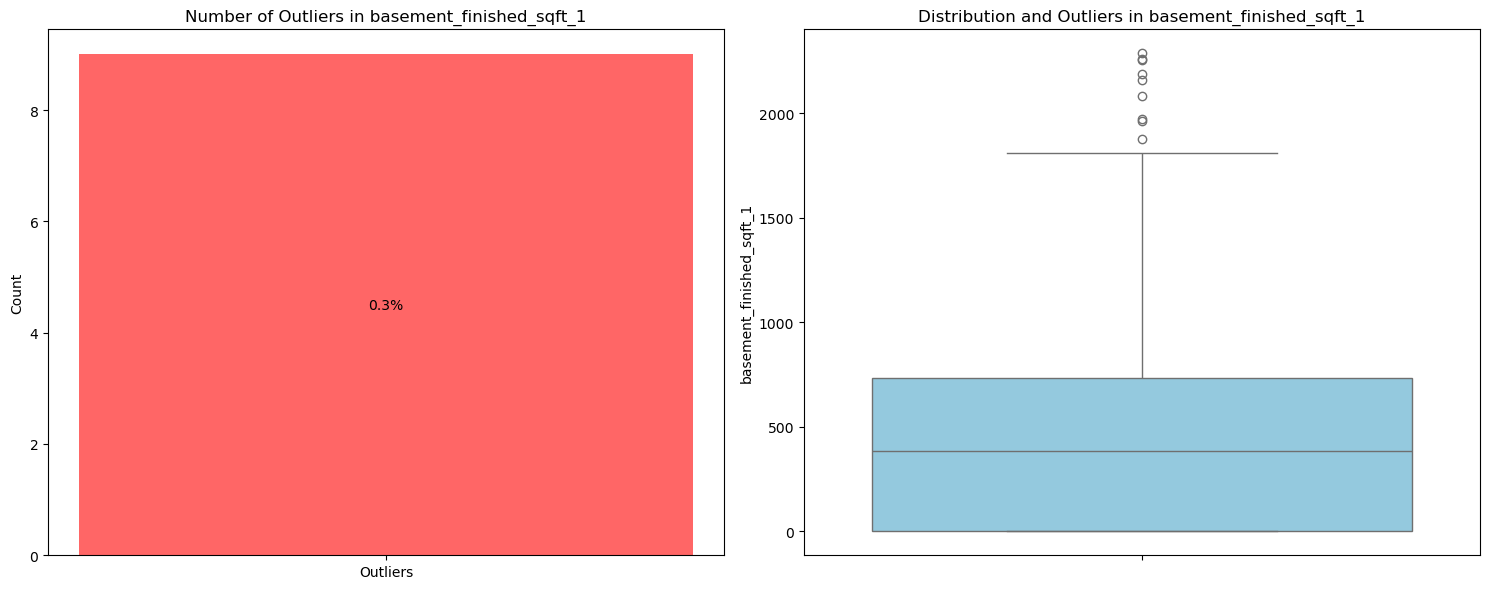


Summary for basement_finished_sqft_1:
Total outliers: 9
Percentage of outliers: 0.35%
Total valid samples: 2579
IQR multiplier used: 1.5
--------------------------------------------------


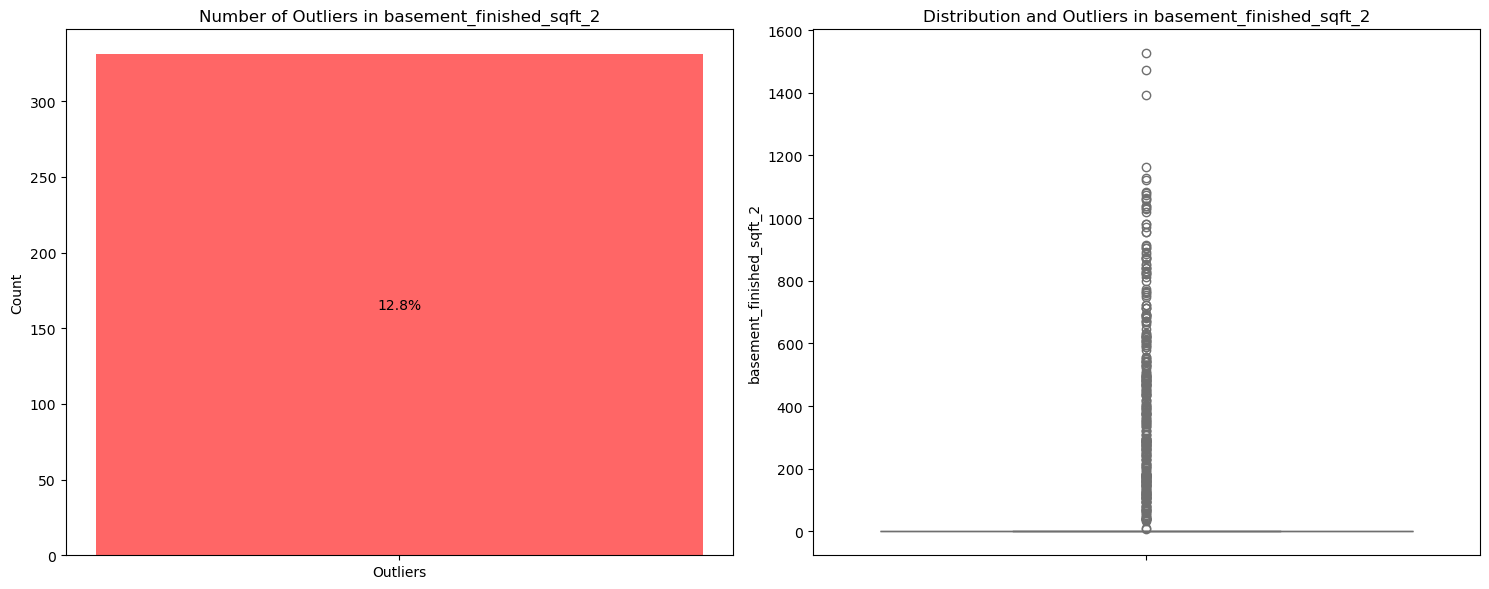


Summary for basement_finished_sqft_2:
Total outliers: 331
Percentage of outliers: 12.83%
Total valid samples: 2579
IQR multiplier used: 1.0
Note: Using reduced IQR multiplier (1.0) due to sparse data
--------------------------------------------------


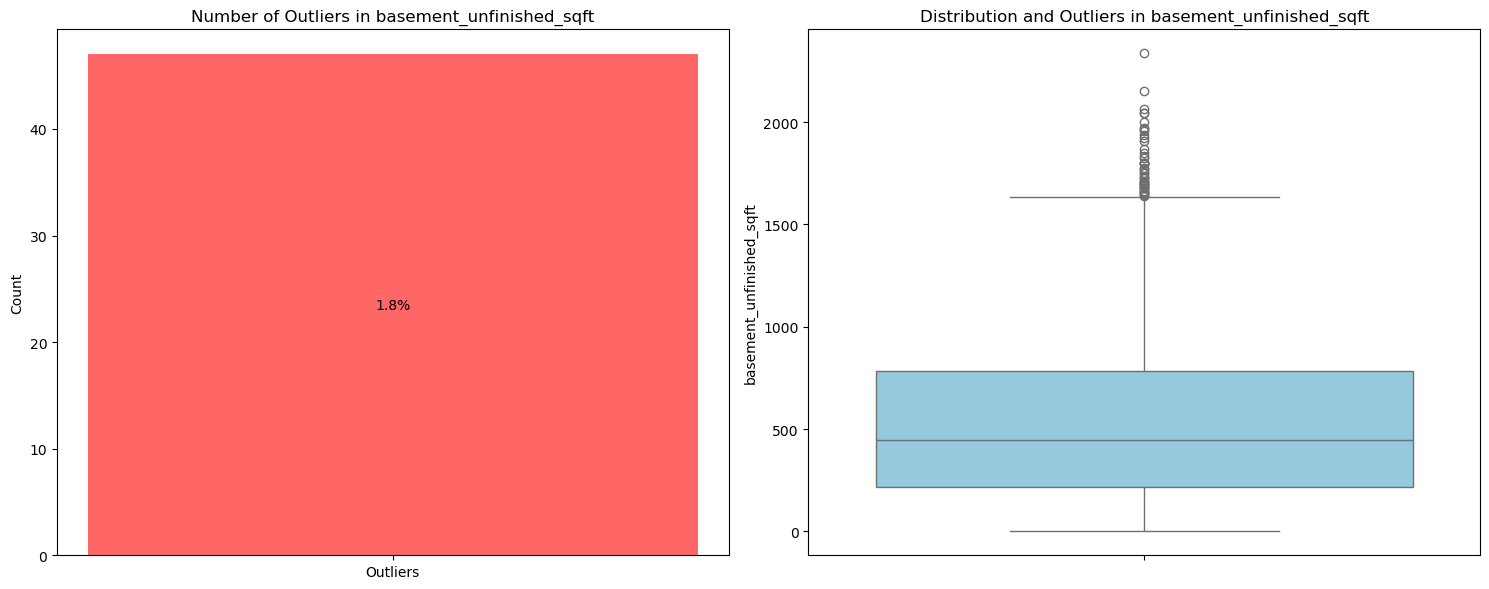


Summary for basement_unfinished_sqft:
Total outliers: 47
Percentage of outliers: 1.82%
Total valid samples: 2579
IQR multiplier used: 1.5
--------------------------------------------------


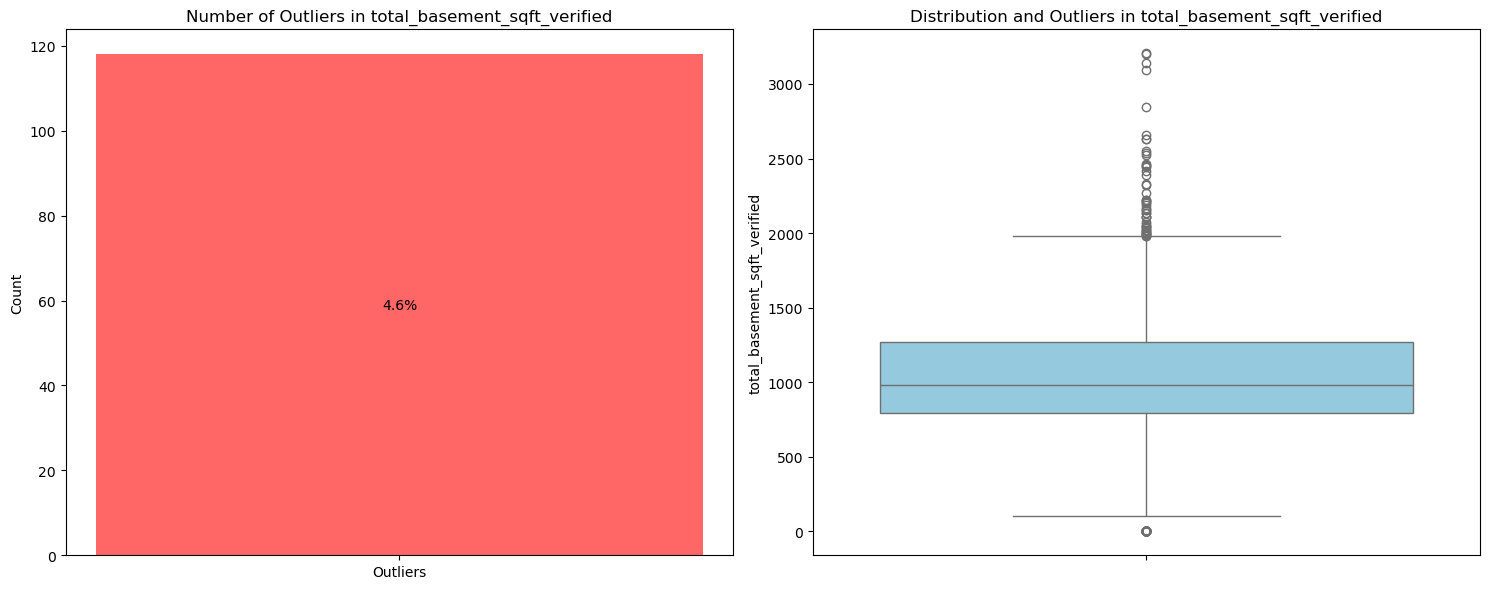


Summary for total_basement_sqft_verified:
Total outliers: 118
Percentage of outliers: 4.58%
Total valid samples: 2579
IQR multiplier used: 1.5
--------------------------------------------------


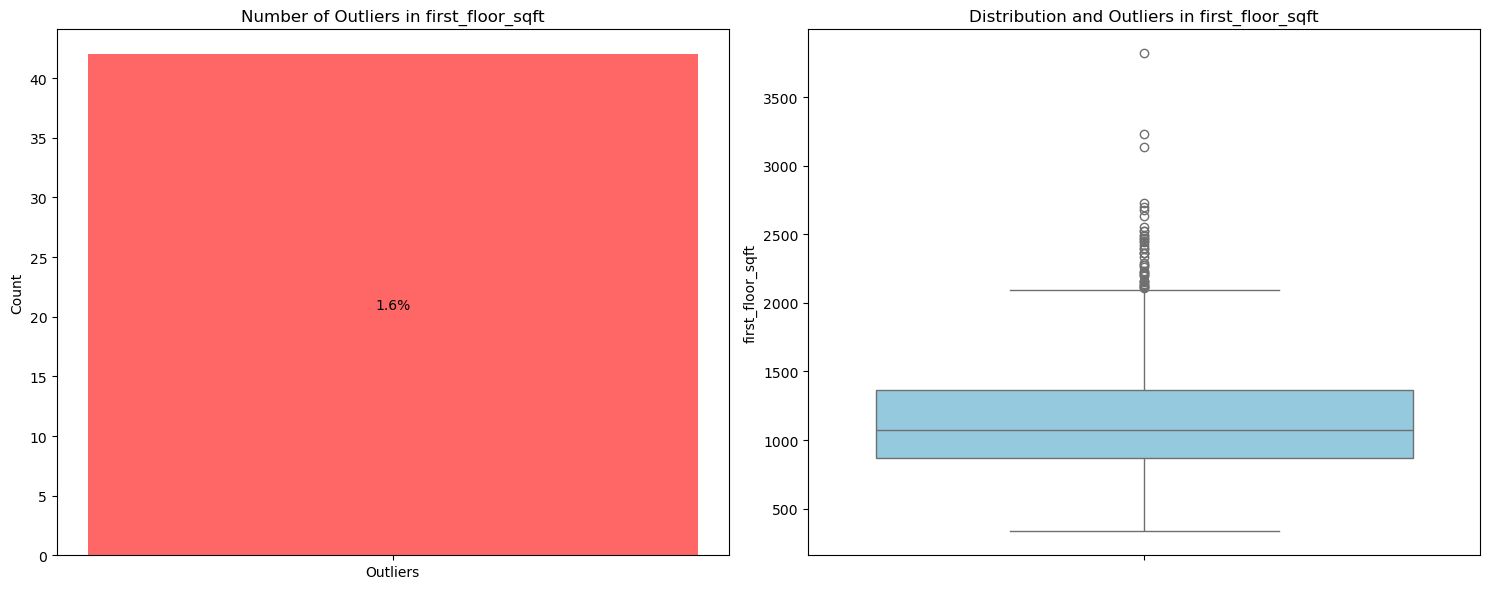


Summary for first_floor_sqft:
Total outliers: 42
Percentage of outliers: 1.63%
Total valid samples: 2580
IQR multiplier used: 1.5
--------------------------------------------------


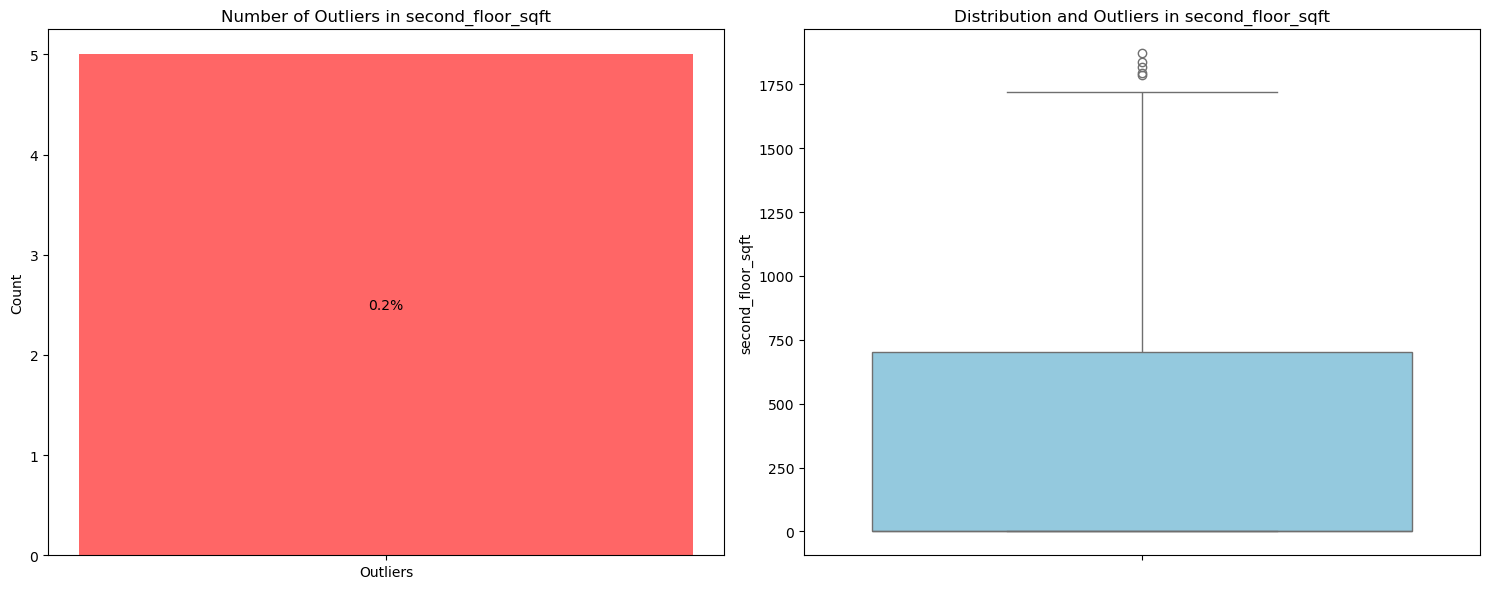


Summary for second_floor_sqft:
Total outliers: 5
Percentage of outliers: 0.19%
Total valid samples: 2580
IQR multiplier used: 1.5
--------------------------------------------------


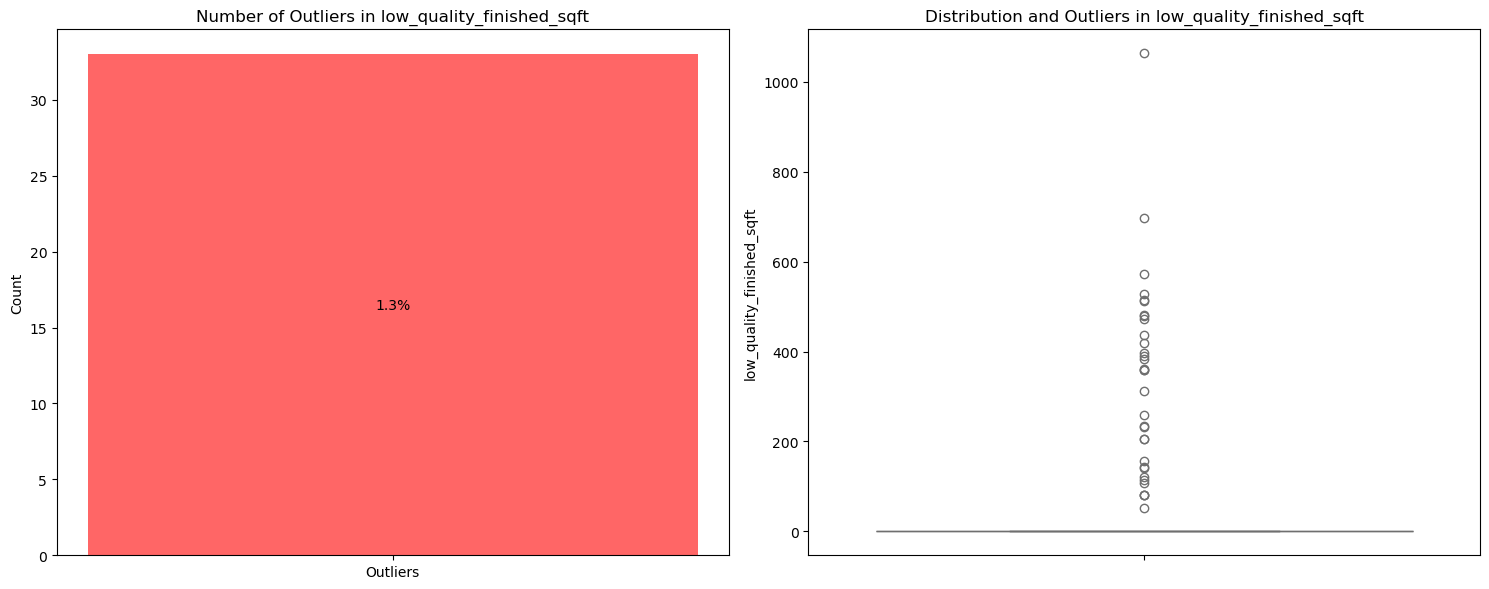


Summary for low_quality_finished_sqft:
Total outliers: 33
Percentage of outliers: 1.28%
Total valid samples: 2580
IQR multiplier used: 1.5
--------------------------------------------------


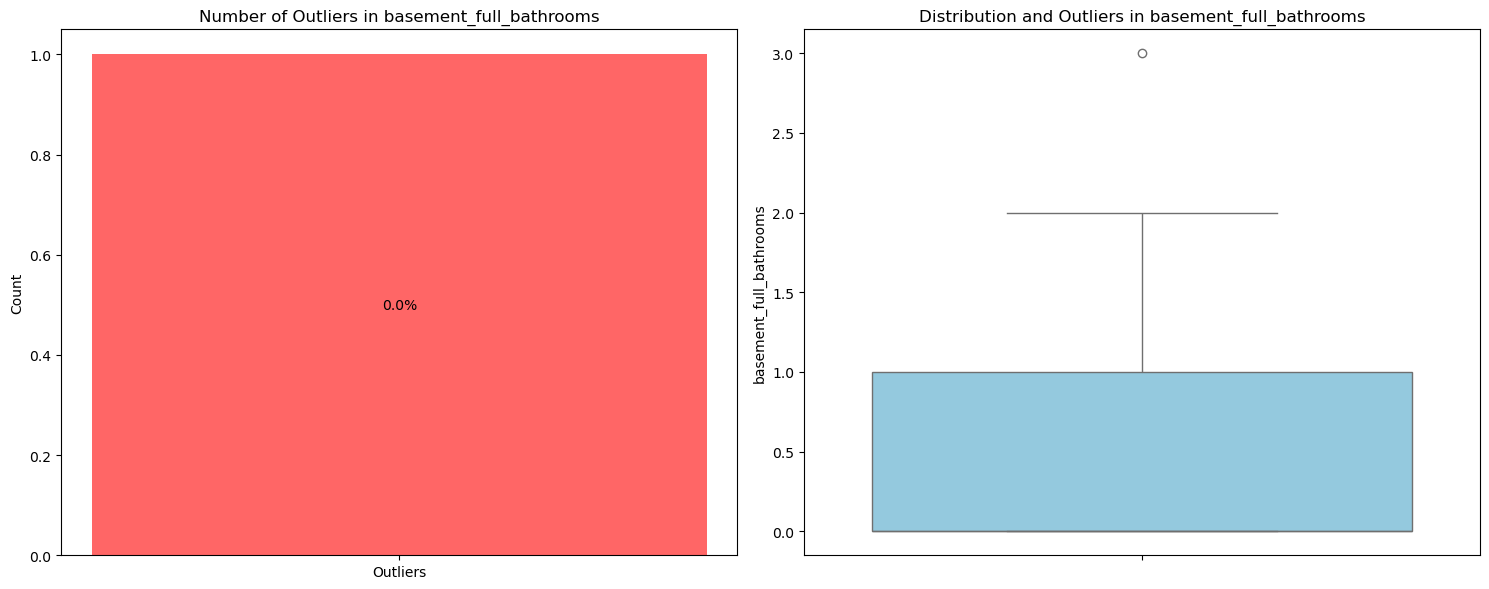


Summary for basement_full_bathrooms:
Total outliers: 1
Percentage of outliers: 0.04%
Total valid samples: 2578
IQR multiplier used: 1.5
--------------------------------------------------


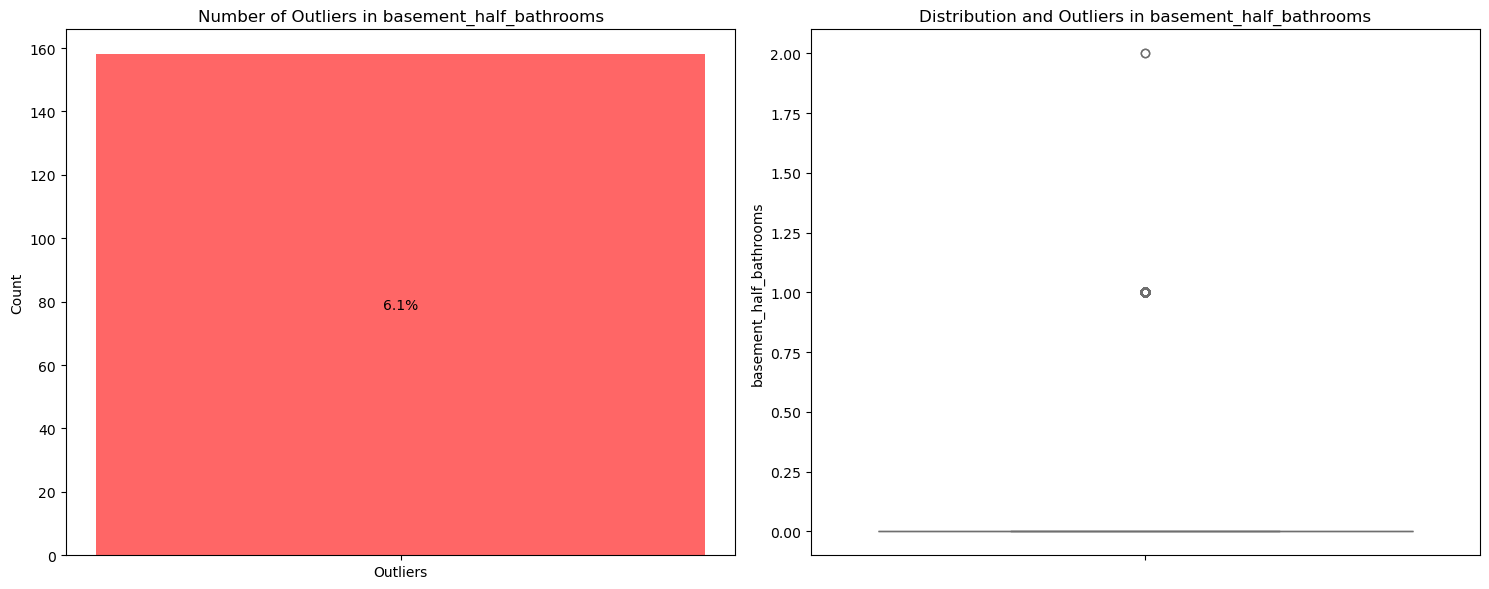


Summary for basement_half_bathrooms:
Total outliers: 158
Percentage of outliers: 6.13%
Total valid samples: 2578
IQR multiplier used: 1.5
--------------------------------------------------


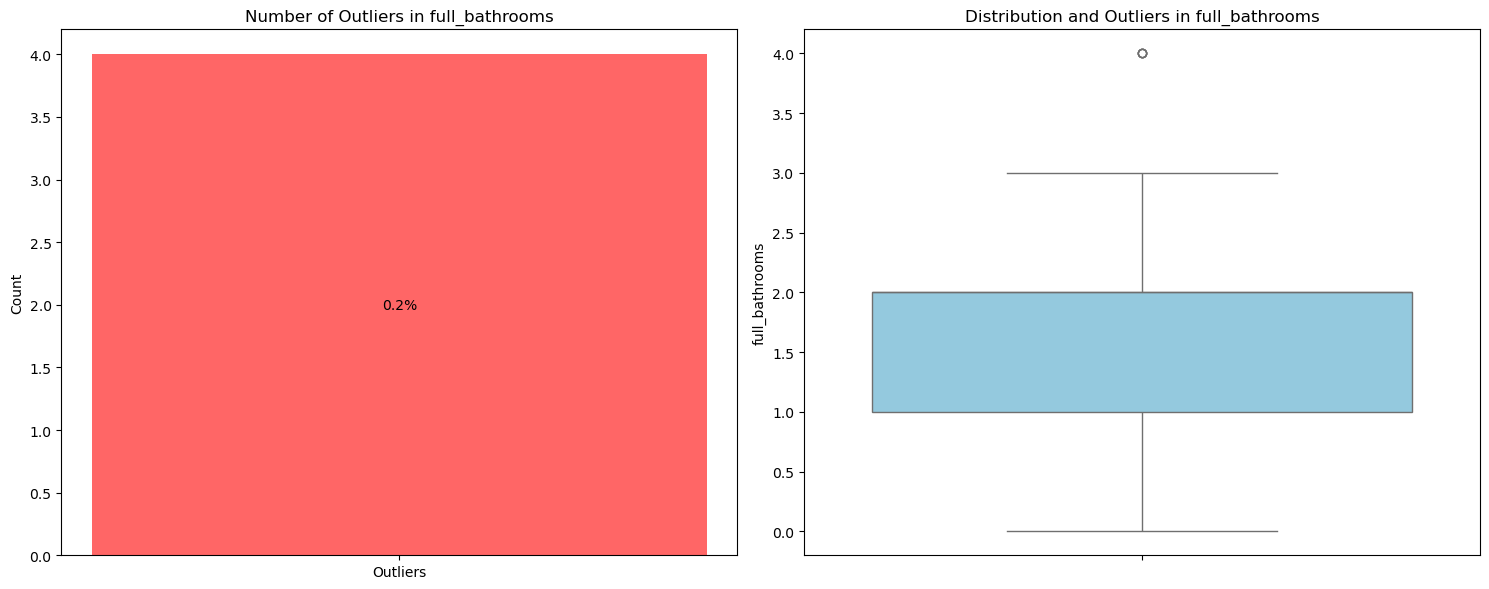


Summary for full_bathrooms:
Total outliers: 4
Percentage of outliers: 0.16%
Total valid samples: 2580
IQR multiplier used: 1.5
--------------------------------------------------


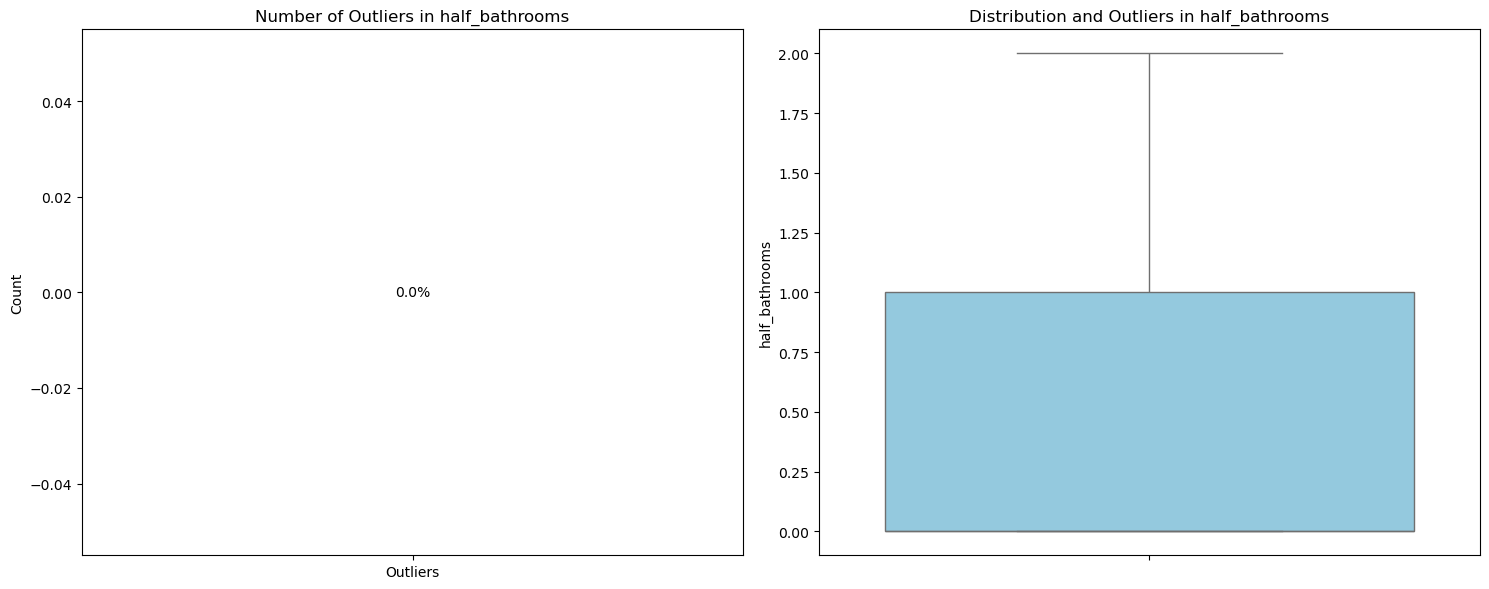


Summary for half_bathrooms:
Total outliers: 0
Percentage of outliers: 0.00%
Total valid samples: 2580
IQR multiplier used: 1.5
--------------------------------------------------


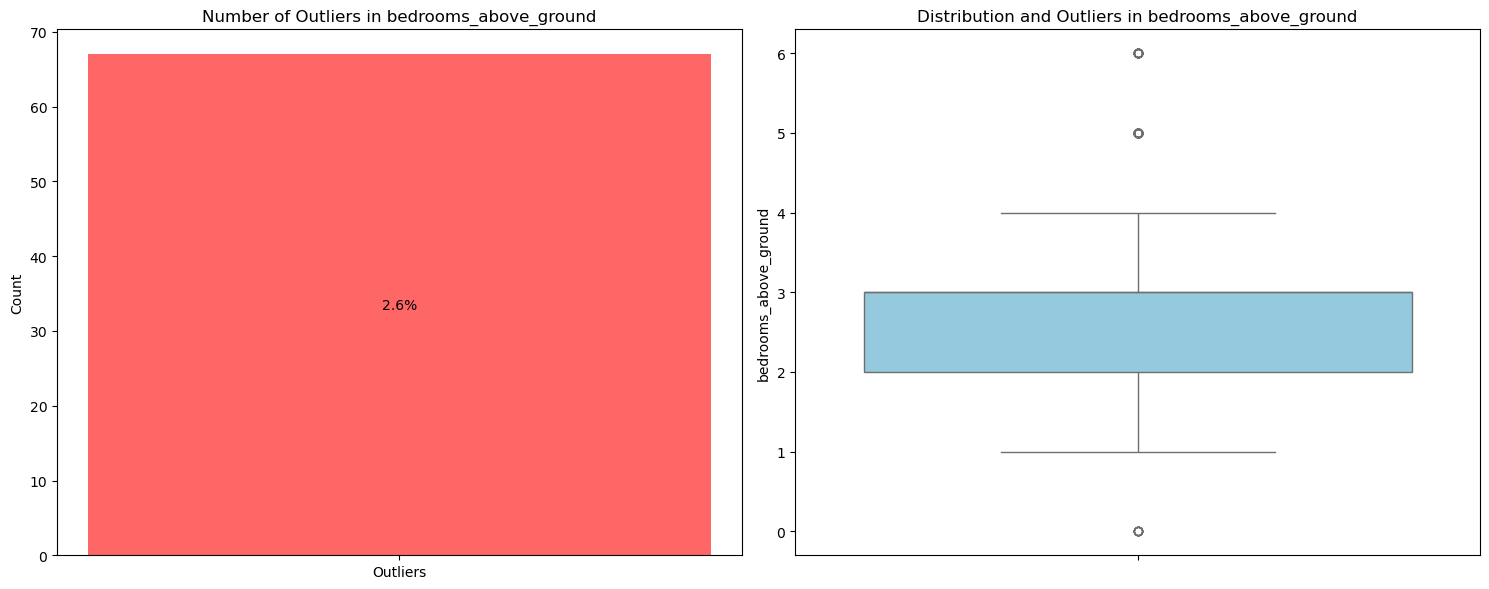


Summary for bedrooms_above_ground:
Total outliers: 67
Percentage of outliers: 2.60%
Total valid samples: 2580
IQR multiplier used: 1.5
--------------------------------------------------


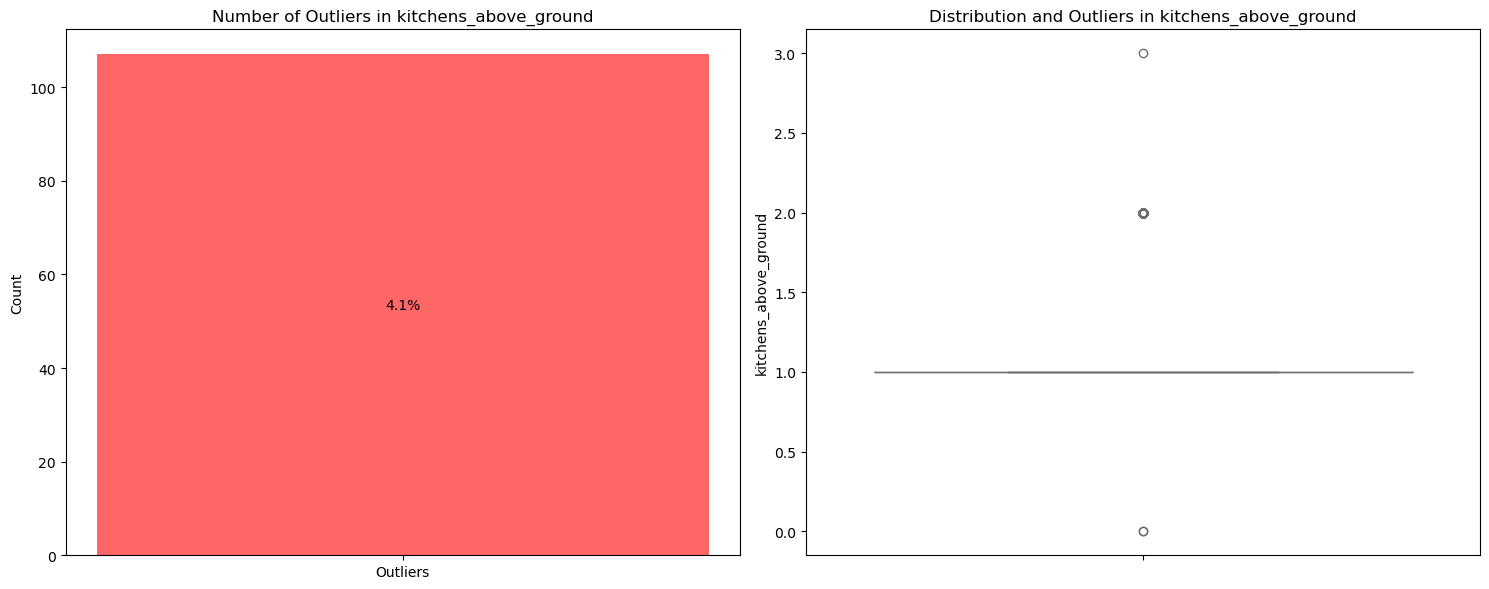


Summary for kitchens_above_ground:
Total outliers: 107
Percentage of outliers: 4.15%
Total valid samples: 2580
IQR multiplier used: 1.5
--------------------------------------------------


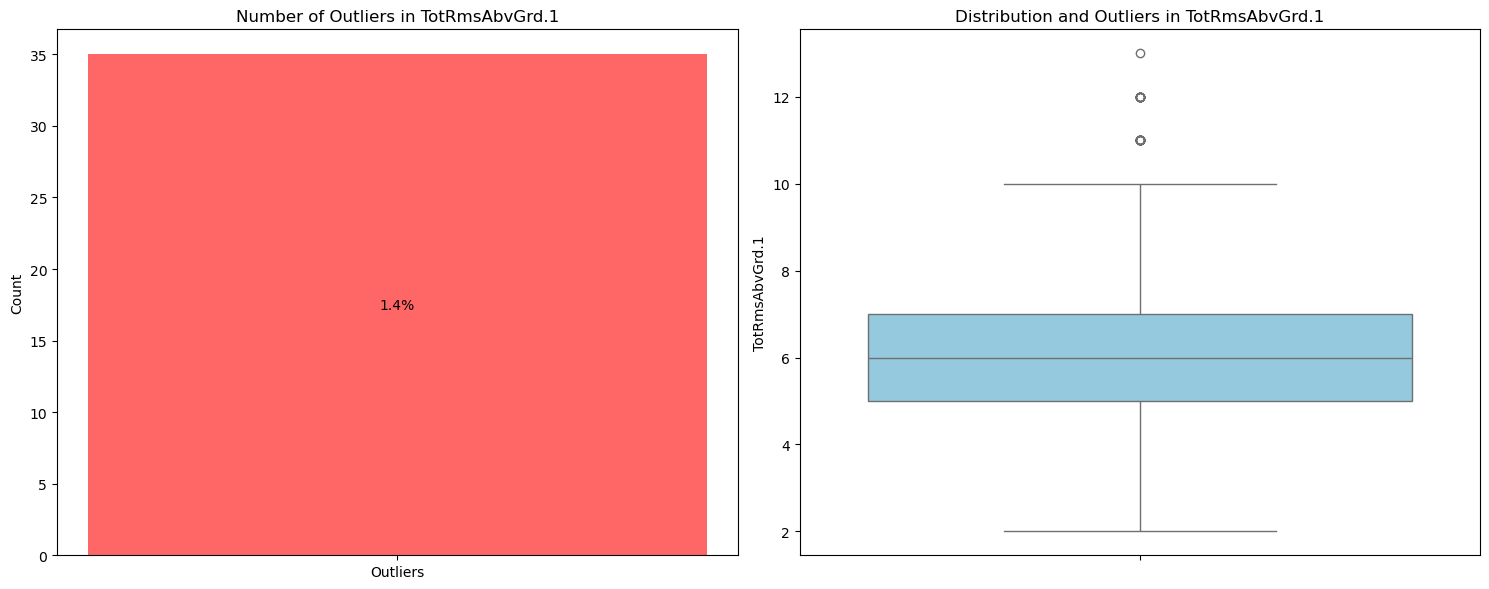


Summary for TotRmsAbvGrd.1:
Total outliers: 35
Percentage of outliers: 1.36%
Total valid samples: 2580
IQR multiplier used: 1.5
--------------------------------------------------


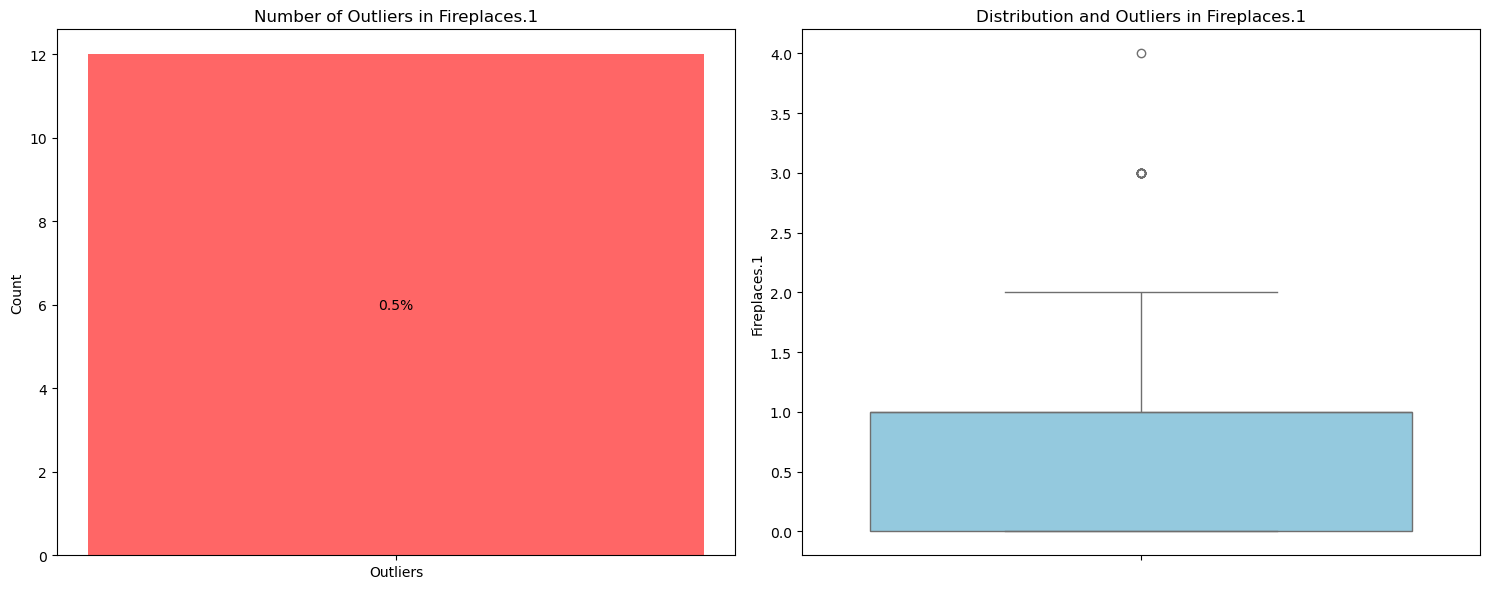


Summary for Fireplaces.1:
Total outliers: 12
Percentage of outliers: 0.47%
Total valid samples: 2580
IQR multiplier used: 1.5
--------------------------------------------------


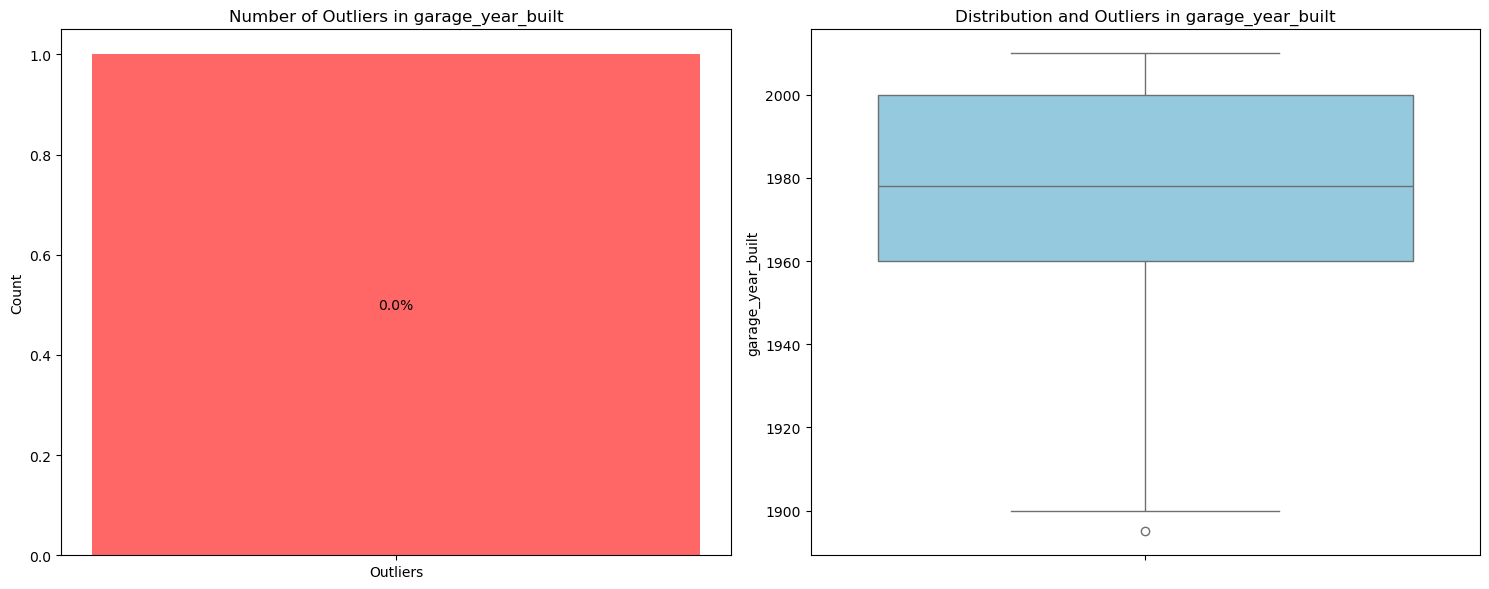


Summary for garage_year_built:
Total outliers: 1
Percentage of outliers: 0.04%
Total valid samples: 2451
IQR multiplier used: 1.5
--------------------------------------------------


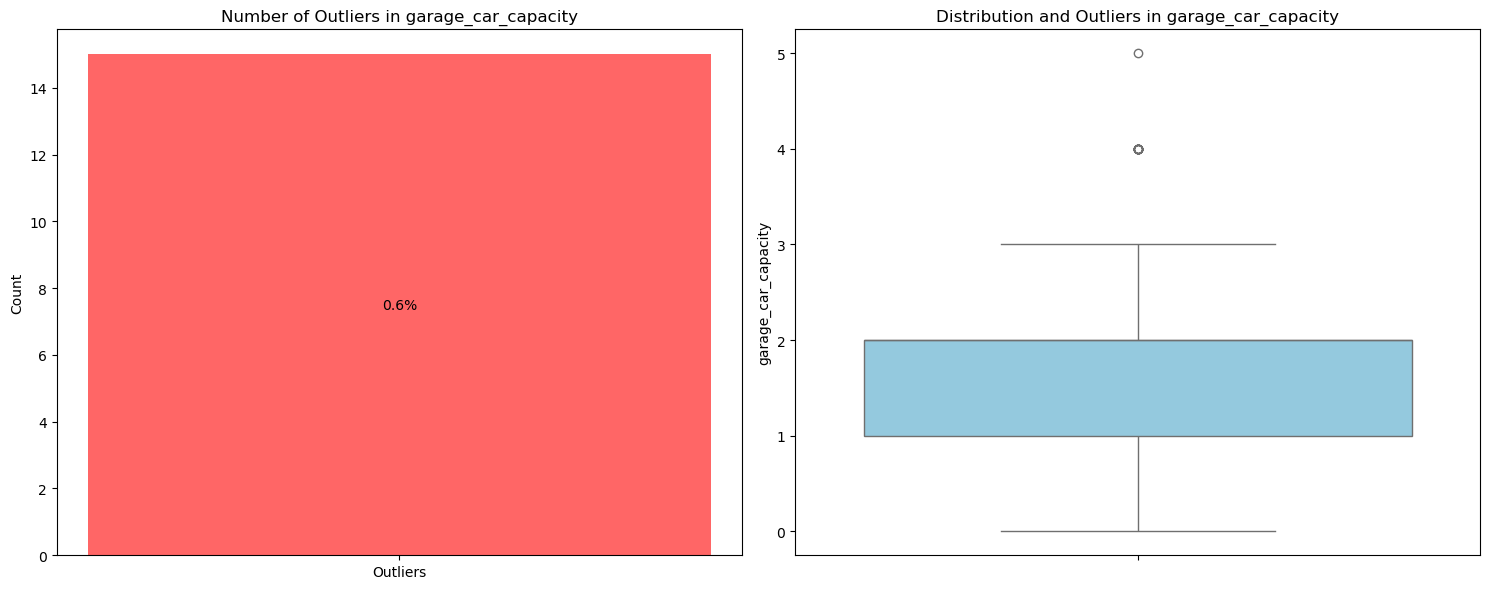


Summary for garage_car_capacity:
Total outliers: 15
Percentage of outliers: 0.58%
Total valid samples: 2579
IQR multiplier used: 1.5
--------------------------------------------------


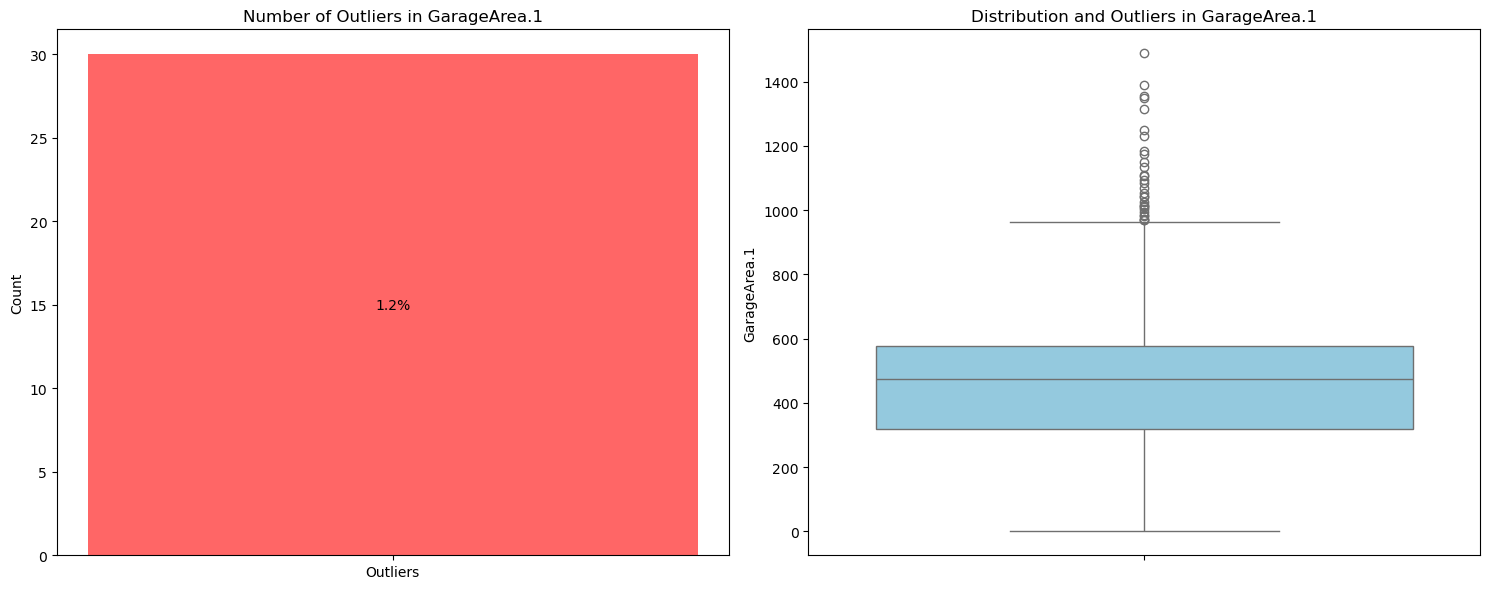


Summary for GarageArea.1:
Total outliers: 30
Percentage of outliers: 1.16%
Total valid samples: 2579
IQR multiplier used: 1.5
--------------------------------------------------


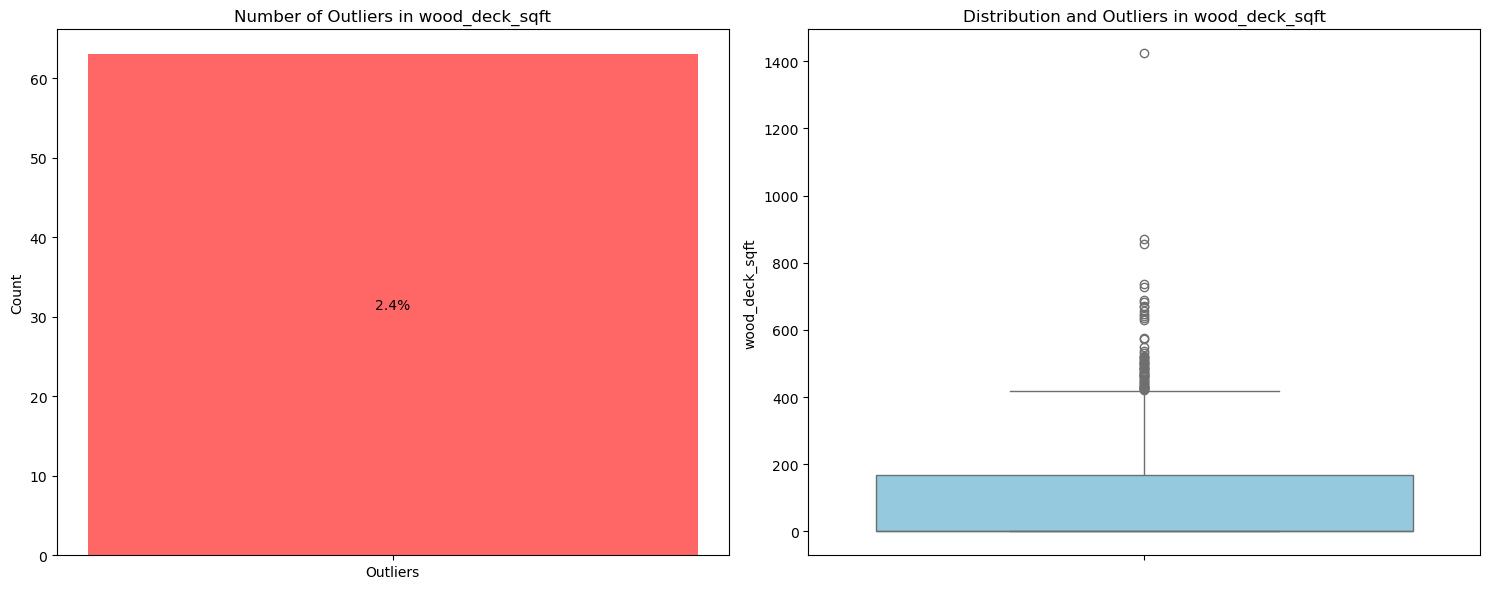


Summary for wood_deck_sqft:
Total outliers: 63
Percentage of outliers: 2.44%
Total valid samples: 2580
IQR multiplier used: 1.5
--------------------------------------------------


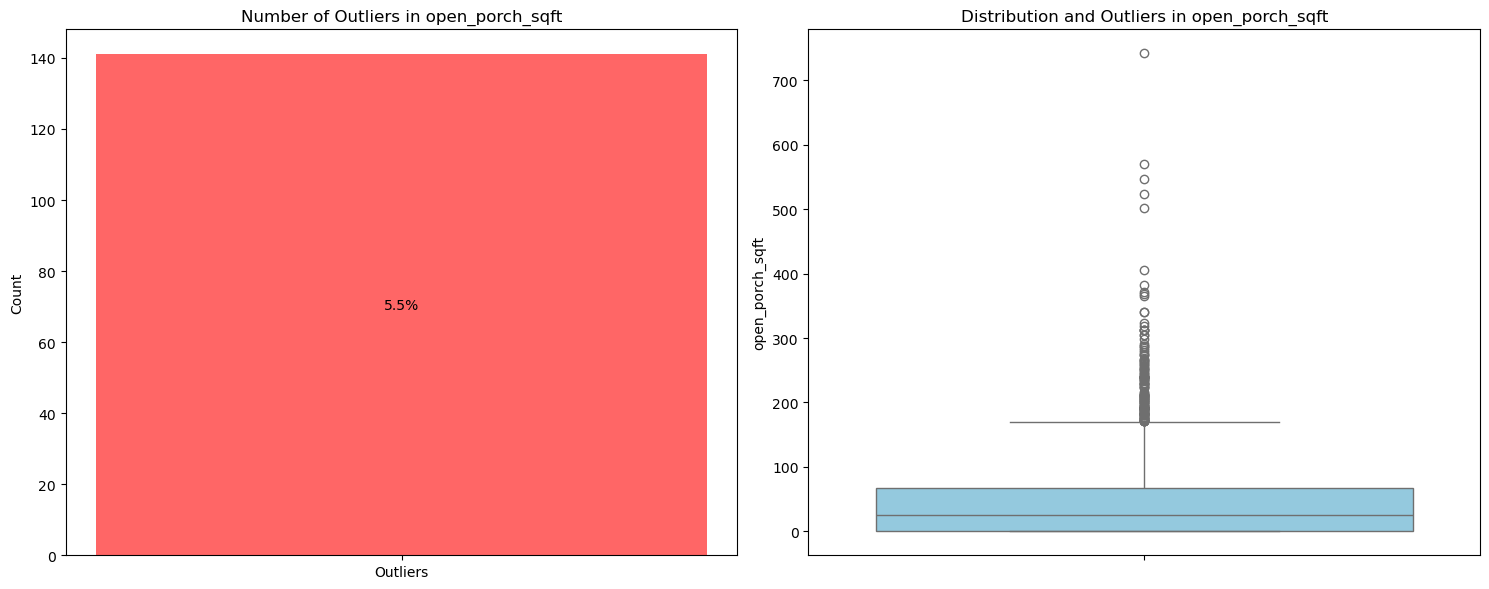


Summary for open_porch_sqft:
Total outliers: 141
Percentage of outliers: 5.47%
Total valid samples: 2580
IQR multiplier used: 1.5
--------------------------------------------------


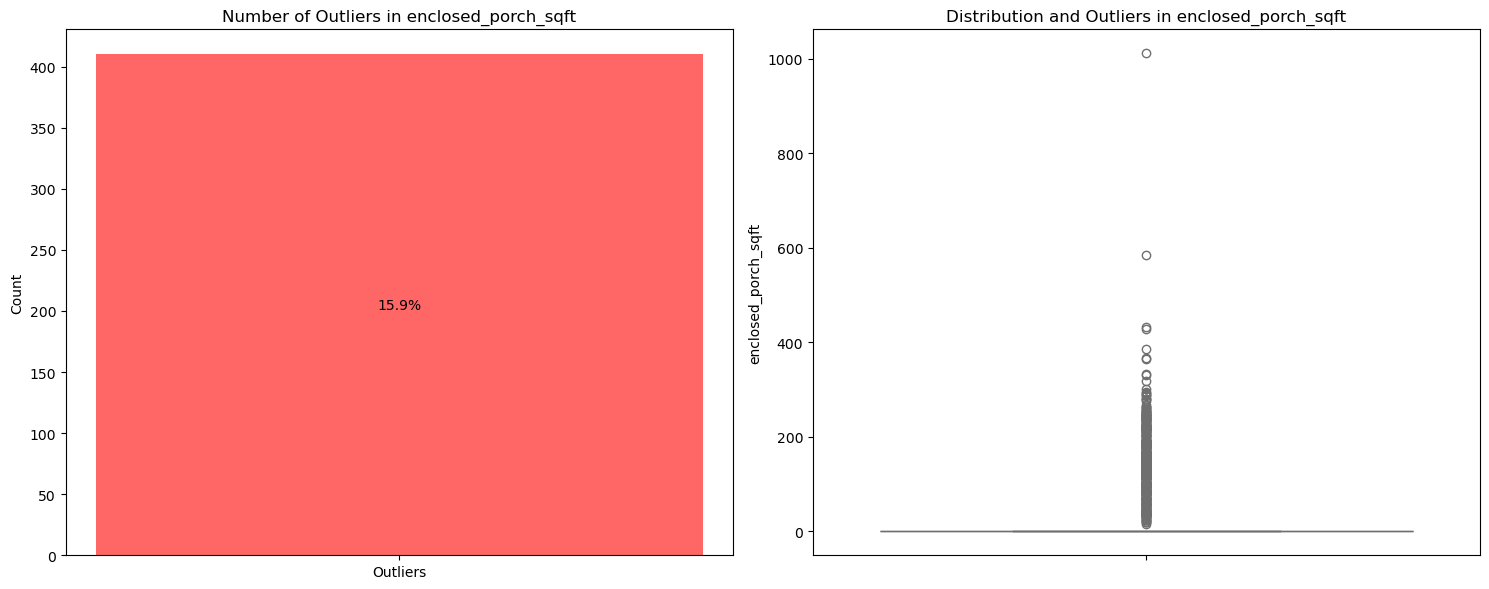


Summary for enclosed_porch_sqft:
Total outliers: 410
Percentage of outliers: 15.89%
Total valid samples: 2580
IQR multiplier used: 1.0
Note: Using reduced IQR multiplier (1.0) due to sparse data
--------------------------------------------------


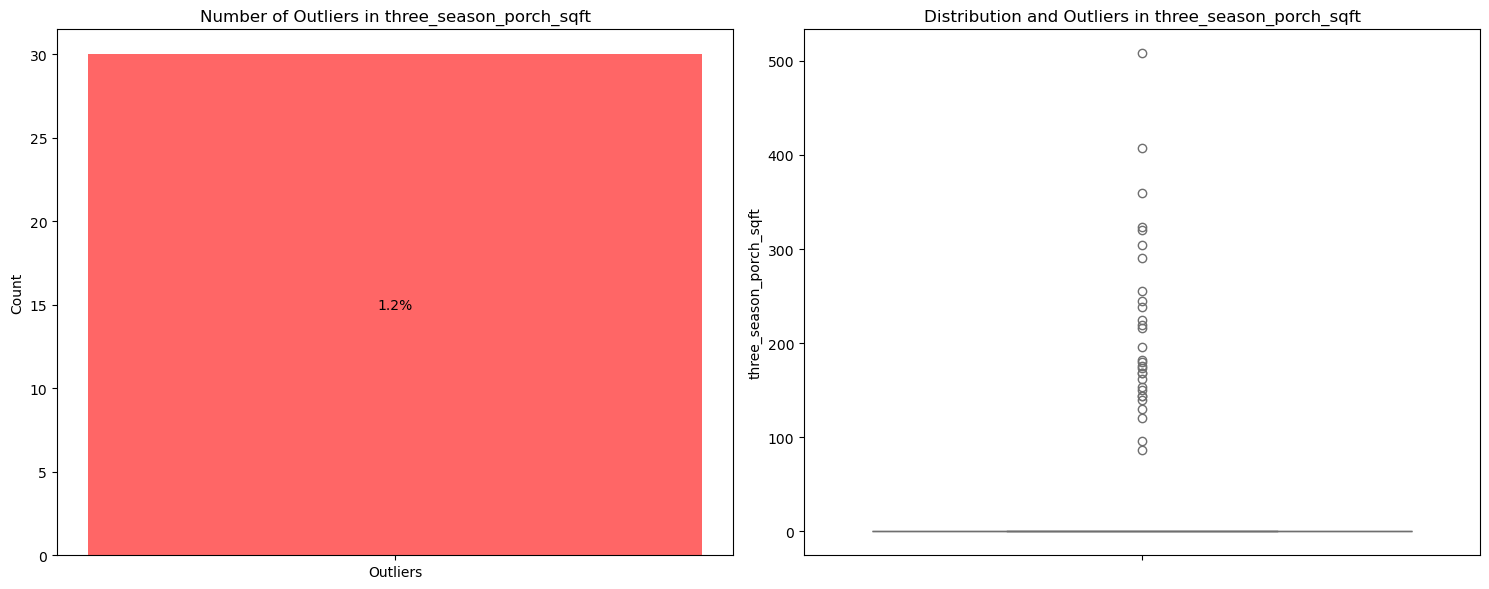


Summary for three_season_porch_sqft:
Total outliers: 30
Percentage of outliers: 1.16%
Total valid samples: 2580
IQR multiplier used: 1.5
--------------------------------------------------


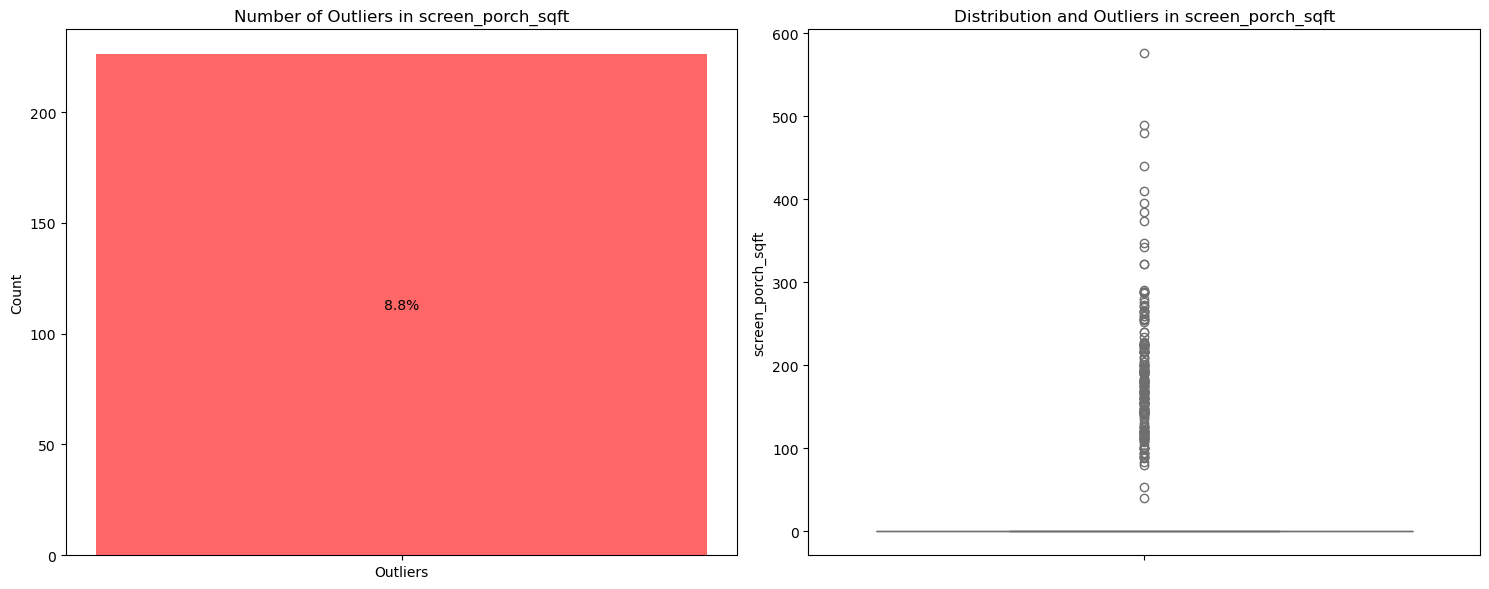


Summary for screen_porch_sqft:
Total outliers: 226
Percentage of outliers: 8.76%
Total valid samples: 2580
IQR multiplier used: 1.5
--------------------------------------------------


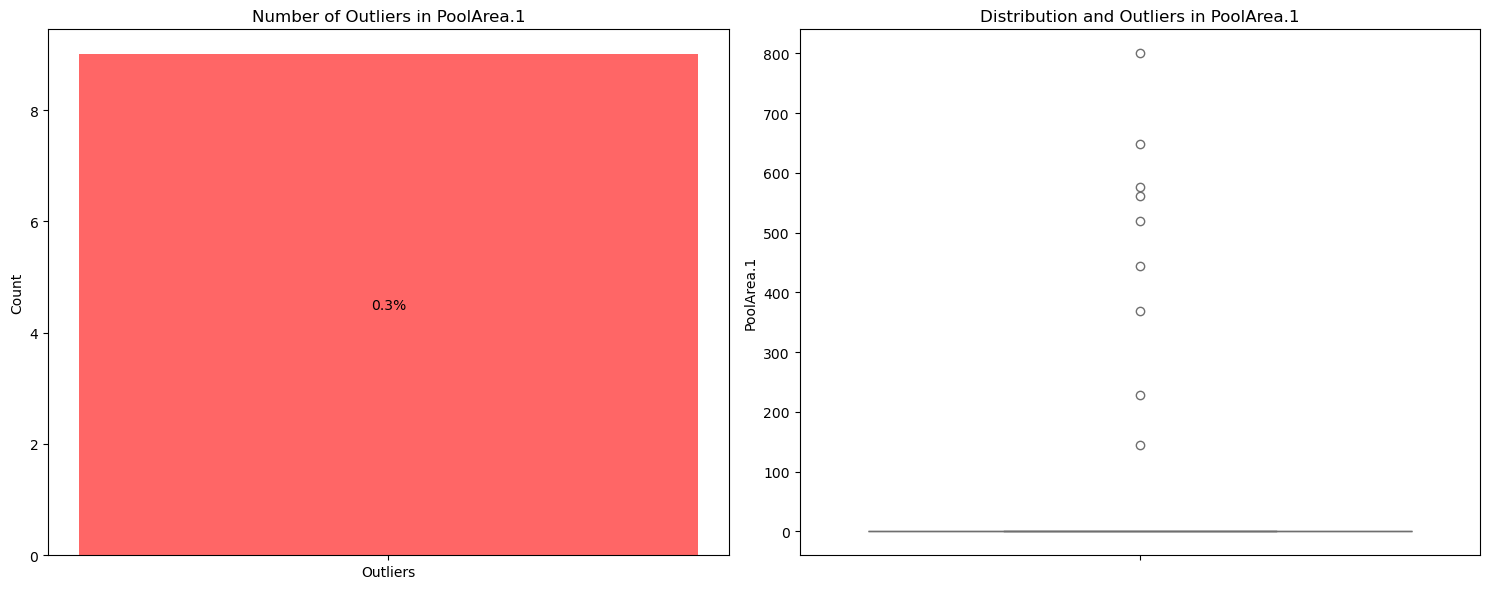


Summary for PoolArea.1:
Total outliers: 9
Percentage of outliers: 0.35%
Total valid samples: 2580
IQR multiplier used: 1.5
--------------------------------------------------


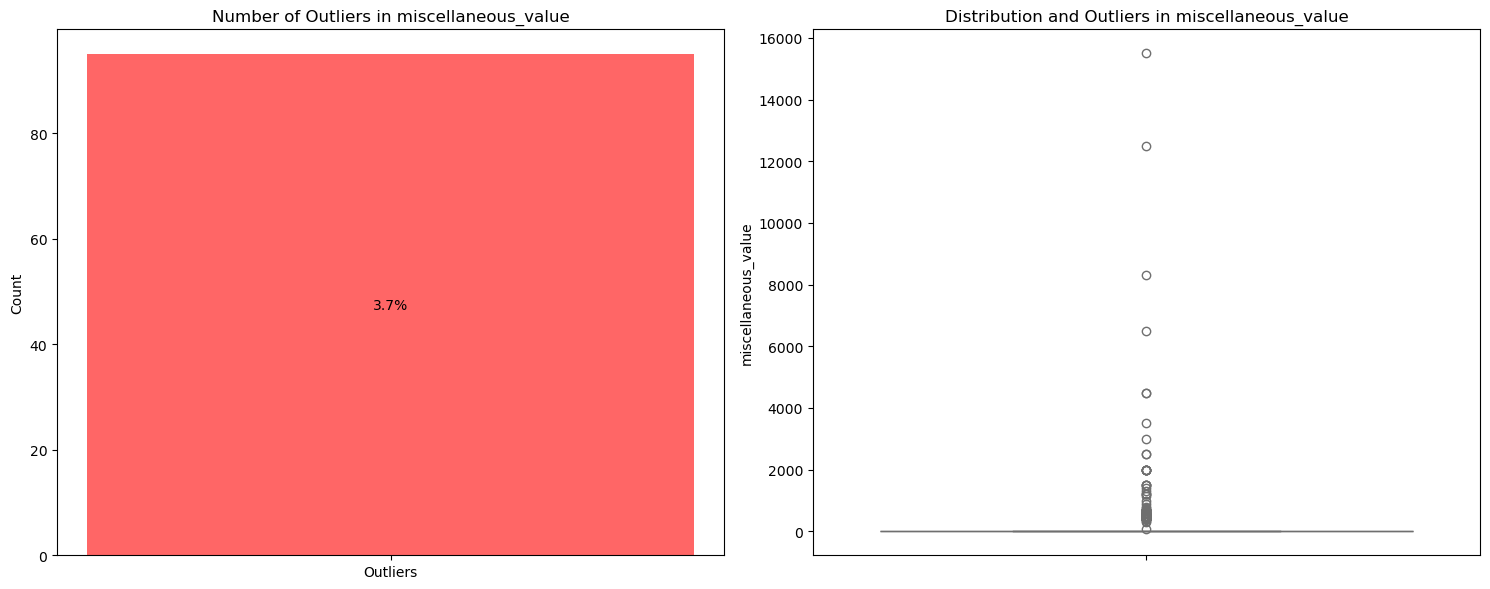


Summary for miscellaneous_value:
Total outliers: 95
Percentage of outliers: 3.68%
Total valid samples: 2580
IQR multiplier used: 1.5
--------------------------------------------------


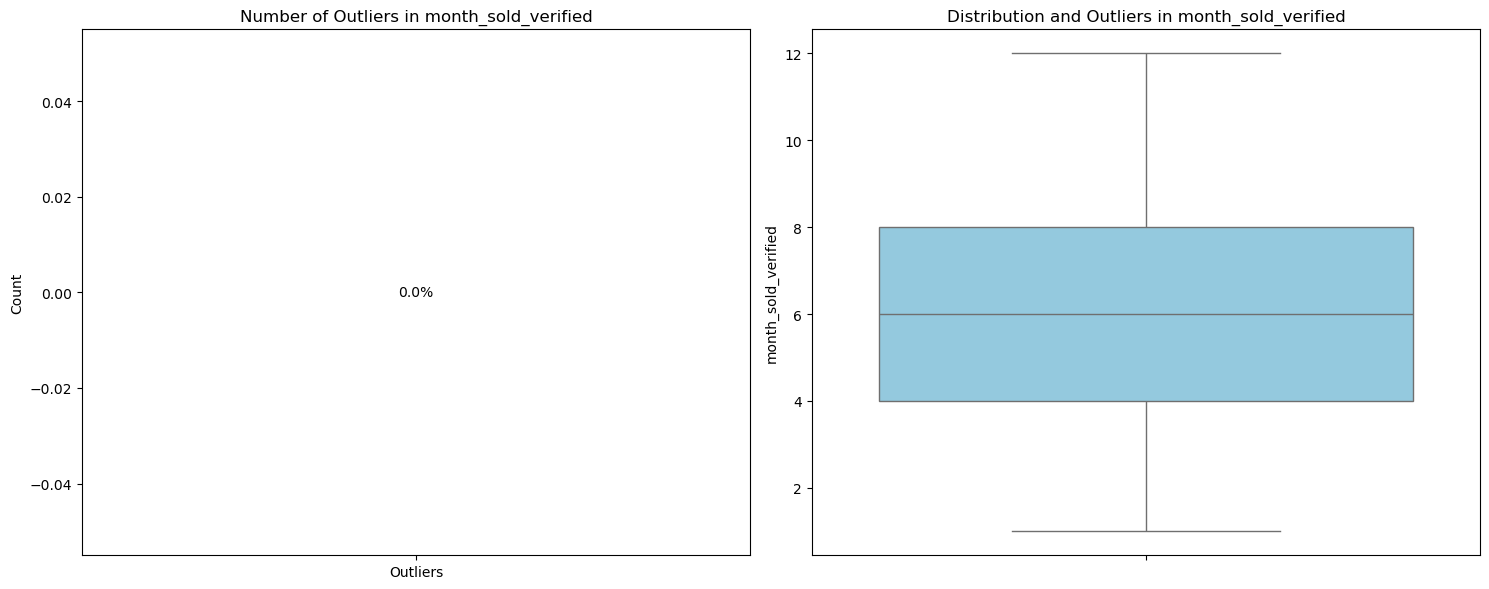


Summary for month_sold_verified:
Total outliers: 0
Percentage of outliers: 0.00%
Total valid samples: 2580
IQR multiplier used: 1.5
--------------------------------------------------


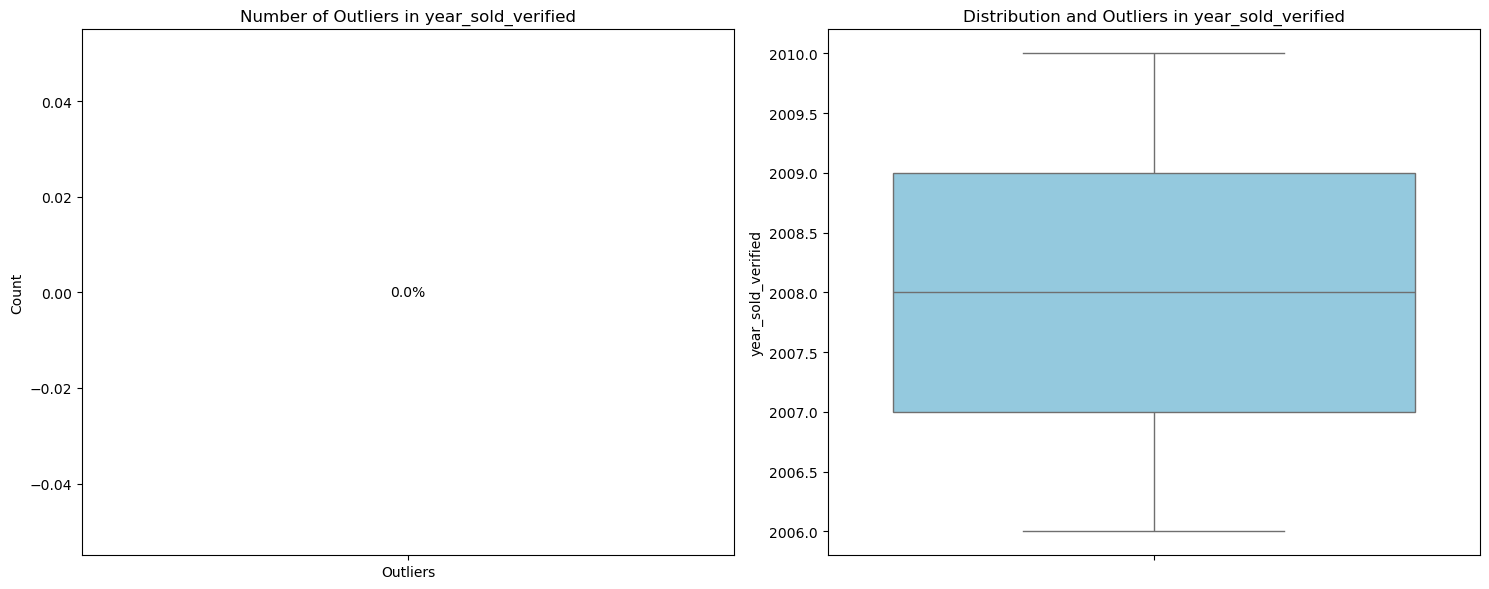


Summary for year_sold_verified:
Total outliers: 0
Percentage of outliers: 0.00%
Total valid samples: 2580
IQR multiplier used: 1.5
--------------------------------------------------


In [3]:
def analyze_outliers(file_path, column_mapping=None):
    """
    Analyze outliers in numeric columns of a dataset with improved readability and efficiency.
    Applies different IQR multipliers for columns with sparse data.
    
    Parameters:
    -----------
    file_path : str
        Path to the CSV file
    column_mapping : dict, optional
        Dictionary mapping original column names to new names
    """
    # Read the data
    df = pd.read_csv(file_path)
    
    # Apply column mapping if provided
    if column_mapping:
        df.rename(columns=column_mapping, inplace=True)
    
    # Select only numeric columns and cache the result
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
    
    # Define columns that need special handling (sparse columns)
    sparse_columns = ['basement_finished_sqft_2', 'enclosed_porch_sqft']
    
    def calculate_outlier_bounds(data, column_name):
        """Calculate outlier boundaries using IQR method with flexible multiplier."""
        clean_data = data.dropna()
        if len(clean_data) == 0:
            return None
        
        # Use different IQR multiplier for sparse columns
        iqr_multiplier = 1.0 if column_name in sparse_columns else 1.5
        
        Q1 = clean_data.quantile(0.25)
        Q3 = clean_data.quantile(0.75)
        IQR = Q3 - Q1
        return {
            'lower_bound': Q1 - iqr_multiplier * IQR,
            'upper_bound': Q3 + iqr_multiplier * IQR,
            'clean_data': clean_data,
            'iqr_multiplier': iqr_multiplier
        }
    
    def count_outliers(data, bounds):
        """Count outliers based on pre-calculated boundaries."""
        if bounds is None:
            return 0
        outliers = data[(data < bounds['lower_bound']) | (data > bounds['upper_bound'])]
        return len(outliers)
    
    for column in numeric_columns:
        clean_data = df[column].dropna()
        
        # Skip empty columns
        if len(clean_data) == 0:
            print(f"\nSkipping {column} - No valid data found")
            print("-" * 50)
            continue
        
        # Calculate bounds once
        bounds = calculate_outlier_bounds(clean_data, column)
        if bounds is None:
            continue
            
        # Create plots
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
        
        # Calculate outliers
        outlier_count = count_outliers(clean_data, bounds)
        
        # Bar plot
        ax1.bar(['Outliers'], [outlier_count], color='red', alpha=0.6)
        ax1.set_title(f'Number of Outliers in {column}')
        ax1.set_ylabel('Count')
        
        # Box plot with custom style
        sns.boxplot(data=clean_data, ax=ax2, color='skyblue')
        ax2.set_title(f'Distribution and Outliers in {column}')
        
        # Adjust layout
        plt.tight_layout()
        
        # Add statistics annotation
        percentage = (outlier_count/len(clean_data))*100
        ax1.text(0, outlier_count/2, f'{percentage:.1f}%', 
                horizontalalignment='center', verticalalignment='center')
        
        plt.show()
        
        # Print summary
        print(f"\nSummary for {column}:")
        print(f"Total outliers: {outlier_count}")
        print(f"Percentage of outliers: {percentage:.2f}%")
        print(f"Total valid samples: {len(clean_data)}")
        print(f"IQR multiplier used: {bounds['iqr_multiplier']}")
        if column in sparse_columns:
            print("Note: Using reduced IQR multiplier (1.0) due to sparse data")
        print("-" * 50)

# Call the function
file_path = '/Users/jorgemartinez/Documents/NYDSA #3 Machine Learning Project/Ames Real Estate and House Price Data Merged.csv'
analyze_outliers(file_path, column_mapping)  # Assuming column_mapping is defined

In [4]:
# PH: Lots of outliers for basement_finished_sqft_2 and enclosed_porch_sqft, because my guess is that few 
# of the rows in your dataset have a basement or an enclosed porch. I would define a new method to compute outliers for these two 
# columns, using 1*IQR instead of 1.5*IQR for instance, and explain in your writeup that you are capping the outlier numbers 
# given fewer samples in the dataset.


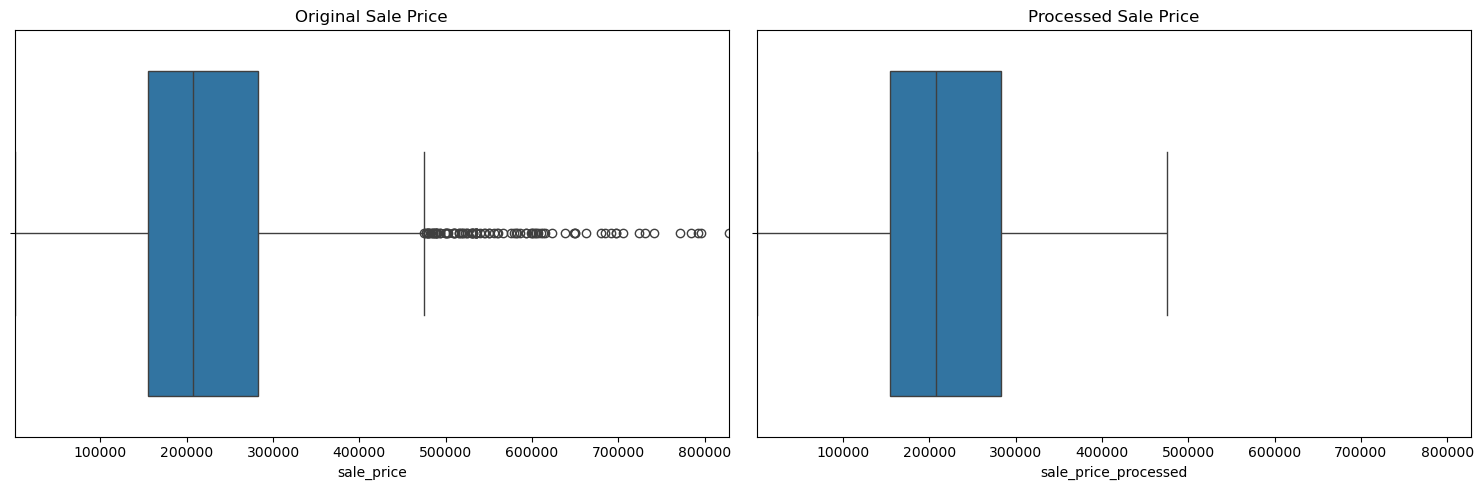


Stats for Sale Price:
Original range: 900.00 to 827581.00
Processed range: 900.00 to 475000.00
Original mean: 223650.25
Processed mean: 220687.51
Original std: 115208.13
Processed std: 106110.89
Values modified: 19340


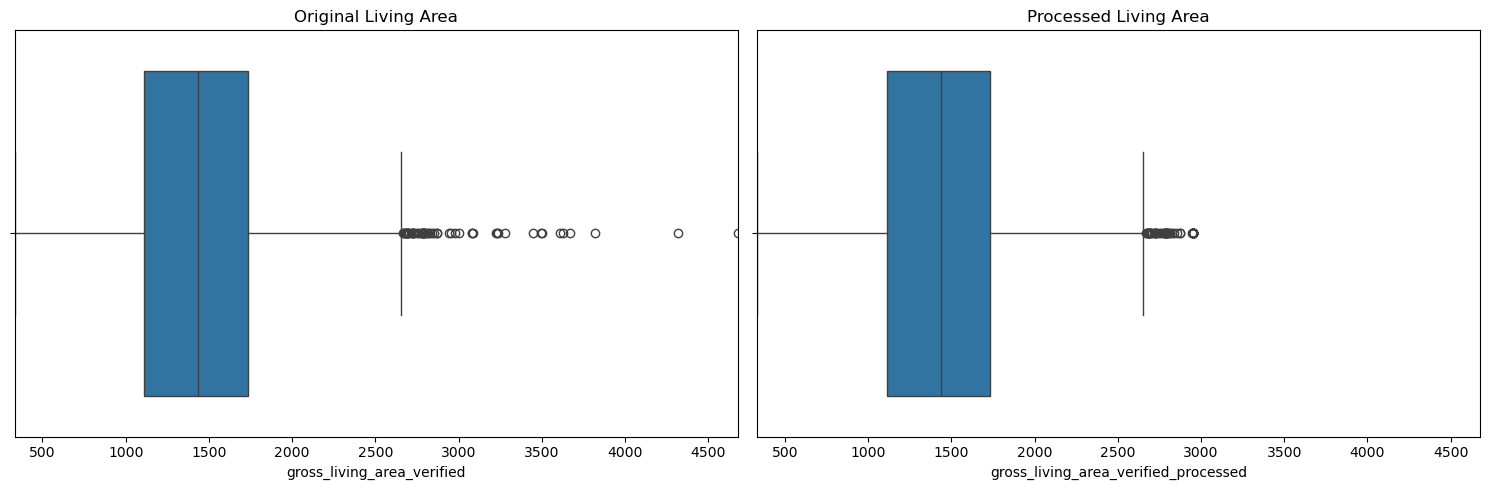


Stats for Living Area:
Original range: 334.00 to 4676.00
Processed range: 334.00 to 2951.99
Original mean: 1486.04
Processed mean: 1482.47
Original std: 488.65
Processed std: 474.44
Values modified: 19652


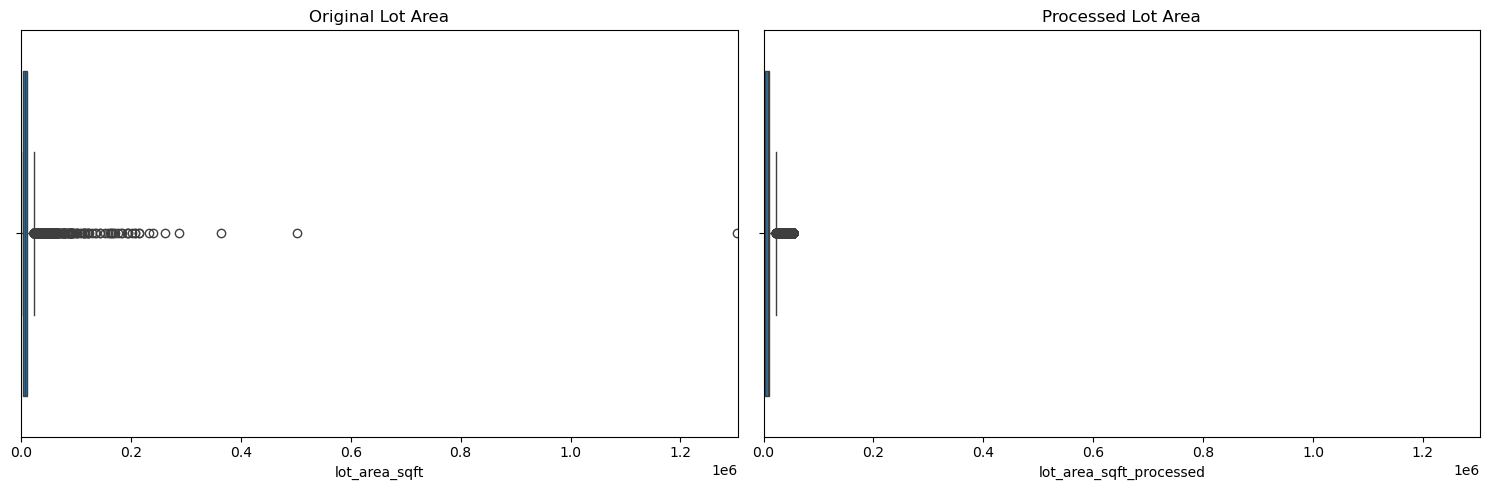


Stats for Lot Area:
Original range: 0.00 to 1303776.00
Processed range: 0.00 to 54227.03
Original mean: 8725.98
Processed mean: 8294.43
Original std: 15167.01
Processed std: 7338.48
Values modified: 4442


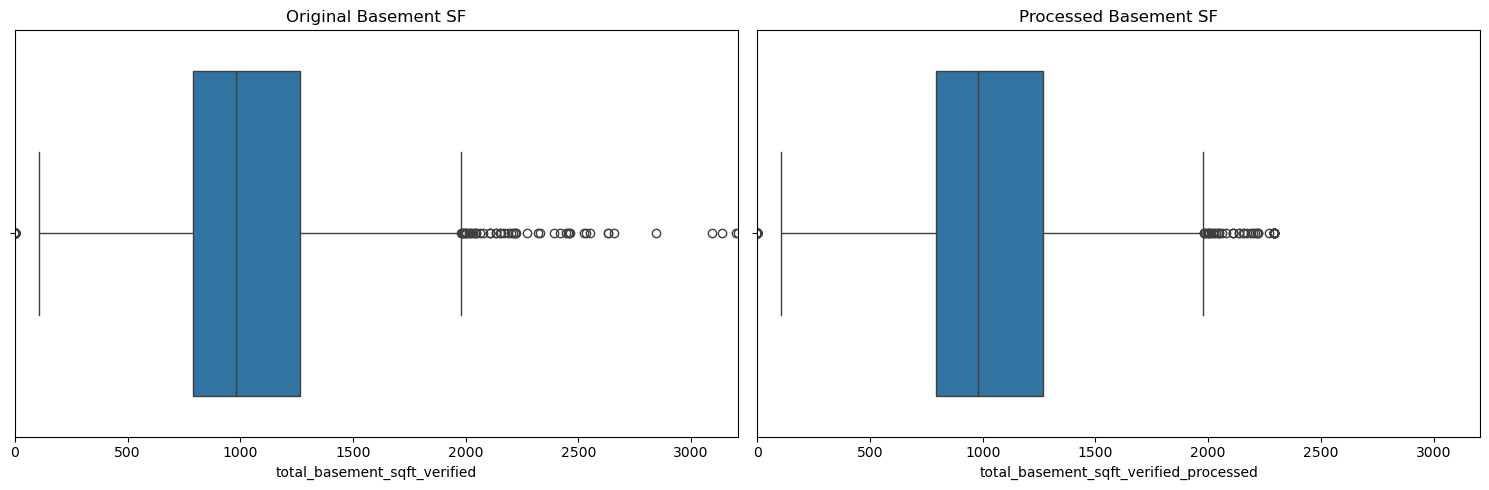


Stats for Basement SF:
Original range: 0.00 to 3206.00
Processed range: 0.00 to 2292.35
Original mean: 1036.69
Processed mean: 1034.07
Original std: 418.56
Processed std: 408.74
Values modified: 19653


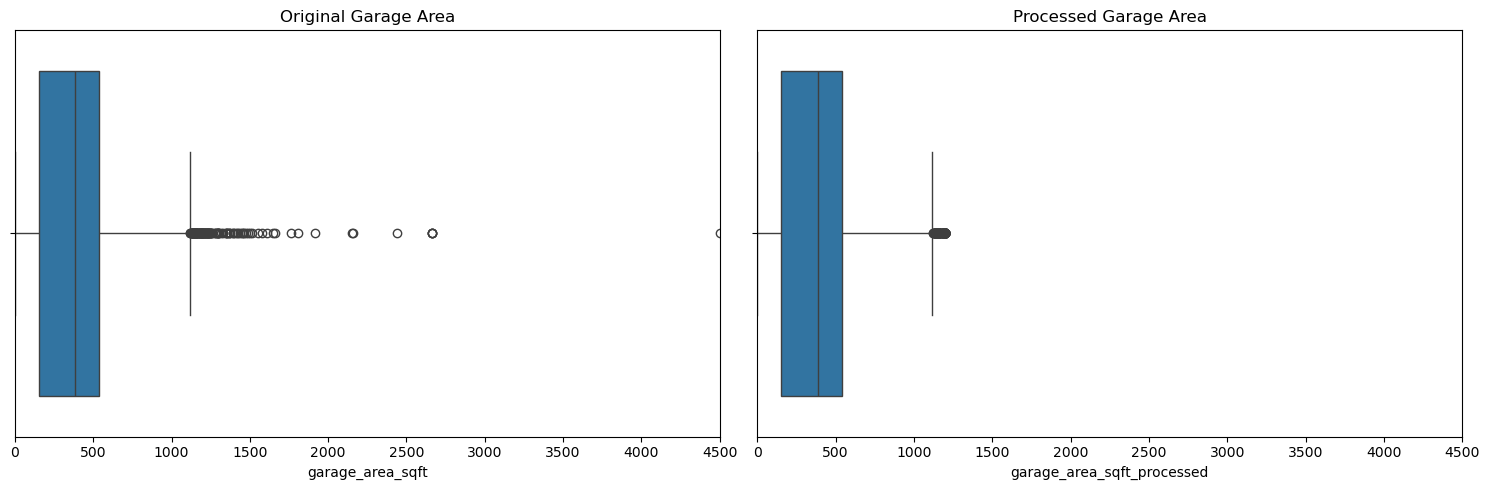


Stats for Garage Area:
Original range: 0.00 to 4500.00
Processed range: 0.00 to 1200.24
Original mean: 367.88
Processed mean: 366.63
Original std: 277.46
Processed std: 271.01
Values modified: 4379


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define numeric columns with mapped names
numeric_columns = [
   'sale_price', 'gross_living_area_verified', 'lot_area_sqft',
   'total_basement_sqft_verified', 'garage_area_sqft',
   'total_rooms_above_ground', 'number_of_fireplaces'
]

def analyze_and_handle_outliers(df, numeric_columns):
   # Methods definition
   methods = {
       'iqr': ['sale_price'],
       'zscore': ['gross_living_area_verified', 'lot_area_sqft', 
                 'total_basement_sqft_verified', 'garage_area_sqft'],
       'statistical': ['total_rooms_above_ground', 'number_of_fireplaces']
   }
   
   # Calculate statistics
   column_stats = {col: {
       'quantiles': df[col].quantile([0.25, 0.75, 0.95]),
       'mean': df[col].mean(),
       'std': df[col].std()
   } for col in numeric_columns if col in df.columns}
   
   def apply_capping(data, col, method):
       stats = column_stats[col]
       if method == 'iqr':
           Q1, Q3 = stats['quantiles'][0.25], stats['quantiles'][0.75]
           IQR = Q3 - Q1
           return data.clip(lower=Q1 - 1.5 * IQR, upper=Q3 + 1.5 * IQR)
       elif method == 'zscore':
           return data.clip(lower=stats['mean'] - 3 * stats['std'], 
                          upper=stats['mean'] + 3 * stats['std'])
       return data.clip(upper=stats['quantiles'][0.95])
   
   for method, columns in methods.items():
       for col in columns:
           if col in df.columns:
               df[f'{col}_processed'] = apply_capping(df[col], col, method)
   
   # Plotting comparisons
   columns_to_plot = [
       ('sale_price', 'sale_price_processed', 'Sale Price'),
       ('gross_living_area_verified', 'gross_living_area_verified_processed', 'Living Area'),
       ('lot_area_sqft', 'lot_area_sqft_processed', 'Lot Area'),
       ('total_basement_sqft_verified', 'total_basement_sqft_verified_processed', 'Basement SF'),
       ('garage_area_sqft', 'garage_area_sqft_processed', 'Garage Area')
   ]
   
   for orig_col, proc_col, title in columns_to_plot:
       if orig_col in df.columns and proc_col in df.columns:
           plot_comparison(df, orig_col, proc_col, title)
   
   return df

def plot_comparison(data, original_col, processed_col, title):
   fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
   
   overall_min = min(data[original_col].min(), data[processed_col].min())
   overall_max = max(data[original_col].max(), data[processed_col].max())
   
   sns.boxplot(x=data[original_col], ax=ax1)
   ax1.set_title(f'Original {title}')
   ax1.set_xlim(overall_min, overall_max)
   
   sns.boxplot(x=data[processed_col], ax=ax2)
   ax2.set_title(f'Processed {title}')
   ax2.set_xlim(overall_min, overall_max)
   
   plt.tight_layout()
   plt.show()
   
   print(f"\nStats for {title}:")
   print(f"Original range: {data[original_col].min():.2f} to {data[original_col].max():.2f}")
   print(f"Processed range: {data[processed_col].min():.2f} to {data[processed_col].max():.2f}")
   print(f"Original mean: {data[original_col].mean():.2f}")
   print(f"Processed mean: {data[processed_col].mean():.2f}")
   print(f"Original std: {data[original_col].std():.2f}")
   print(f"Processed std: {data[processed_col].std():.2f}")
   print(f"Values modified: {(data[original_col] != data[processed_col]).sum()}")

# Execute the analysis
df = pd.read_csv('/Users/jorgemartinez/Documents/NYDSA #3 Machine Learning Project/Ames Real Estate and House Price Data Merged.csv', 
                low_memory=False)
df.rename(columns=column_mapping, inplace=True)
processed_df = analyze_and_handle_outliers(df, numeric_columns)
processed_df.to_csv('/Users/jorgemartinez/Documents/NYDSA #3 Machine Learning Project/Ames_Housing_Processed.csv', 
                  index=False)

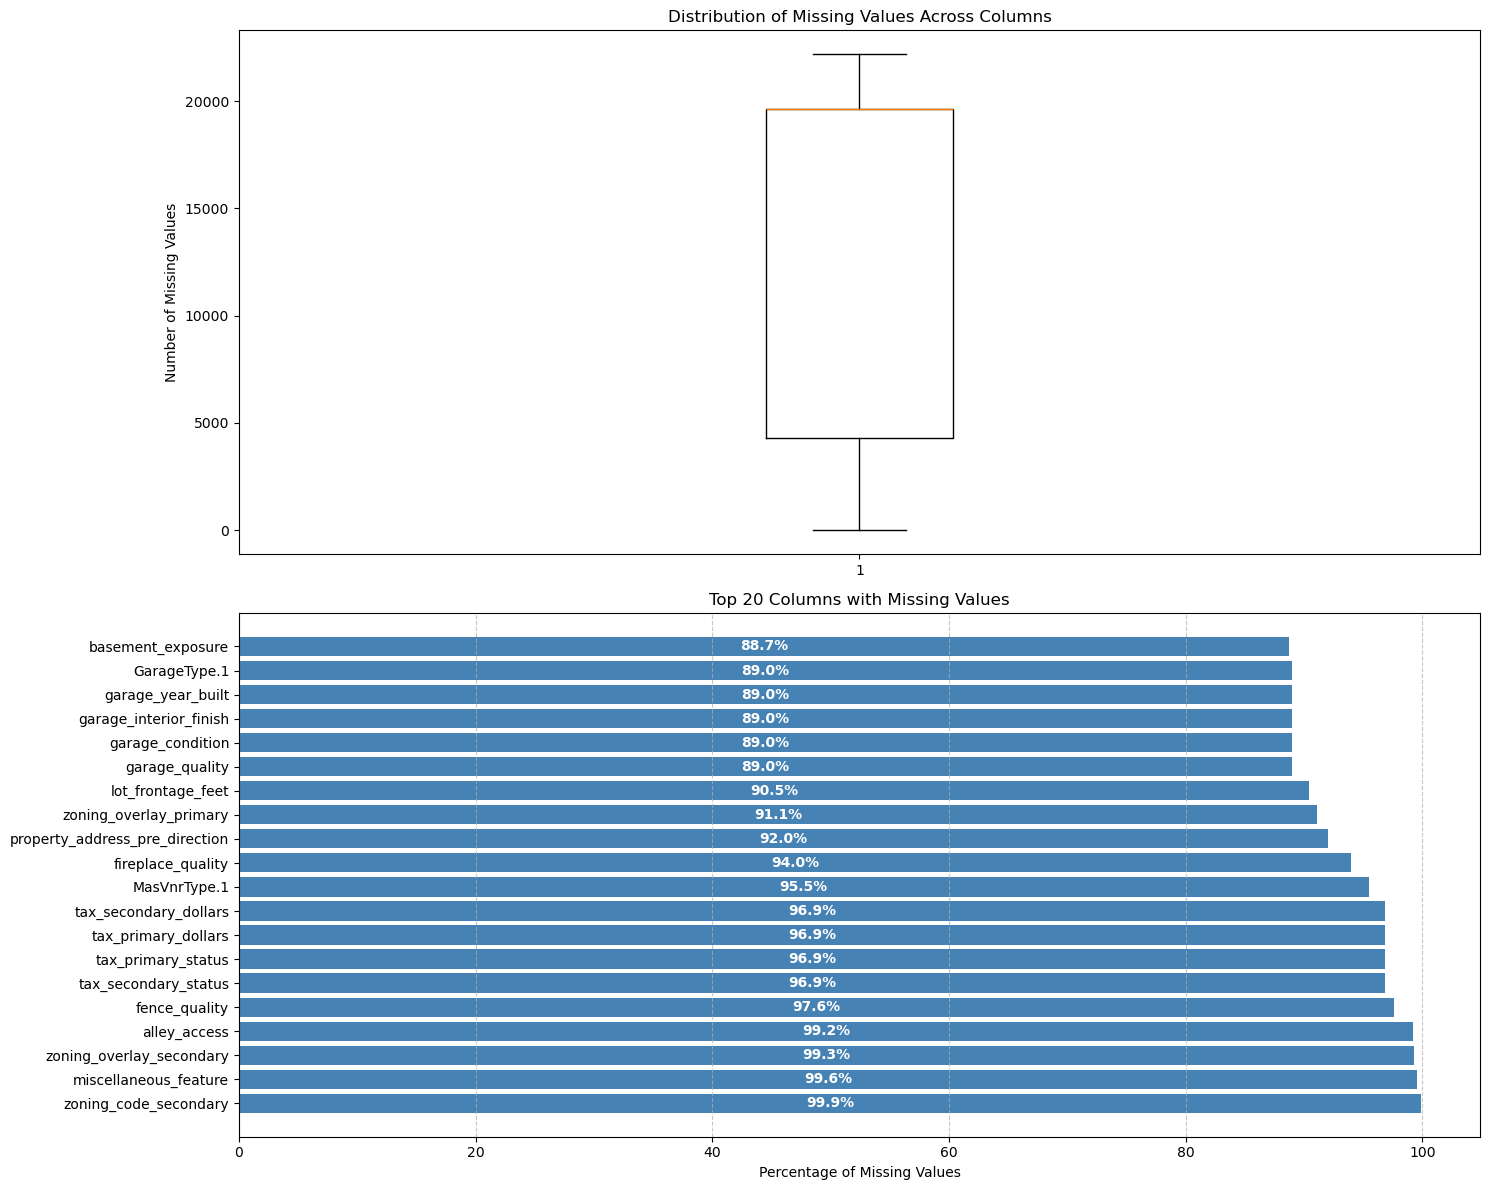


Missing Values Summary:
Total columns with missing values: 140
Maximum missing values: 22187
Average missing values: 15010.41

Top 10 Columns with Most Missing Values:
                       Column  Missing Count  Missing Percentage
6       zoning_code_secondary          22187           99.882951
160     miscellaneous_feature          22116           99.563319
8    zoning_overlay_secondary          22060           99.311214
94               alley_access          22045           99.243686
159             fence_quality          21688           97.636519
35       tax_secondary_status          21522           96.889209
34         tax_primary_status          21522           96.889209
32        tax_primary_dollars          21519           96.875703
33      tax_secondary_dollars          21519           96.875703
113              MasVnrType.1          21206           95.466619

Distribution of Missing Values:
Range
<1%        9
1-5%       0
5-10%      5
10-25%    23
25-50%     1
50-75%     7

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_missing_values(df, column_mapping, top_n=20):
    """
    Comprehensive missing values analysis with optimized performance
    """
    # Apply column mapping
    df = df.rename(columns=column_mapping)
    
    # Calculate missing values once
    missing_values = df.isnull().sum()
    missing_percentage = (missing_values / len(df)) * 100
    
    # Create missing values DataFrame
    missing_df = pd.DataFrame({
        'Column': missing_values.index,
        'Missing Count': missing_values.values,
        'Missing Percentage': missing_percentage.values
    }).sort_values('Missing Count', ascending=False)
    missing_df = missing_df[missing_df['Missing Count'] > 0]
    
    # Create visualization subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))
    
    # Box plot
    ax1.boxplot(missing_values)
    ax1.set_ylabel('Number of Missing Values')
    ax1.set_title('Distribution of Missing Values Across Columns')
    
    # Bar plot of top N columns
    top_missing = missing_df.head(top_n)
    bars = ax2.barh(range(len(top_missing)), top_missing['Missing Percentage'], color='steelblue')
    ax2.set_yticks(range(len(top_missing)))
    ax2.set_yticklabels(top_missing['Column'])
    ax2.set_xlabel('Percentage of Missing Values')
    ax2.set_title(f'Top {top_n} Columns with Missing Values')
    
    # Add percentage labels
    for i, bar in enumerate(bars):
        width = bar.get_width()
        ax2.text(width/2, bar.get_y() + bar.get_height()/2,
                f'{width:.1f}%',
                ha='center', va='center',
                color='white' if width > 30 else 'black',
                fontweight='bold')
    
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    
    # Generate summary statistics
    ranges = [0, 1, 5, 10, 25, 50, 75, 100]
    labels = ['<1%', '1-5%', '5-10%', '10-25%', '25-50%', '50-75%', '>75%']
    missing_df['Range'] = pd.cut(missing_df['Missing Percentage'], bins=ranges, labels=labels, right=False)
    
    stats = {
        'total_columns_missing': len(missing_df),
        'max_missing': missing_df['Missing Count'].max(),
        'avg_missing': missing_df['Missing Count'].mean(),
        'top_10_missing': missing_df.head(10)[['Column', 'Missing Count', 'Missing Percentage']],
        'distribution': missing_df['Range'].value_counts().sort_index()
    }
    
    return missing_df, stats, fig

# Read and analyze data
file_path = '/Users/jorgemartinez/Documents/NYDSA #3 Machine Learning Project/Ames Real Estate and House Price Data Merged.csv'
df = pd.read_csv(file_path, low_memory=False)
missing_df, stats, fig = analyze_missing_values(df, column_mapping)

# Display results
plt.show()
print("\nMissing Values Summary:")
print(f"Total columns with missing values: {stats['total_columns_missing']}")
print(f"Maximum missing values: {stats['max_missing']}")
print(f"Average missing values: {stats['avg_missing']:.2f}")
print("\nTop 10 Columns with Most Missing Values:")
print(stats['top_10_missing'])
print("\nDistribution of Missing Values:")
print(stats['distribution'])

In [7]:
import pandas as pd
import numpy as np
from typing import Dict, Set, Optional, Tuple

class FeatureEngineer:
    def __init__(self, file_path: str, column_mapping: Dict):
        self.file_path = file_path
        self.column_mapping = column_mapping
        self.quality_map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}
        self.exposure_map = {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0}
        
    def load_and_process(self) -> Optional[pd.DataFrame]:
        try:
            df = pd.read_csv(self.file_path, low_memory=False)
            df = df.rename(columns=self.column_mapping)
            return self._engineer_features(df)
        except Exception as e:
            print(f"Error: {str(e)}")
            return None

    def _engineer_features(self, df: pd.DataFrame) -> pd.DataFrame:
        original_features = set(df.columns)
        df = df.copy()
        
        transformations = {
            'time_features': self._create_time_features,
            'quality_features': self._create_quality_features,
            'space_features': self._create_space_features,
            'location_features': self._create_location_features,
            'functional_features': self._create_functional_features
        }
        
        for transform in transformations.values():
            df = transform(df)
            
        df = self._cleanup_and_validate(df)
        self._print_feature_summary(original_features, set(df.columns))
        return df

    def _create_time_features(self, df: pd.DataFrame) -> pd.DataFrame:
        df['house_age'] = df['year_sold_verified'] - df['year_built_verified']
        df['years_since_remodel'] = df['year_sold_verified'] - df['year_remodeled']
        df['renovation_indicator'] = (df['year_built_verified'] != df['year_remodeled']).astype(int)
        
        # Handle missing values before conversion
        df['sale_season'] = (df['month_sold_verified']
                            .fillna(1)  # Fill NA values with 1 (first quarter)
                            .astype(float)
                            .sub(1)     # Subtract 1 
                            .floordiv(3)  # Integer division by 3
                            .add(1)     # Add 1 to get quarters 1-4
                            .astype(int))
        return df

    def _create_quality_features(self, df: pd.DataFrame) -> pd.DataFrame:
        quality_columns = {
            'exterior': ['exterior_quality', 'exterior_condition'],
            'basement': ['basement_quality', 'basement_condition'],
            'garage': ['garage_quality', 'garage_condition']
        }
        
        for feature, cols in quality_columns.items():
            for col in cols:
                df[f"{col}_num"] = df[col].map(self.quality_map)
            df[f"{feature}_score"] = df[[f"{col}_num" for col in cols]].mean(axis=1)
        
        df['quality_condition_score'] = df['overall_quality_rating'] * df['overall_condition_rating']
        df['kitchen_score'] = df['kitchen_quality'].map(self.quality_map) * df['kitchens_above_ground']
        return df

    def _create_space_features(self, df: pd.DataFrame) -> pd.DataFrame:
        df['total_sqft'] = (df['gross_living_area_verified'] + 
                           df['garage_area_sqft'].fillna(0) + 
                           df['total_basement_sqft_verified'].fillna(0))
        
        df['living_space_efficiency'] = df['gross_living_area_verified'] / df['lot_area_sqft'].where(df['lot_area_sqft'] > 0, 1)
        
        outdoor_cols = ['wood_deck_sqft', 'open_porch_sqft', 'enclosed_porch_sqft', 
                       'three_season_porch_sqft', 'screen_porch_sqft']
        df['total_outdoor_sqft'] = df[outdoor_cols].fillna(0).sum(axis=1)
        return df

    def _create_location_features(self, df: pd.DataFrame) -> pd.DataFrame:
        df['neighborhood_mean_price'] = df.groupby('neighborhood_name')['sale_price'].transform('mean')
        df['lot_frontage_ratio'] = df['lot_frontage_feet'] / df['lot_area_sqft'].where(df['lot_area_sqft'] > 0, 1)
        return df

    def _create_functional_features(self, df: pd.DataFrame) -> pd.DataFrame:
        df['total_baths'] = (df['full_bathrooms'] + 0.5 * df['half_bathrooms'] + 
                            df['basement_full_bathrooms'] + 0.5 * df['basement_half_bathrooms'])
        df['bedroom_bath_ratio'] = df['bedrooms_above_ground'] / df['total_baths'].where(df['total_baths'] > 0, 1)
        df['has_fence'] = (~df['fence_quality'].isna()).astype(int)
        return df

    def _cleanup_and_validate(self, df: pd.DataFrame) -> pd.DataFrame:
        df = df.drop(columns=[col for col in df.columns if col.endswith('_num')])
        numeric_cols = df.select_dtypes(include=[np.number]).columns
        df[numeric_cols] = df[numeric_cols].replace([np.inf, -np.inf], np.nan)
        
        for col in numeric_cols:
            if col != 'sale_price' and df[col].isnull().any():
                df[col] = df[col].fillna(0 if 'ratio' in col or 'score' in col else df[col].median())
        return df

    def _print_feature_summary(self, original_features: Set[str], final_features: Set[str]) -> None:
        new_features = final_features - original_features
        print(f"\nFeature Engineering Summary:")
        print(f"Original features: {len(original_features)}")
        print(f"New features: {len(new_features)}")
        print("\nEngineered features:")
        for feature in sorted(new_features):
            print(f"- {feature}")

if __name__ == "__main__":
    engineer = FeatureEngineer('/Users/jorgemartinez/Documents/NYDSA #3 Machine Learning Project/Ames Real Estate and House Price Data Merged.csv', column_mapping)
    df_engineered = engineer.load_and_process()


Feature Engineering Summary:
Original features: 166
New features: 17

Engineered features:
- basement_score
- bedroom_bath_ratio
- exterior_score
- garage_score
- has_fence
- house_age
- kitchen_score
- living_space_efficiency
- lot_frontage_ratio
- neighborhood_mean_price
- quality_condition_score
- renovation_indicator
- sale_season
- total_baths
- total_outdoor_sqft
- total_sqft
- years_since_remodel


In [8]:
from sklearn.preprocessing import OneHotEncoder 
import pandas as pd
import numpy as np
from typing import Dict, Set, Optional

class FeatureEngineer:
    def __init__(self, file_path: str, column_mapping: Dict):
        self.file_path = file_path
        self.column_mapping = column_mapping
        self.quality_map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1} #TODO: This is fine to do to feature engineer other variables, like I see you multiplying this variable by another to create a "kitchen_score" later on. However, do not use this variable in your dataset used to train your machine learning model - the model won't be able to use these variables when training. Instead, you should binary encode each of the values in this vriable if you do want to use this column in your model.
        self.exposure_map = {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0} #TODO: Same thing here
        
    def load_and_process(self) -> Optional[pd.DataFrame]:
        try:
            df = pd.read_csv(self.file_path, low_memory=False)
            df = df.rename(columns=self.column_mapping)
            return self._engineer_features(df)
        except Exception as e:
            print(f"Error: {str(e)}")
            return None

    def _engineer_features(self, df: pd.DataFrame) -> pd.DataFrame:
        original_features = set(df.columns)
        df = df.copy()
        
        transformations = {
            'time_features': self._create_time_features,
            'quality_features': self._create_quality_features,
            'space_features': self._create_space_features,
            'location_features': self._create_location_features,
            'functional_features': self._create_functional_features
        }
        
        for transform in transformations.values():
            df = transform(df)
            
        df = self._cleanup_and_validate(df)
        self._print_feature_summary(original_features, set(df.columns))
        return df

    def _create_time_features(self, df: pd.DataFrame) -> pd.DataFrame:
        try:
            df['house_age'] = df['year_sold_verified'] - df['year_built_verified']
            df['years_since_remodel'] = df['year_sold_verified'] - df['year_remodeled']
            df['renovation_indicator'] = (df['year_built_verified'] != df['year_remodeled']).astype(int)
            
            # Handle NA values before conversion
            df['month_sold_verified'] = pd.to_numeric(df['month_sold_verified'], errors='coerce')
            df['month_sold_verified'] = df['month_sold_verified'].fillna(1)  # Default to January for missing values
            df['sale_season'] = pd.to_datetime(df['month_sold_verified'].astype(int).astype(str), format='%m').dt.quarter
        except Exception as e:
            print(f"Error in time features: {e}")
        return df

    def _create_quality_features(self, df: pd.DataFrame) -> pd.DataFrame:
        quality_columns = {
            'exterior': ['exterior_quality', 'exterior_condition'],
            'basement': ['basement_quality', 'basement_condition'],
            'garage': ['garage_quality', 'garage_condition']
        }
        
        for feature, cols in quality_columns.items():
            if all(col in df.columns for col in cols):
                for col in cols:
                    df[f"{col}_num"] = df[col].map(self.quality_map)
                df[f"{feature}_score"] = df[[f"{col}_num" for col in cols]].mean(axis=1)
        
        df['quality_condition_score'] = df['overall_quality_rating'] * df['overall_condition_rating']
        df['kitchen_score'] = df['kitchen_quality'].map(self.quality_map) * df['kitchens_above_ground']
        return df

    def _create_space_features(self, df: pd.DataFrame) -> pd.DataFrame:
        df['total_sqft'] = (df['gross_living_area_verified'] + 
                           df['garage_area_sqft'].fillna(0) + 
                           df['total_basement_sqft_verified'].fillna(0))
        
        df['living_space_efficiency'] = df['gross_living_area_verified'] / df['lot_area_sqft'].where(df['lot_area_sqft'] > 0, 1)
        
        outdoor_cols = ['wood_deck_sqft', 'open_porch_sqft', 'enclosed_porch_sqft', 
                       'three_season_porch_sqft', 'screen_porch_sqft']
        df['total_outdoor_sqft'] = df[outdoor_cols].fillna(0).sum(axis=1)
        return df

    def _create_location_features(self, df: pd.DataFrame) -> pd.DataFrame:
        df['neighborhood_mean_price'] = df.groupby('neighborhood_name')['sale_price'].transform('mean')
        df['lot_frontage_ratio'] = df['lot_frontage_feet'] / df['lot_area_sqft'].where(df['lot_area_sqft'] > 0, 1)
        return df

    def _create_functional_features(self, df: pd.DataFrame) -> pd.DataFrame:
        df['total_baths'] = (df['full_bathrooms'] + 0.5 * df['half_bathrooms'] + 
                            df['basement_full_bathrooms'] + 0.5 * df['basement_half_bathrooms'])
        
        df['bedroom_bath_ratio'] = df['bedrooms_above_ground'] / df['total_baths'].where(df['total_baths'] > 0, 1)
        df['has_fence'] = (~df['fence_quality'].isna()).astype(int)
        return df

    def _cleanup_and_validate(self, df: pd.DataFrame) -> pd.DataFrame:
    # Keep your existing cleanup code
        df = df.drop(columns=[col for col in df.columns if col.endswith('_num')])
        numeric_cols = df.select_dtypes(include=[np.number]).columns
        df[numeric_cols] = df[numeric_cols].replace([np.inf, -np.inf], np.nan)
        
        # Add this new section for binary encoding
        quality_columns = ['exterior_quality', 'exterior_condition', 
                        'basement_quality', 'basement_condition',
                        'garage_quality', 'garage_condition',
                        'kitchen_quality']
        
        # Only encode columns that exist in the dataframe
        cols_to_encode = [col for col in quality_columns if col in df.columns]
        
        if cols_to_encode:
            encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
            
            for col in cols_to_encode:
                # Fit and transform the encoder
                encoded_features = encoder.fit_transform(df[[col]])
                
                # Create feature names
                feature_names = [f"{col}_{cat}" for cat in encoder.categories_[0]]
                
                # Add the encoded features to the dataframe
                encoded_df = pd.DataFrame(encoded_features, columns=feature_names, index=df.index)
                df = pd.concat([df, encoded_df], axis=1)
                
                # Optionally remove the original column
                df = df.drop(columns=[col])
        
        # Keep your existing null handling
        for col in numeric_cols:
            if col != 'sale_price' and df[col].isnull().any():
                df[col] = df[col].fillna(0 if 'ratio' in col or 'score' in col else df[col].median())
                
        return df

    def _print_feature_summary(self, original_features: Set[str], final_features: Set[str]) -> None:
        new_features = final_features - original_features
        print(f"\nFeature Engineering Summary:")
        print(f"Original features: {len(original_features)}")
        print(f"New features: {len(new_features)}")
        print("\nEngineered features:")
        for feature in sorted(new_features):
            print(f"- {feature}")

if __name__ == "__main__":
    engineer = FeatureEngineer('/Users/jorgemartinez/Documents/NYDSA #3 Machine Learning Project/Ames Real Estate and House Price Data Merged.csv', column_mapping)
    df_engineered = engineer.load_and_process()


Feature Engineering Summary:
Original features: 166
New features: 58

Engineered features:
- basement_condition_Ex
- basement_condition_Fa
- basement_condition_Gd
- basement_condition_Po
- basement_condition_TA
- basement_condition_nan
- basement_quality_Ex
- basement_quality_Fa
- basement_quality_Gd
- basement_quality_Po
- basement_quality_TA
- basement_quality_nan
- basement_score
- bedroom_bath_ratio
- exterior_condition_Ex
- exterior_condition_Fa
- exterior_condition_Gd
- exterior_condition_Po
- exterior_condition_TA
- exterior_condition_nan
- exterior_quality_Ex
- exterior_quality_Fa
- exterior_quality_Gd
- exterior_quality_TA
- exterior_quality_nan
- exterior_score
- garage_condition_Ex
- garage_condition_Fa
- garage_condition_Gd
- garage_condition_Po
- garage_condition_TA
- garage_condition_nan
- garage_quality_Ex
- garage_quality_Fa
- garage_quality_Gd
- garage_quality_Po
- garage_quality_TA
- garage_quality_nan
- garage_score
- has_fence
- house_age
- kitchen_quality_Ex
- kit

/var/folders/m8/2_nz4r1s3r1_ghgs6pxgk9880000gn/T/ipykernel_61108/1169642481.py:112: DtypeWarning: Columns (6,8,76,81,90,93,94,95,96,97,98,99,100,101,102,103,104,109,110,111,112,113,115,116,117,118,119,120,121,123,127,128,129,130,140,142,144,145,147,150,151,152,159,160,164,165) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/jorgemartinez/Documents/NYDSA #3 Machine Learning Project/Ames Real Estate and House Price Data Merged.csv')



Analysis Results:
--------------------------------------------------
Standardization needed: True
Reason: Scale ratio between largest and smallest feature ranges is inf

Skewed features requiring transformation:
- SchD_S: log or sqrt transform
- TxD_S: log or sqrt transform
- MA_Zip1: log or sqrt transform
- Rcrd_Yr: square or cube transform
- Inst1_Yr: square or cube transform
- LndAc_S: log or sqrt transform
- ImpAc_S: log or sqrt transform
- OthAc_S: log or sqrt transform
- TtlVal_AsrYr: log or sqrt transform
- LndAcX1S: log or sqrt transform
- ImpAcX1S: log or sqrt transform
- ImpAcX2S: log or sqrt transform
- HSTtl_D: log or sqrt transform
- HSTtl_S: log or sqrt transform
- AcreX_S1: log or sqrt transform
- AcreGr: log or sqrt transform
- AcreNt_S: log or sqrt transform
- LotArea: log or sqrt transform
- BldgNo_S: log or sqrt transform
- DwlgNo_S: square or cube transform
- YrBuilt: square or cube transform
- GLA: log or sqrt transform
- TotRmsAbvGrd: log or sqrt transform
- Fire

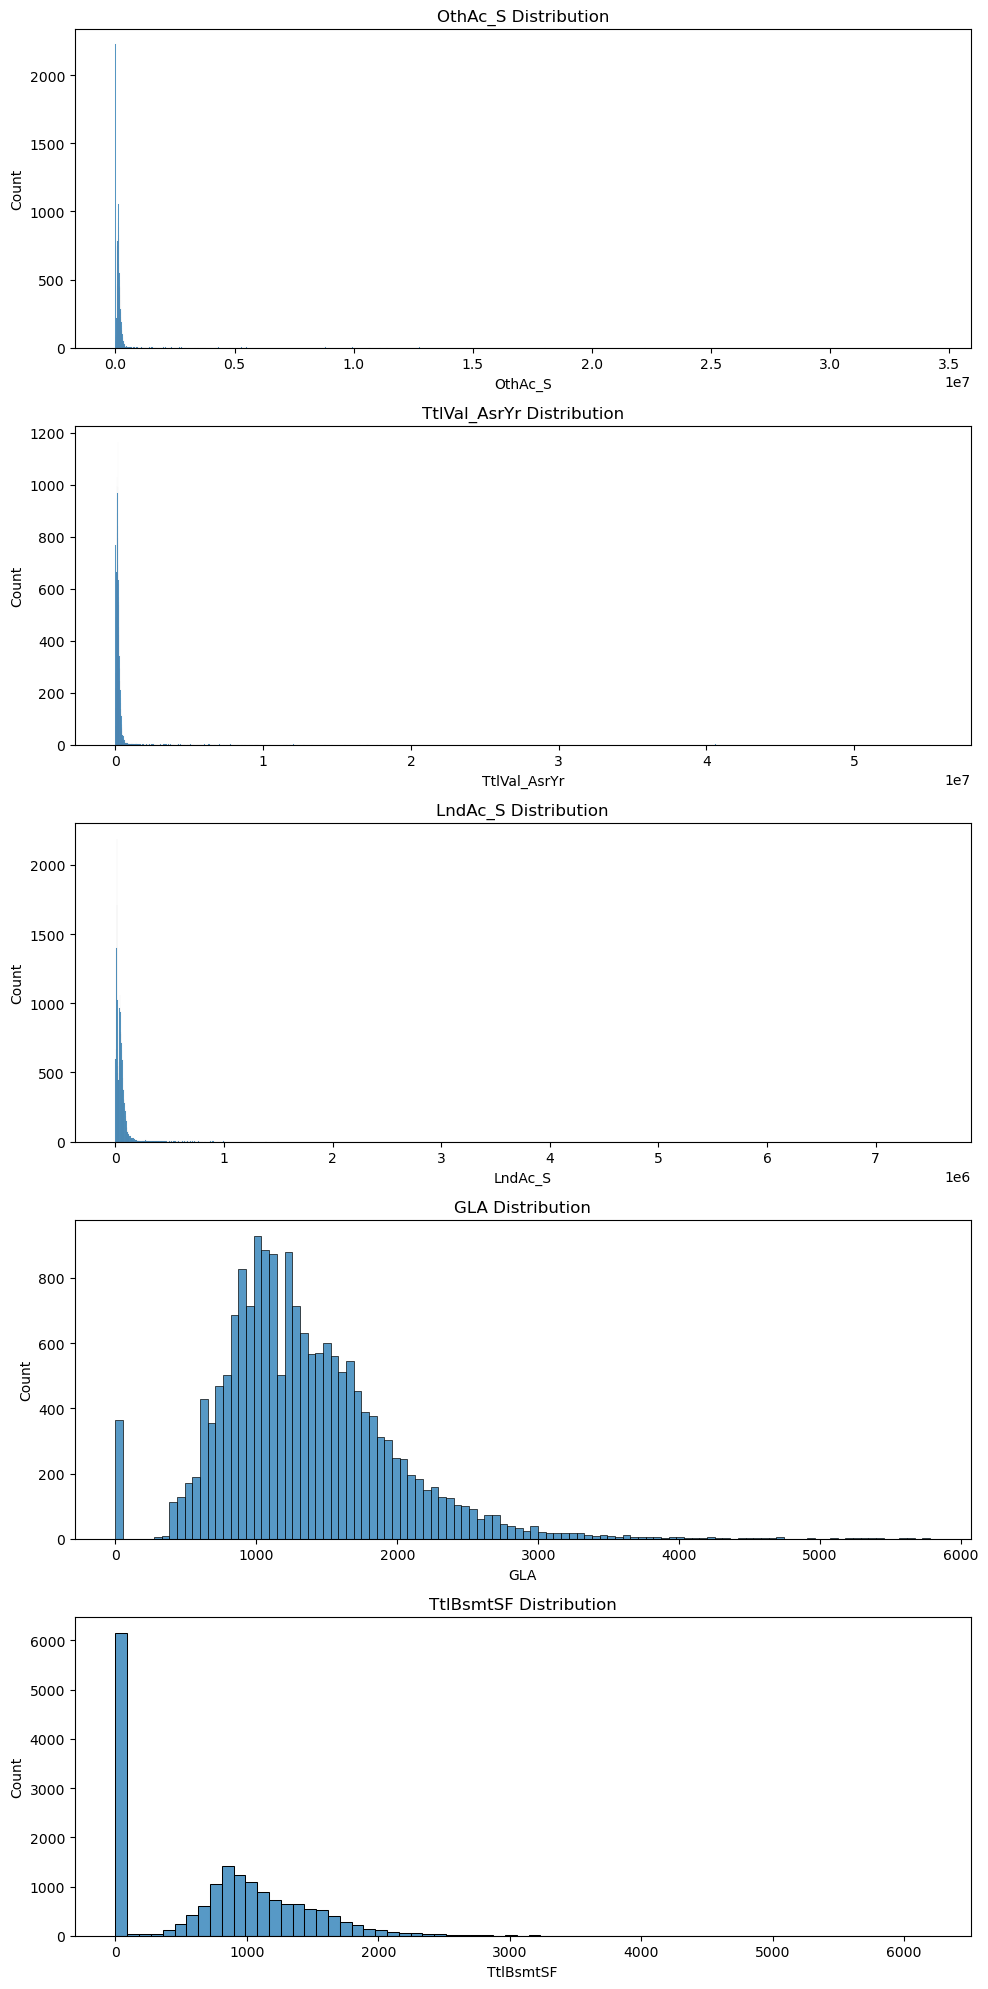

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


def analyze_feature_scales(df, target_col='SalePrice'):
    """
    Analyzes features to determine if standardization is necessary.
    
    Parameters:
    df (pandas.DataFrame): Input dataset
    target_col (str): Name of the target variable
    
    Returns:
    tuple: (DataFrame with statistics, dict with recommendations)
    """
    # Remove non-numeric columns
    numeric_df = df.select_dtypes(include=[np.number])
    
    # Calculate statistics for each numeric column
    stats_df = pd.DataFrame({
        'mean': numeric_df.mean(),
        'std': numeric_df.std(),
        'min': numeric_df.min(),
        'max': numeric_df.max(),
        'range': numeric_df.max() - numeric_df.min(),
        'skewness': numeric_df.skew()
    })
    
    # Calculate scale ratios between features
    max_range = stats_df['range'].max()
    min_range = stats_df['range'].min()
    scale_ratio = max_range / min_range if min_range != 0 else float('inf')
    
    # Identify highly skewed features
    skewed_features = stats_df[abs(stats_df['skewness']) > 1].index.tolist()
    
    # Calculate correlations with target
    correlations = numeric_df.corr()[target_col].sort_values(ascending=False)
    
    # Generate recommendations
    recommendations = {
        'standardization_needed': scale_ratio > 10,
        'reason': f"Scale ratio between largest and smallest feature ranges is {scale_ratio:.2f}",
        'skewed_features': skewed_features,
        'top_correlations': correlations.head(5).to_dict(),
        'suggested_transforms': {}
    }
    
    # Suggest transformations for skewed features
    for feature in skewed_features:
        skew = stats_df.loc[feature, 'skewness']
        if skew > 1:
            recommendations['suggested_transforms'][feature] = 'log or sqrt transform'
        elif skew < -1:
            recommendations['suggested_transforms'][feature] = 'square or cube transform'
    
    return stats_df, recommendations


#TODO: Other tests that I would also recommend to check normality and variance, and how to address these with Box-Cox transformations:
from scipy import stats


# TODO: You can combine these using the below function:
def analyze_features(df, target_col='SalePrice'):
    analysis = {
        'basic_stats': df.describe(),
        'normality': check_normality(df),
        'zero_variance': check_variance(df),
        'correlations': df.corr()[target_col].sort_values(ascending=False),
        'missing_values': df.isnull().sum(),
        'cardinality': df.nunique()
    }
    
    # Check for multicollinearity
    correlation_matrix = df.corr()
    high_correlation = np.where(np.abs(correlation_matrix) > 0.8)
    high_correlation = [(correlation_matrix.index[x], correlation_matrix.columns[y], correlation_matrix.iloc[x, y]) 
                       for x, y in zip(*high_correlation) if x != y]
    
    analysis['multicollinearity'] = high_correlation
    
    return analysis


def plot_distributions(df, n_features=5):
    """
    Plots distributions of top correlated numeric features.
    
    Parameters:
    df (pandas.DataFrame): Input dataset
    n_features (int): Number of features to plot
    """
    numeric_df = df.select_dtypes(include=[np.number])
    correlations = abs(numeric_df.corr()['SalePrice']).sort_values(ascending=False)
    top_features = correlations[1:n_features+1].index  # Exclude target variable
    
    fig, axes = plt.subplots(n_features, 1, figsize=(10, 4*n_features))
    for ax, feature in zip(axes, top_features):
        sns.histplot(data=df, x=feature, ax=ax)
        ax.set_title(f'{feature} Distribution')
    plt.tight_layout()
    
    return fig

# Example usage:
if __name__ == "__main__":
    # Load your dataset
    df = pd.read_csv('/Users/jorgemartinez/Documents/NYDSA #3 Machine Learning Project/Ames Real Estate and House Price Data Merged.csv')
    
    # Run analysis
    stats, recommendations = analyze_feature_scales(df)
    
    # Print recommendations
    print("\nAnalysis Results:")
    print("-" * 50)
    print(f"Standardization needed: {recommendations['standardization_needed']}")
    print(f"Reason: {recommendations['reason']}")
    print("\nSkewed features requiring transformation:")
    for feature, transform in recommendations['suggested_transforms'].items():
        print(f"- {feature}: {transform}")
    
    print("\nTop correlations with Sale Price:")
    for feature, corr in recommendations['top_correlations'].items():
        print(f"- {feature}: {corr:.3f}")
    
    # Create distribution plots
    plot_distributions(df)

In [10]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [11]:
"""
House Price Feature Standardization with improved feature handling, duplicate removal, and skewness transformation
"""

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

def detect_numeric_categorical(df, column, threshold=15):
    """
    Detects if a numeric column is likely categorical based on various criteria.
    """
    unique_count = df[column].nunique()
    
    # Patterns suggesting categorical data
    categorical_patterns = [
        '_MM', '_YYYY', 'Nbr', 'Number', 'Count', 'Bath', 'Room', 'Year',
        'Yr', 'Quality', 'Qual', 'Condition', 'Cond', 'Type', 'Grade',
        'Mo_', '_Mo', 'Month', 'Zip', 'Code', 'Pool', 'Misc', 'ID', 'RefNo',
        'Car', 'Tier', 'Range'
    ]
    
    # Patterns suggesting continuous measurements
    continuous_patterns = [
        'SF', 'Area', 'SqFt', 'Footage', 'Acre', 'Val_', '_Val'
    ]
    
    # Check if values are all integers when cast (allowing for NaN)
    values = df[column].dropna()
    all_ints = all(float(x).is_integer() for x in values)
    
    # Single value or very few values should be categorical
    if unique_count <= 2:
        return True
    
    # Check patterns
    categorical_match = any(pattern.lower() in column.lower() for pattern in categorical_patterns)
    continuous_match = any(pattern.lower() in column.lower() for pattern in continuous_patterns)
    
    # If it matches a continuous pattern, it's not categorical
    if continuous_match:
        return False
    
    # If it matches a categorical pattern or has few unique integer values, it's categorical
    return categorical_match or (unique_count <= threshold and all_ints)

def standardize_continuous_features(df, categorical_threshold=15):
    """
    Standardizes continuous numeric features while preserving categorical ones.
    Includes transformation of skewed features before standardization.
    """
    # Known categorical numeric features
    known_categorical = {
        'MSSubClass', 'YrBuilt', 'YearBuilt', 'YearRemodAdd', 
        'GarYrBlt',  # Only one version of garage year
        'MoSold', 'YrSold', 'Rcrd_Yr', 'Inst1_Yr',
        'OverallQual', 'OverallCond', 'TotRmsAbvGrd', 'Fireplaces',
        'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
        'BedroomAbvGr', 'KitchenAbvGr', 'GarageCars', 'Cars', 'NmbrBRs',
        'MoSold_MM', 'YrSold_YYYY', 'Rcrd_Mo', 'Inst1_Mo',
        'MA_Zip1', 'MA_Zip2', 'PoolArea', 'MiscVal',
        'PID', 'GeoRefNo', 'MapRefNo',  # IDs
        'MilVal_D', 'MilVal_S',  # Single value fields
        'Range', 'Tier'  # Single value fields
    }
    
    # Known continuous features (override automatic detection)
    known_continuous = {
        'TtlVal_AsrYr',
        'HSTtl_D',     # Tax/value related
        'HSTtl_S',     # Tax/value related
        'LowQualFinSF',  # Square footage
        '3SsnPorch',     # Porch measurements
        'EnclosedPorch',
        'ScreenPorch'
    }
    
    # Remove duplicate columns
    columns_to_drop = [col for col in df.columns if col.endswith('.1')]
    if 'TotalBsmtSF' in df.columns and 'TtlBsmtSF' in df.columns:
        columns_to_drop.append('TotalBsmtSF')
    
    df = df.drop(columns=columns_to_drop)
    
    # Get numeric columns
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    
    # Identify categorical numeric features
    categorical_numeric = set()
    for col in numeric_cols:
        if (col in known_categorical or 
            (detect_numeric_categorical(df, col, categorical_threshold) and 
             col not in known_continuous and
             'Unnamed' not in col)):
            categorical_numeric.add(col)
    
    # Identify continuous features
    continuous_features = [col for col in numeric_cols 
                         if col not in categorical_numeric 
                         and col != 'SalePrice'
                         and 'Unnamed' not in col]
    
    # Create copy of dataframe
    df_standardized = df.copy()
    
    # Print analysis before standardization
    print("\nFeature Analysis:")
    print("\nDuplicate Columns Removed:")
    for col in columns_to_drop:
        print(f"- {col}")
    
    print("\nColumns Requiring Investigation:")
    for col in [c for c in df.columns if 'Unnamed' in c]:
        print(f"- {col}: {df[col].nunique()} unique values")
        
    print("\nCategorical Numeric Features (not standardized):")
    for col in sorted(categorical_numeric):
        unique_vals = sorted(df[col].unique())
        print(f"- {col}: {len(unique_vals)} unique values {unique_vals[:5]}{'...' if len(unique_vals) > 5 else ''}")
    
    print("\nContinuous Features (standardized):")
    for col in sorted(continuous_features):
        print(f"- {col}: {df[col].nunique()} unique values")

    # NEW CODE: Transform skewed features before standardization
    skewed_features = [
        'SchD_S', 'TxD_S', 'LndAc_S', 'ImpAc_S', 'OthAc_S', 
        'TtlVal_AsrYr', 'HSTtl_D', 'HSTtl_S', 'LotArea'
    ]
    
    year_features = ['Rcrd_Yr', 'Inst1_Yr']
    
    print("\nTransforming Skewed Features:")
    # Transform skewed continuous features that exist in our dataset
    for feature in skewed_features:
        if feature in continuous_features and feature in df.columns:
            print(f"- Applying log transform to {feature}")
            df_standardized[feature] = np.log1p(df_standardized[feature])
    
    for feature in year_features:
        if feature in continuous_features and feature in df.columns:
            print(f"- Applying square transform to {feature}")
            df_standardized[feature] = df_standardized[feature] ** 2
    
    # Standardize the transformed continuous features
    if continuous_features:
        scaler = StandardScaler()
        df_standardized[continuous_features] = scaler.fit_transform(df_standardized[continuous_features])
    
    return df_standardized

if __name__ == "__main__":
    df = pd.read_csv('/Users/jorgemartinez/Documents/NYDSA #3 Machine Learning Project/Ames Real Estate and House Price Data Merged.csv', 
                     low_memory=False)
    df_standardized = standardize_continuous_features(df)


Feature Analysis:

Duplicate Columns Removed:
- SalePrice.1
- LotArea.1
- Neighborhood.1
- BldgType.1
- HouseStyle.1
- RoofMatl.1
- MasVnrType.1
- Foundation.1
- Heating.1
- TotRmsAbvGrd.1
- Fireplaces.1
- GarageType.1
- GarageArea.1
- PoolArea.1
- SaleType.1
- TotalBsmtSF

Columns Requiring Investigation:
- Unnamed: 85: 1000 unique values

Categorical Numeric Features (not standardized):
- BedroomAbvGr: 8 unique values [0.0, 1.0, 2.0, 3.0, 4.0]...
- BldgNo_S: 9 unique values [0, 1, 2, 3, 4]...
- BsmtFullBath: 5 unique values [0.0, 1.0, 2.0, 3.0, nan]
- BsmtHalfBath: 4 unique values [0.0, 1.0, 2.0, nan]
- Cars: 158 unique values [nan, 0.0, 0.07, 0.13, 0.14]...
- DwlgNo_S: 5 unique values [0, 1, 2, 3, 4]
- Fireplaces: 8 unique values [nan, 0.0, 1.0, 2.0, 3.0]...
- FullBath: 6 unique values [0.0, 1.0, 2.0, 3.0, 4.0]...
- GarYrBlt: 129 unique values [nan, 0.0, 3.0, 1865.0, 1880.0]...
- GarageCars: 7 unique values [0.0, 1.0, 2.0, 3.0, 4.0]...
- GarageYrBlt: 101 unique values [1916.0, 1920

In [12]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import xgboost as xgb

class HousingEnsemble:
    """
    Ensemble method for combining multiple models' predictions
    with optimal weights determined through validation performance
    """
    def __init__(self, models_dict, weight_method='performance'):
        self.models = models_dict
        self.weights = None
        self.weight_method = weight_method
        
    def _calculate_weights(self, X_val, y_val):
        """
        Calculate weights for each model based on their validation performance
        """
        performances = {}
        
        # Get predictions from each model
        for name, (model, use_scaled) in self.models.items():
            val_pred = model.predict(X_val)
            r2 = r2_score(y_val, val_pred)
            performances[name] = max(r2, 0)  # Ensure non-negative weights
            
        # Normalize weights to sum to 1
        total = sum(performances.values())
        self.weights = {name: score/total for name, score in performances.items()}
        
        return self.weights
    
    def fit(self, X_train, X_train_scaled, y_train):
        """
        Fit the ensemble by calculating optimal weights
        """
        # Use a portion of training data as validation set
        val_size = int(0.2 * len(X_train))
        X_val = X_train_scaled[-val_size:]
        y_val = y_train[-val_size:]
        
        # Calculate weights based on validation performance
        self.weights = self._calculate_weights(X_val, y_val)
        
        print("Ensemble weights:")
        for name, weight in self.weights.items():
            print(f"{name}: {weight:.4f}")
            
        return self
    
    def predict(self, X, X_scaled):
        """
        Make predictions using weighted average of model predictions
        """
        if self.weights is None:
            raise ValueError("Ensemble must be fitted before making predictions")
            
        weighted_predictions = []
        
        for name, (model, use_scaled) in self.models.items():
            # Use appropriate scaled/unscaled data for each model
            X_pred = X_scaled if use_scaled else X
            predictions = model.predict(X_pred)
            weighted_predictions.append(predictions * self.weights[name])
            
        # Combine predictions
        final_predictions = np.sum(weighted_predictions, axis=0)
        return final_predictions

class AmesHousingML:
    """
    Enhanced ML pipeline for Ames Housing that works with pre-processed data
    """
    def __init__(self, df):
        self.df = df.copy()
        self.label_encoders = {}
        self.scaler = StandardScaler()
        self._prepare_data()
        
    def _prepare_data(self):
        """
        Final preparation of data for ML, handling categorical variables
        and mixed data types
        """
        # First handle the target variable
        target = 'sale_price' if 'sale_price' in self.df.columns else 'SalePrice'
        
        # Remove rows where target is NaN
        print(f"Initial shape: {self.df.shape}")
        self.df = self.df.dropna(subset=[target])
        print(f"Shape after removing NaN targets: {self.df.shape}")
        
        # Convert numeric columns that might have string values
        numeric_cols = self.df.select_dtypes(include=['int64', 'float64']).columns
        for col in self.df.columns:
            # Try to convert to numeric, if fails, leave as is
            if col not in numeric_cols:
                try:
                    self.df[col] = pd.to_numeric(self.df[col], errors='raise')
                except:
                    pass
        
        # After numeric conversion, get remaining categorical columns
        categorical_cols = self.df.select_dtypes(include=['object']).columns
        
        # Handle categorical variables
        for col in categorical_cols:
            # Convert all values to strings and handle NaN
            self.df[col] = self.df[col].fillna('Missing')
            self.df[col] = self.df[col].astype(str)
            le = LabelEncoder()
            self.df[col] = le.fit_transform(self.df[col])
            self.label_encoders[col] = le
            
        # Remove any remaining unnamed columns
        unnamed_cols = [col for col in self.df.columns if 'Unnamed' in col]
        self.df = self.df.drop(columns=unnamed_cols)
        
        # Handle any remaining NaN values in numeric columns
        numeric_cols = self.df.select_dtypes(include=['int64', 'float64']).columns
        for col in numeric_cols:
            if col != target:  # Don't modify target variable
                self.df[col] = self.df[col].fillna(self.df[col].median())
        
        print("Data preparation completed successfully")
        
    def build_models(self, test_size=0.2, random_state=42):
        """
        Build and evaluate multiple ML models
        """
        # Prepare features and target
        target = 'sale_price' if 'sale_price' in self.df.columns else 'SalePrice'
        
        # Use all columns except target and any problematic ones
        exclude_cols = [target] + [col for col in self.df.columns if 'Unnamed' in col]
        features = [col for col in self.df.columns if col not in exclude_cols]
        
        print(f"Using {len(features)} features for modeling")
        
        X = self.df[features]
        y = self.df[target]
        
        # Scale features for models that need it
        X_scaled = self.scaler.fit_transform(X)
        X_scaled = pd.DataFrame(X_scaled, columns=features)
        
        # Split data
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            X_scaled, y, test_size=test_size, random_state=random_state
        )
        
        # Split unscaled data for tree-based models
        self.X_train_unscaled, self.X_test_unscaled, _, _ = train_test_split(
            X, y, test_size=test_size, random_state=random_state
        )
        
        # Initialize models with optimized parameters
        self.models = {
            'Linear Regression': (LinearRegression(), True),
            'Lasso': (Lasso(
                alpha=0.01,
                random_state=random_state,
                max_iter=2000,
                tol=0.001,
                selection='random',
                warm_start=True
            ), True),
            'Ridge': (Ridge(alpha=0.01, random_state=random_state), True),
            'Random Forest': (RandomForestRegressor(
                n_estimators=500, 
                max_depth=20,
                min_samples_split=5,
                min_samples_leaf=2,
                max_features='sqrt',
                n_jobs=-1,
                random_state=random_state
            ), False),
            'XGBoost': (xgb.XGBRegressor(
                n_estimators=200,
                learning_rate=0.05,
                max_depth=6,
                min_child_weight=1,
                subsample=0.8,
                colsample_bytree=0.8,
                random_state=random_state
            ), False),
            'Gradient Boosting': (GradientBoostingRegressor(
                n_estimators=200,
                learning_rate=0.05,
                max_depth=6,
                min_samples_split=5,
                subsample=0.8,
                random_state=random_state
            ), False),
            'Neural Network': (MLPRegressor(
                hidden_layer_sizes=(100, 50, 25),
                max_iter=1000,
                learning_rate='adaptive',
                early_stopping=True,
                random_state=random_state
            ), True)
        }
        
        self.results = {}
        self.feature_importance = {}
        
        for name, (model, use_scaled) in self.models.items():
            print(f"\nTraining {name}...")
            
            # Select appropriate data based on model type
            X_train_model = self.X_train if use_scaled else self.X_train_unscaled
            X_test_model = self.X_test if use_scaled else self.X_test_unscaled
            
            # Train model
            model.fit(X_train_model, self.y_train)
            
            # Make predictions
            train_pred = model.predict(X_train_model)
            test_pred = model.predict(X_test_model)
            
            # Calculate metrics
            self.results[name] = {
                'Train R2': r2_score(self.y_train, train_pred),
                'Test R2': r2_score(self.y_test, test_pred),
                'Train RMSE': np.sqrt(mean_squared_error(self.y_train, train_pred)),
                'Test RMSE': np.sqrt(mean_squared_error(self.y_test, test_pred)),
                'CV Score': np.mean(cross_val_score(
                    model, X_train_model, self.y_train, cv=5, scoring='r2'
                ))
            }
            
            # Get feature importance for supported models
            if hasattr(model, 'feature_importances_'):
                importances = pd.DataFrame({
                    'feature': features,
                    'importance': model.feature_importances_
                }).sort_values('importance', ascending=False)
                self.feature_importance[name] = importances
                
            print(f"{name} completed - Test R2: {self.results[name]['Test R2']:.4f}")
        
        # Add ensemble method
        self.add_ensemble_method()
        
        return self.results, self.feature_importance, self.models
    
    def add_ensemble_method(self):
        """
        Add ensemble method combining the best performing models
        """
        # Select best performing models for ensemble
        selected_models = {
            name: (model, use_scaled) 
            for name, (model, use_scaled) in self.models.items()
            if name in ['XGBoost', 'Gradient Boosting', 'Ridge']
        }
        
        # Create and fit ensemble
        self.ensemble = HousingEnsemble(selected_models)
        self.ensemble.fit(self.X_train_unscaled, self.X_train, self.y_train)
        
        # Make predictions
        train_pred = self.ensemble.predict(self.X_train_unscaled, self.X_train)
        test_pred = self.ensemble.predict(self.X_test_unscaled, self.X_test)
        
        # Calculate metrics
        ensemble_results = {
            'Train R2': r2_score(self.y_train, train_pred),
            'Test R2': r2_score(self.y_test, test_pred),
            'Train RMSE': np.sqrt(mean_squared_error(self.y_train, train_pred)),
            'Test RMSE': np.sqrt(mean_squared_error(self.y_test, test_pred)),
            'CV Score': np.mean(cross_val_score(
                self.models['XGBoost'][0],
                self.X_train_unscaled,
                self.y_train,
                cv=5,
                scoring='r2'
            ))
        }
        
        # Add ensemble results
        self.results['Ensemble'] = ensemble_results
        print("\nEnsemble completed - Test R2:", ensemble_results['Test R2'])
    
    @staticmethod
    def print_results(results, feature_importance):
        """Print formatted results of model evaluation"""
        print("\nModel Performance Comparison:")
        print("-" * 80)
        
        metrics_df = pd.DataFrame(results).T
        print(metrics_df.round(4))
        
        print("\nTop 10 Features by Importance:")
        print("-" * 80)
        
        for model_name, importance_df in feature_importance.items():
            print(f"\n{model_name}:")
            print(importance_df.head(10).round(4))

if __name__ == "__main__":
    # Load preprocessed data
    file_path = '/Users/jorgemartinez/Documents/NYDSA #3 Machine Learning Project/Ames_Housing_Processed.csv'  # Update with your file path
    df = pd.read_csv(file_path)
    
    # Initialize and run ML pipeline
    print("Initializing ML pipeline...")
    ml_pipeline = AmesHousingML(df)
    
    print("Building models...")
    results, feature_importance, models = ml_pipeline.build_models()
    
    # Print results
    ml_pipeline.print_results(results, feature_importance)

Initializing ML pipeline...
Initial shape: (22213, 173)
Shape after removing NaN targets: (2966, 173)


/var/folders/m8/2_nz4r1s3r1_ghgs6pxgk9880000gn/T/ipykernel_61108/2595132961.py:310: DtypeWarning: Columns (6,8,76,81,90,93,94,95,96,97,98,99,100,101,102,103,104,109,110,111,112,113,115,116,117,118,119,120,121,123,127,128,129,130,140,142,144,145,147,150,151,152,159,160,164,165) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Data preparation completed successfully
Building models...
Using 171 features for modeling

Training Linear Regression...
Linear Regression completed - Test R2: -1698147810051443392512.0000

Training Lasso...


/opt/anaconda3/envs/ml_project/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.946e+11, tolerance: 3.121e+10
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/ml_project/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.230e+11, tolerance: 2.497e+10
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/ml_project/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing 

Lasso completed - Test R2: 0.9644

Training Ridge...
Ridge completed - Test R2: 0.9641

Training Random Forest...
Random Forest completed - Test R2: 0.8967

Training XGBoost...
XGBoost completed - Test R2: 0.9889

Training Gradient Boosting...
Gradient Boosting completed - Test R2: 0.9867

Training Neural Network...
Neural Network completed - Test R2: 0.9546
Ensemble weights:
Ridge: 1.0000
XGBoost: 0.0000
Gradient Boosting: 0.0000

Ensemble completed - Test R2: 0.9641048368670944

Model Performance Comparison:
--------------------------------------------------------------------------------
                   Train R2       Test R2  Train RMSE     Test RMSE  CV Score
Linear Regression    0.9745 -1.698148e+21  18318.4304  4.824732e+15    0.8552
Lasso                0.9746  9.644000e-01  18272.6287  2.210476e+04    0.9537
Ridge                0.9746  9.641000e-01  18270.4988  2.218214e+04    0.9537
Random Forest        0.9627  8.967000e-01  22139.4935  3.763310e+04    0.8749
XGBoost      

In [14]:
pip install "nbformat>=4.2.0"

Note: you may need to restart the kernel to use updated packages.


In [19]:
pip install jupyter-dash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 641.1 kB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [40]:
from jupyter_dash import JupyterDash
from dash import dcc, html, Input, Output
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import shap
import numpy as np

class DashMLDashboard:
    def __init__(self, ml_pipeline):
        self.ml_pipeline = ml_pipeline
        self.app = JupyterDash(__name__)
        self.explainer = shap.TreeExplainer(ml_pipeline.models['XGBoost'][0])
        self.shap_values = self.explainer.shap_values(ml_pipeline.X_test)
        self.setup_layout()
        self.setup_callbacks()
        
    def setup_layout(self):
        self.app.layout = html.Div([
            html.H1('ML Model Analysis Dashboard', 
                   style={'textAlign': 'center', 'padding': '20px', 'color': '#2c3e50'}),
            
            html.Div([
                html.H3('Select View', style={'color': '#34495e'}),
                dcc.Dropdown(
                    id='view-selector',
                    options=[
                        {'label': 'Model Performance', 'value': 'performance'},
                        {'label': 'Feature Importance', 'value': 'importance'},
                        {'label': 'Predictions', 'value': 'predictions'},
                        {'label': 'SHAP Analysis', 'value': 'shap'},
                        {'label': 'Correlations', 'value': 'correlations'}
                    ],
                    value='performance',
                    style={'marginBottom': '20px'}
                ),
                
                html.Div([
                    dcc.Dropdown(
                        id='model-selector',
                        placeholder='Select Model',
                        style={'marginBottom': '20px'}
                    ),
                ]),
                
                dcc.Graph(id='main-graph', style={'marginBottom': '20px'}),
                dcc.Graph(id='secondary-graph')
            ], style={'padding': '20px', 'backgroundColor': '#f8f9fa'})
        ])
        
    def setup_callbacks(self):
        @self.app.callback(
            [Output('model-selector', 'style'),
             Output('model-selector', 'options'),
             Output('model-selector', 'value')],
            [Input('view-selector', 'value')]
        )
        def update_model_selector(view):
            if view in ['importance', 'predictions']:
                models = list(self.ml_pipeline.models.keys()) + ['Ensemble']
                return {'display': 'block', 'marginBottom': '20px'}, \
                       [{'label': m, 'value': m} for m in models], \
                       models[0]
            return {'display': 'none'}, [], None
            
        @self.app.callback(
            [Output('main-graph', 'figure'),
             Output('secondary-graph', 'figure')],
            [Input('view-selector', 'value'),
             Input('model-selector', 'value')]
        )
        def update_graphs(view, model):
            main_fig = go.Figure()
            secondary_fig = go.Figure()
            
            if view == 'performance':
                results_df = pd.DataFrame(self.ml_pipeline.results).T
                main_fig = make_subplots(rows=1, cols=2, 
                                       subplot_titles=('Test R² Scores', 'Test RMSE'))
                
                main_fig.add_trace(
                    go.Bar(x=results_df.index, y=results_df['Test R2'],
                          name='R² Score', marker_color='#2ecc71'),
                    row=1, col=1
                )
                main_fig.add_trace(
                    go.Bar(x=results_df.index, y=results_df['Test RMSE'],
                          name='RMSE', marker_color='#e74c3c'),
                    row=1, col=2
                )
                main_fig.update_layout(
                    title='Model Performance Comparison',
                    height=500,
                    template='plotly_white'
                )
                
            elif view == 'importance' and model:
                if model in self.ml_pipeline.feature_importance:
                    imp_df = self.ml_pipeline.feature_importance[model]
                    top_features = imp_df.head(15)
                    main_fig = go.Figure(go.Bar(
                        x=top_features['importance'],
                        y=top_features['feature'],
                        orientation='h',
                        marker_color='#3498db'
                    ))
                    main_fig.update_layout(
                        title=f'Top 15 Important Features - {model}',
                        xaxis_title='Importance Score',
                        yaxis_title='Features',
                        height=600,
                        template='plotly_white'
                    )
                    
            elif view == 'predictions' and model:
                if model == "Ensemble":
                    predictions = self.ml_pipeline.ensemble.predict(
                        self.ml_pipeline.X_test_unscaled,
                        self.ml_pipeline.X_test
                    )
                else:
                    model_obj, use_scaled = self.ml_pipeline.models[model]
                    X_test = self.ml_pipeline.X_test if use_scaled else self.ml_pipeline.X_test_unscaled
                    predictions = model_obj.predict(X_test)
                
                min_val = min(self.ml_pipeline.y_test.min(), predictions.min())
                max_val = max(self.ml_pipeline.y_test.max(), predictions.max())
                
                main_fig.add_trace(go.Scatter(
                    x=self.ml_pipeline.y_test,
                    y=predictions,
                    mode='markers',
                    name='Predictions',
                    marker=dict(color='#3498db', size=8)
                ))
                main_fig.add_trace(go.Scatter(
                    x=[min_val, max_val],
                    y=[min_val, max_val],
                    mode='lines',
                    name='Perfect Prediction',
                    line=dict(color='#2ecc71', dash='dash')
                ))
                main_fig.update_layout(
                    title=f'Predicted vs Actual Values - {model}',
                    xaxis_title='Actual Values',
                    yaxis_title='Predicted Values',
                    height=600,
                    template='plotly_white'
                )
                
            elif view == 'shap':
                shap_df = pd.DataFrame(self.shap_values, columns=self.ml_pipeline.X_test.columns)
                feature_importance = np.abs(shap_df).mean().sort_values(ascending=False)
                
                for feature in feature_importance.head(10).index:
                    main_fig.add_trace(go.Box(
                        y=shap_df[feature],
                        name=feature,
                        boxpoints='all',
                        jitter=0.3,
                        pointpos=-1.8
                    ))
                
                main_fig.update_layout(
                    title='SHAP Values Distribution for Top 10 Features',
                    yaxis_title='SHAP Value',
                    height=600,
                    template='plotly_white'
                )
                
            elif view == 'correlations':
                corr_matrix = self.ml_pipeline.X_train.corr()
                main_fig = go.Figure(data=go.Heatmap(
                    z=corr_matrix.values,
                    x=corr_matrix.columns,
                    y=corr_matrix.columns,
                    colorscale='RdBu',
                    zmid=0
                ))
                main_fig.update_layout(
                    title='Feature Correlation Heatmap',
                    height=800,
                    template='plotly_white'
                )
                
            return main_fig, secondary_fig
            
    def run_dashboard(self):
        self.app.run_server(mode='external', port=8050, debug=True)

In [41]:
# First create the dashboard instance
dashboard = DashMLDashboard(ml_pipeline)

# Then run it
dashboard.run_dashboard()

/opt/anaconda3/envs/ml_project/lib/python3.9/site-packages/dash/dash.py:579: UserWarning:

JupyterDash is deprecated, use Dash instead.
See https://dash.plotly.com/dash-in-jupyter for more details.



Dash app running on http://127.0.0.1:8050/


In [17]:
# TODO: Interesting that Lasso and Ridge have the same RMSE on both train and test score, and the same RMSE. I think this is 
# because you are using an alpha value of 0.001, which is very low. This means that the model is not penalizing the coefficients as much, 
# and therefore the RMSE is not as high. I would initialize the alpha value to 0.01, and see if that changes the results.

# TODO: Also interesting that Random Forest has a higher RMSE than Lasso and Ridge. I would try to increase the number of estimators to 500, 
# and see if that changes the results.

# TODO: XGBOOST seems to have a very high CV score and low RMSE. Did you try submitting the results to the Kaggle competition to see 
# if it holds against the test set they provided?

                  Train R2       Test R2  Train RMSE     Test RMSE  CV Score
Linear Regression    0.9745 -1.698148e+21  18318.4304  4.824732e+15    0.8552
Lasso                0.9746  9.644000e-01  18272.6180  2.210508e+04    0.9537
Ridge                0.9746  9.641000e-01  18270.4963  2.218418e+04    0.9536
Random Forest        0.9623  8.961000e-01  22283.6346  3.773712e+04    0.8741
XGBoost              0.9999  9.889000e-01   1381.4160  1.233229e+04    0.9904

IndentationError: unexpected indent (1026602776.py, line 11)